# Import packages

In [ ]:
%load_ext autoreload
%autoreload 2

import os, sys, sys
from pathlib import Path
for p in [Path.cwd()] + list(Path.cwd().parents):
    if p.name == 'Multifirefly-Project':
        os.chdir(p)
        sys.path.insert(0, str(p / 'multiff_analysis/multiff_code/methods'))
        break
    
from data_wrangling import specific_utils, process_monkey_information, general_utils
from pattern_discovery import pattern_by_trials, pattern_by_trials, cluster_analysis, organize_patterns_and_features
from visualization.matplotlib_tools import plot_behaviors_utils
from neural_data_analysis.neural_analysis_tools.get_neural_data import neural_data_processing
from neural_data_analysis.neural_analysis_tools.visualize_neural_data import plot_neural_data, plot_modeling_result
from neural_data_analysis.neural_analysis_tools.model_neural_data import transform_vars, neural_data_modeling, drop_high_corr_vars, drop_high_vif_vars
from neural_data_analysis.topic_based_neural_analysis.neural_vs_behavioral import prep_monkey_data, prep_target_data, neural_vs_behavioral_class
from neural_data_analysis.topic_based_neural_analysis.planning_and_neural import planning_and_neural_class, pn_utils, pn_helper_class, pn_aligned_by_seg, pn_aligned_by_event
from neural_data_analysis.neural_analysis_tools.cca_methods import cca_class
from neural_data_analysis.neural_analysis_tools.cca_methods import cca_class, cca_utils, cca_cv_utils
from neural_data_analysis.neural_analysis_tools.cca_methods.cca_plotting import cca_plotting, cca_plot_lag_vs_no_lag, cca_plot_cv
from machine_learning.ml_methods import regression_utils, regz_regression_utils, ml_methods_class, classification_utils, ml_plotting_utils, ml_methods_utils
from planning_analysis.show_planning import nxt_ff_utils, show_planning_utils
from neural_data_analysis.neural_analysis_tools.gpfa_methods import elephant_utils, fit_gpfa_utils, plot_gpfa_utils, gpfa_helper_class
from neural_data_analysis.neural_analysis_tools.align_trials import time_resolved_regression, plot_time_resolved_regression
from neural_data_analysis.neural_analysis_tools.align_trials import align_trial_utils

import sys
import math
import gc
import subprocess
from pathlib import Path
from importlib import reload

# Third-party imports
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
from scipy import linalg, interpolate
from scipy.signal import fftconvolve
from scipy.io import loadmat
from scipy import sparse
import torch
from numpy import pi

# Machine Learning imports
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.multivariate.cancorr import CanCorr

# Neuroscience specific imports
import neo
import rcca
import quantities as pq

plt.rcParams["animation.html"] = "html5"
os.environ['KMP_DUPLICATE_LIB_OK']='True'
rc('animation', html='jshtml')
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rcParams['animation.embed_limit'] = 2**128
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(suppress=True)
print("done")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
done
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# retrieve data

In [ ]:
# raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0312"
raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0330"
# raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0316"
# raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0327"
# raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0328"

In [3]:
#raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Schro/data_0416"
raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Schro/data_0321"
# raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Schro/data_0329"

In [ ]:
reduce_y_var_lags = False
planning_data_by_point_exists_ok = True
y_data_exists_ok = True

pn = pn_aligned_by_event.PlanningAndNeuralEventAligned(raw_data_folder_path=raw_data_folder_path)
pn.prep_data_to_analyze_planning(planning_data_by_point_exists_ok=planning_data_by_point_exists_ok)
pn.planning_data_by_point, cols_to_drop = general_utils.drop_columns_with_many_nans(
    pn.planning_data_by_point)
#pn.get_x_and_y_data_for_modeling(exists_ok=y_data_exists_ok, reduce_y_var_lags=reduce_y_var_lags)

Loaded binned_spikes_df from all_monkey_data/processed_neural_data/monkey_Schro/data_0321/binned_spikes_df_0p1.csv
Loaded planning_data_by_point from all_monkey_data/planning_and_neural/monkey_Schro/data_0321/planning_data_by_point/opt_arc_stop_closest/test/cur_vis_0_1_window_-50cm_0cm
Loaded planning_data_by_point from all_monkey_data/planning_and_neural/monkey_Schro/data_0321/planning_data_by_point/opt_arc_stop_closest/control/cur_vis_0_1_window_-50cm_0cm
Overlap: []
Percentage overlap relative to df1: 0.00%
Percentage overlap relative to df2: 0.00%
Average percentage overlap: 0.00%
Loaded behav_data_by_bin from all_monkey_data/target_decoder/monkey_Schro/data_0321/behav_data_by_point.csv
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
There are 1 duplicated point_index in bin_info. Note: one_point_index_per_bin is False


In [ ]:
stop!

SyntaxError: invalid syntax (3319058519.py, line 1)

# get planning_data by segment

## get data and fit gpfa

In [ ]:
pn.prepare_seg_aligned_data()
pn.get_gpfa_traj(latent_dimensionality=7, exists_ok=True)

# for regression later
use_raw_spike_data_instead = False
use_lagged_rebinned_behav_data = False
pn.get_concat_data_for_regression(use_raw_spike_data_instead=use_raw_spike_data_instead,
                                  use_lagged_rebinned_behav_data=use_lagged_rebinned_behav_data,
                                  apply_pca_on_raw_spike_data=True,
                                  use_lagged_raw_spike_data=False,) 


pn.print_data_dimensions()

new_seg_duration is now 1.0, and post_event_window is now 0.75
Loaded new_seg_info from all_monkey_data/planning_and_neural/monkey_Schro/data_0416/new_seg_info/tlim2_pre0p25_post0p75.csv
Dropped 22 columns due to containing NA in rebinned_y_var via calling drop_na_cols function: ['nxt_opt_arc_curv', 'cur_opt_arc_curv', 'nxt_cntr_arc_curv', 'cur_cntr_arc_curv', 'cur_opt_arc_end_heading', 'cur_cntr_arc_end_heading', 'angle_opt_arc_from_cur_end_to_nxt', 'angle_cntr_arc_from_cur_end_to_nxt', 'abs_angle_opt_arc_from_cur_end_to_nxt', 'abs_angle_cntr_arc_from_cur_end_to_nxt', 'target_last_seen_angle_to_boundary', 'cum_distance_since_target_last_seen', 'monkey_angle_target_last_seen', 'target_last_seen_angle', 'cum_distance_when_target_last_seen', 'target_last_seen_distance', 'time_since_target_last_seen', 'monkey_x_target_last_seen', 'time_target_last_seen', 'd_heading_since_target_last_seen', 'monkey_y_target_last_seen', 'distance_from_monkey_pos_target_last_seen']
Note: ff_caught_T_sorted i

/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/multiff_code/methods/neural_data_analysis/neural_analysis_tools/get_neural_data/neural_data_processing.py:234: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  'lag_segment_id', group_keys=False).apply(lag_group)


Loaded GPFA trajectories from all_monkey_data/planning_and_neural/monkey_Schro/data_0416/event_aligned/gpfa_trajectories/gpfa_neural_bin0p1_cur_first.pkl

No NA values found in DataFrame

No NA values found in DataFrame

=== Data Dimensions Summary ===
Total number of trials: 126

Concatenated Data Shapes (total n_timepoints × n_features):
  concat_neural_trials:     (1224, 9)
  concat_behav_trials:      (1224, 111)


## gpfa DURING train test split (also point-wise)

In [5]:
pn.prepare_seg_aligned_data()
pn.get_concat_data_for_regression(use_raw_spike_data_instead=True) 

new_seg_duration is now 1.0, and post_event_window is now 0.75
Note: ff_caught_T_sorted is replaced with ff_caught_T_new
Retrieved ff_dataframe from all_monkey_data/processed_data/monkey_Schro/data_0321/ff_dataframe.h5
Dropped 10 out of 86 segments because of insufficient duration, which is 11.6% of all segments
Made new new_seg_info and saved to all_monkey_data/planning_and_neural/monkey_Schro/data_0321/new_seg_info/tlim2_cur_first_pre0p25_post0p75.csv
Dropped 28 columns due to containing NA in rebinned_y_var via calling drop_na_cols function: ['cur_opt_arc_curv', 'cur_cntr_arc_curv', 'cur_opt_arc_end_heading', 'cur_cntr_arc_end_heading', 'angle_opt_arc_from_cur_end_to_nxt', 'angle_cntr_arc_from_cur_end_to_nxt', 'abs_angle_opt_arc_from_cur_end_to_nxt', 'abs_angle_cntr_arc_from_cur_end_to_nxt', 'cum_distance_since_target_last_seen', 'time_since_target_last_seen', 'monkey_angle_target_cluster_last_seen', 'distance_from_monkey_pos_target_last_seen', 'monkey_y_target_last_seen', 'time_tar

In [22]:
pn.retrieve_or_make_time_resolved_cv_scores_gpfa(latent_dimensionality=7)

Loaded time_resolved_cv_scores_gpfa from all_monkey_data/planning_and_neural/monkey_Schro/data_0321/event_aligned/time_resolved_cv_scores_gpfa/scores_b0p1_t2_cur_first_p0p25_po0p75_d7_cv5.csv


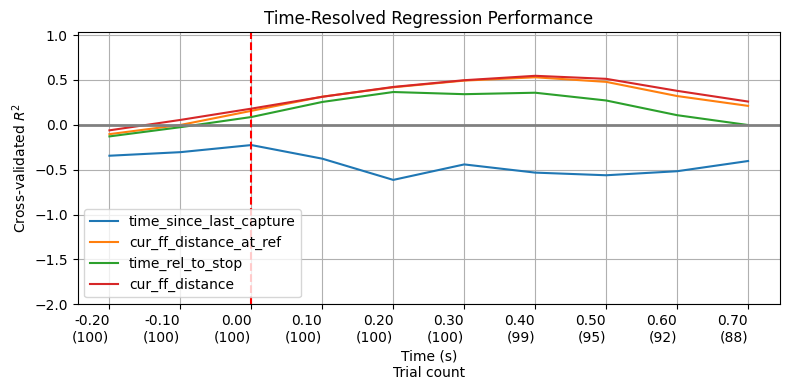

In [ ]:
pn.time_resolved_cv_scores_gpfa['trial_count'] = pn.time_resolved_cv_scores_gpfa['train_trial_count'].astype(int)

# features_to_plot = None
features_to_plot=['time_rel_to_stop', 'cur_ff_distance', 'cur_ff_distance_at_ref', 'time_since_last_capture']
pn.plot_time_resolved_regression(time_resolved_cv_scores = pn.time_resolved_cv_scores_gpfa, features_to_plot=features_to_plot)

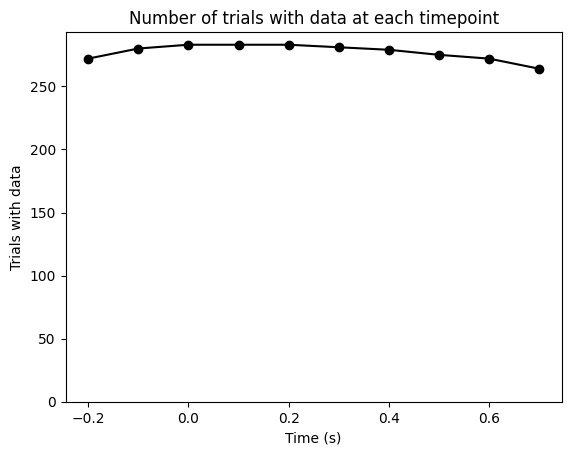

In [ ]:
plot_time_resolved_regression.plot_trial_counts_by_timepoint(
            pn.time_resolved_cv_scores_gpfa, 'trial_count')

In [ ]:
stop!

In [ ]:
pn.concat_behav_trials[features_to_plot].corr()

time_rel_to_stop_0  time_rel_to_stop_-1  \
time_rel_to_stop_0              1.00000              0.99833   
time_rel_to_stop_-1             0.99833              1.00000   
time_rel_to_stop_1              0.99827              0.99649   
time_rel_to_stop_-2             0.99250              0.99705   
time_rel_to_stop_2              0.99220              0.99078   
time_rel_to_stop_-3             0.98084              0.98789   
time_rel_to_stop_3              0.98030              0.97975   

                     time_rel_to_stop_1  time_rel_to_stop_-2  \
time_rel_to_stop_0              0.99827              0.99250   
time_rel_to_stop_-1             0.99649              0.99705   
time_rel_to_stop_1              1.00000              0.99103   
time_rel_to_stop_-2             0.99103              1.00000   
time_rel_to_stop_2              0.99695              0.98639   
time_rel_to_stop_-3             0.98004              0.99598   
time_rel_to_stop_3              0.98741              0.97701   

                     time_rel_to_stop_2  time_rel_to_stop_-3  \
time_rel_to_stop_0              0.99220              0.98084   
time_rel_to_stop_-1             0.99078              0.98789   
time_rel_to_stop_1              0.99695              0.98004   
time_rel_to_stop_-2             0.98639              0.99598   
time_rel_to_stop_2              1.00000              0.97685   
time_rel_to_stop_-3             0.97685              1.00000   
time_rel_to_stop_3              0.99581              0.96995   

                     time_rel_to_stop_3  
time_rel_to_stop_0              0.98030  
time_rel_to_stop_-1             0.97975  
time_rel_to_stop_1              0.98741  
time_rel_to_stop_-2             0.97701  
time_rel_to_stop_2              0.99581  
time_rel_to_stop_-3             0.96995  
time_rel_to_stop_3              1.00000

## point-wise segment regression

In [24]:
pn.prepare_seg_aligned_data()
pn.get_gpfa_traj(latent_dimensionality=7, exists_ok=True)

use_raw_spike_data_instead = False
use_lagged_rebinned_behav_data = False
pn.get_concat_data_for_regression(use_raw_spike_data_instead=use_raw_spike_data_instead,
                                  use_lagged_rebinned_behav_data=use_lagged_rebinned_behav_data,
                                  apply_pca_on_raw_spike_data=True,
                                  use_lagged_raw_spike_data=False,) 

new_seg_duration is now 1.0, and post_event_window is now 0.75
Loaded new_seg_info from all_monkey_data/planning_and_neural/monkey_Schro/data_0321/new_seg_info/tlim2_cur_first_pre0p25_post0p75.csv
Dropped 28 columns due to containing NA in rebinned_y_var via calling drop_na_cols function: ['cur_opt_arc_curv', 'cur_cntr_arc_curv', 'cur_opt_arc_end_heading', 'cur_cntr_arc_end_heading', 'angle_opt_arc_from_cur_end_to_nxt', 'angle_cntr_arc_from_cur_end_to_nxt', 'abs_angle_opt_arc_from_cur_end_to_nxt', 'abs_angle_cntr_arc_from_cur_end_to_nxt', 'cum_distance_since_target_last_seen', 'time_since_target_last_seen', 'monkey_angle_target_cluster_last_seen', 'distance_from_monkey_pos_target_last_seen', 'monkey_y_target_last_seen', 'time_target_last_seen', 'target_cluster_last_seen_time', 'cum_distance_when_target_last_seen', 'd_heading_since_target_last_seen', 'monkey_x_target_last_seen', 'monkey_y_target_cluster_last_seen', 'target_last_seen_angle_to_boundary', 'target_cluster_last_seen_angle_to

In [25]:
pn.retrieve_or_make_time_resolved_cv_scores()

Loaded time_resolved_cv_scores from all_monkey_data/planning_and_neural/monkey_Schro/data_0321/event_aligned/time_resolved_cv_scores/precomputed_gpfa/scores_b0p1_t2_cur_first_p0p25_po0p75_d7_cv5.csv


### plot some

In [ ]:
pn.plot_time_resolved_regression(features_to_plot=['time_rel_to_stop', 'cur_ff_distance', 'cur_ff_distance_at_ref', 'time_since_last_capture'])

### plot all

In [ ]:
pn.plot_time_resolved_regression()

## cv score comparison: GPFA Inside vs Outside CV Loop


### one feature

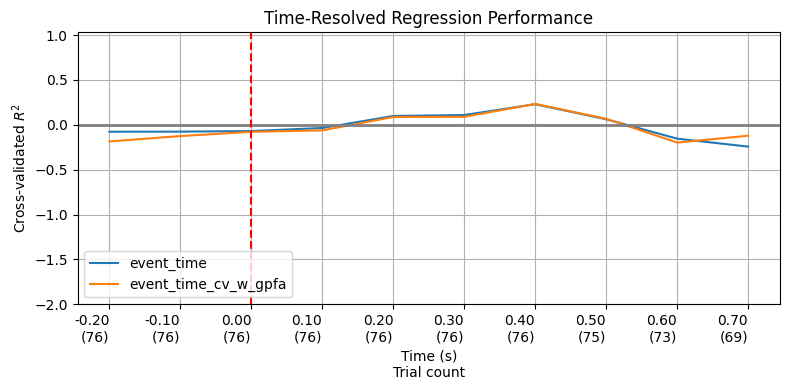

In [23]:
feature = 'event_time'
new_cv_scores = pd.concat([pn.time_resolved_cv_scores[['new_bin', 'bin_mid_time', 'trial_count', feature]], 
                           pn.time_resolved_cv_scores_gpfa[[feature]].rename(columns={feature: f'{feature}_cv_w_gpfa'})], axis=1)
pn.plot_time_resolved_regression(time_resolved_cv_scores=new_cv_scores, score_threshold_to_plot=None,
                                 rank_by_max_score=False)

### all features

target_has_disappeared_for_last_time_dummy


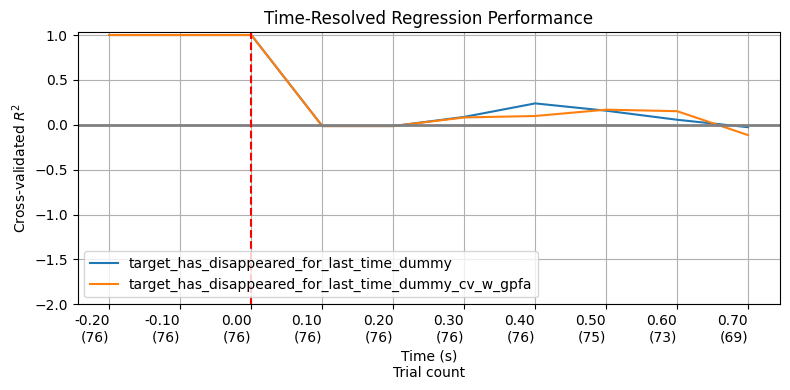

capture_target_dummy


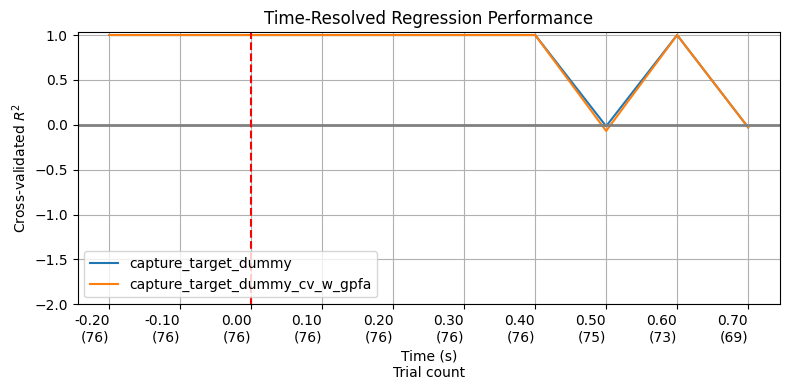

bin_mid_time_rel_to_event


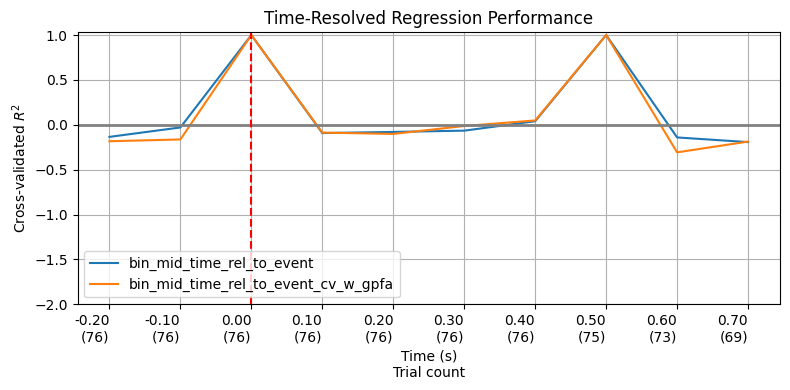

target_visible_dummy


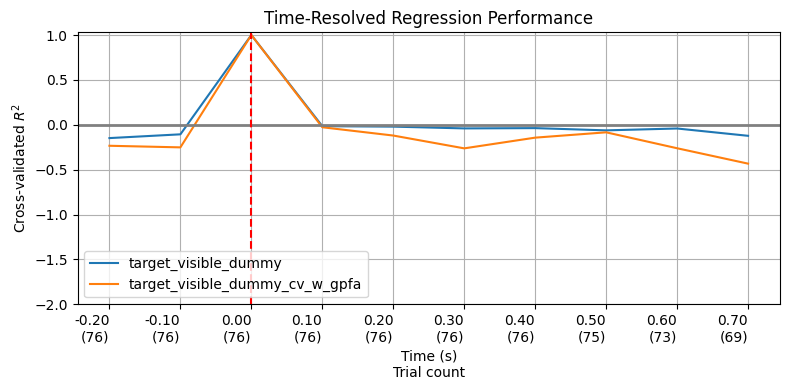

target_cluster_visible_dummy


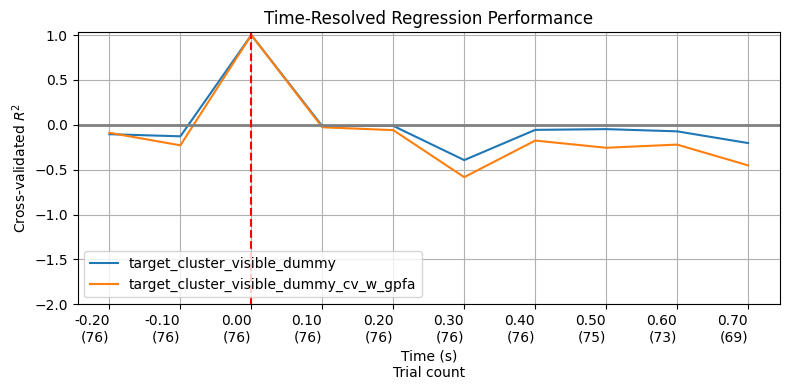

whether_new_distinct_stop


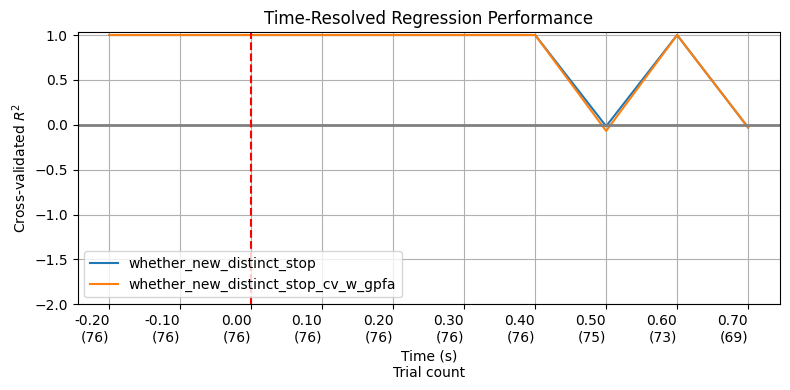

target_cluster_has_disappeared_for_last_time_dummy


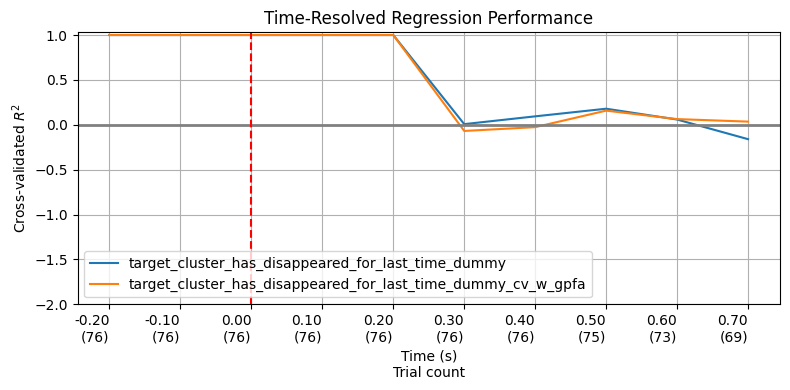

cur_ff_distance


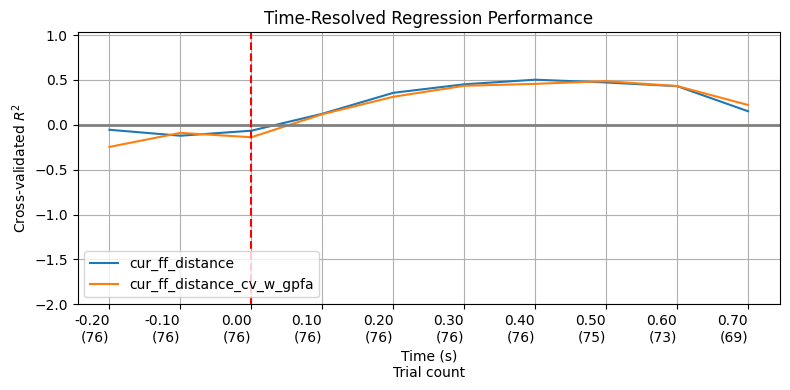

target_distance


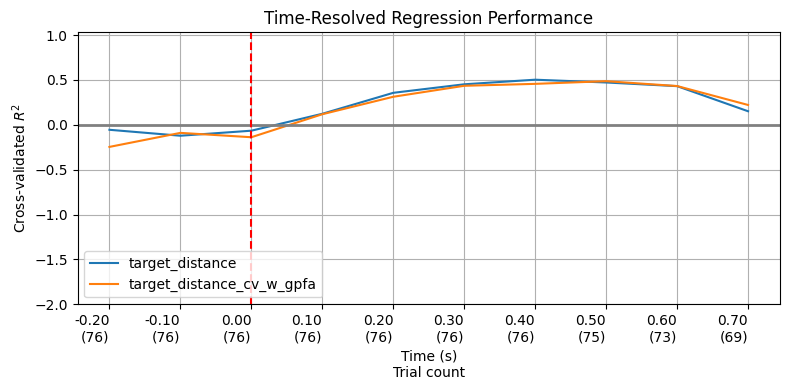

cur_ff_rel_y


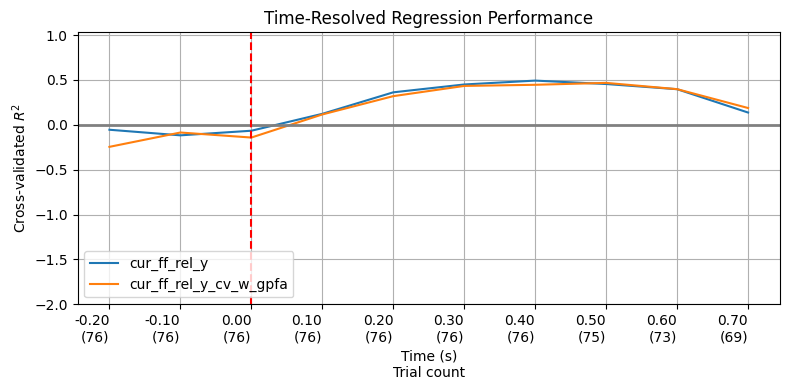

target_rel_y


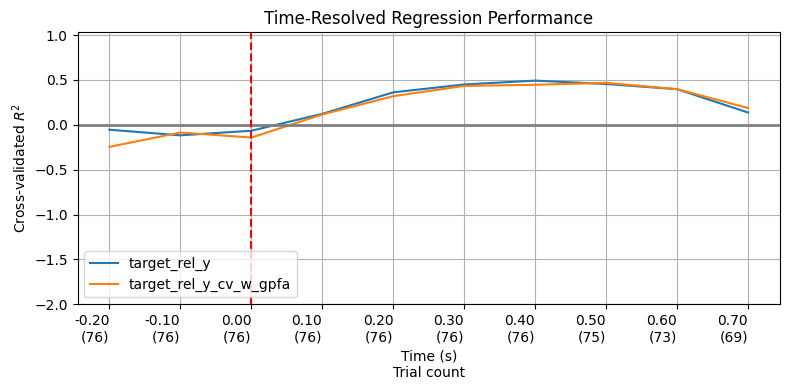

rel_cur_ff_first_seen_time_bbas


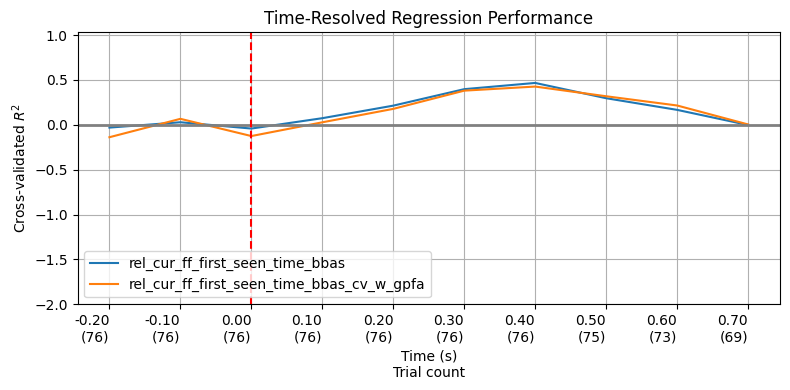

time_rel_to_stop


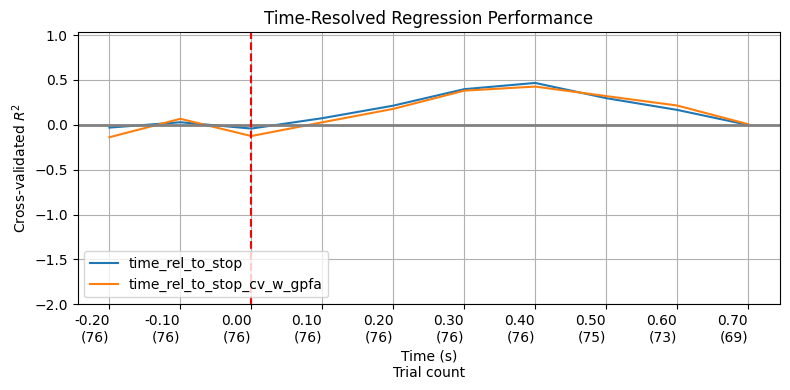

cur_ff_distance_at_ref


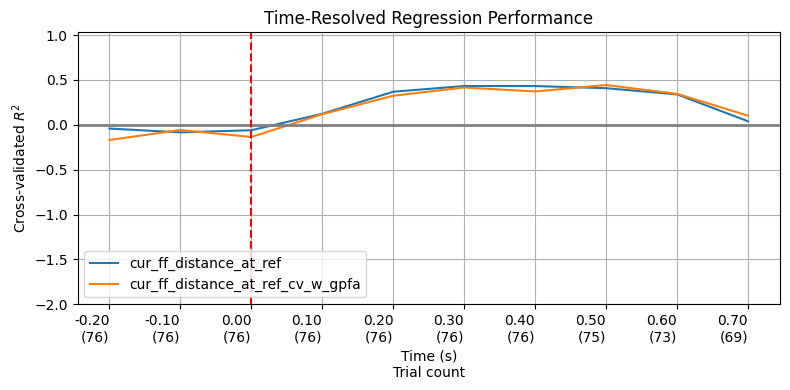

event_time


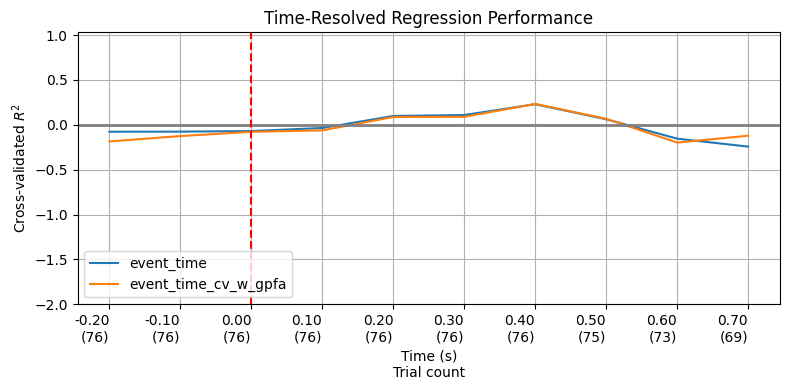

time


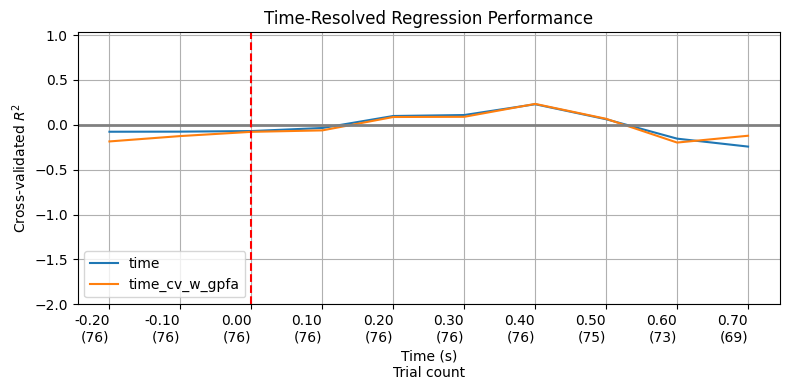

new_segment


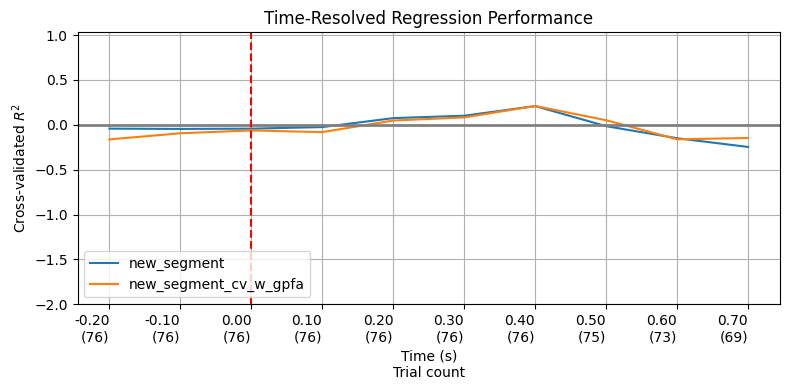

LDz


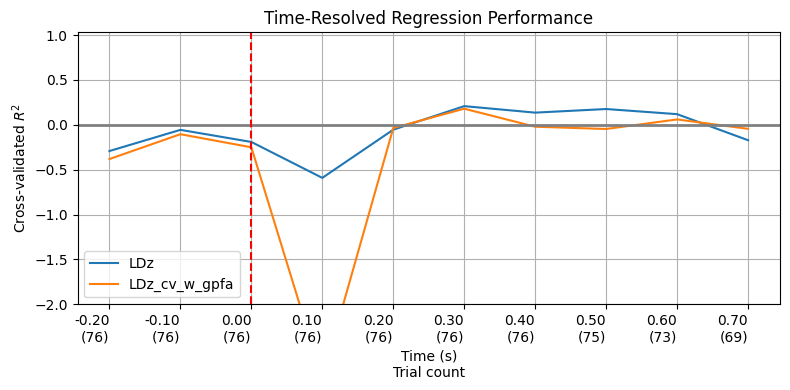

target_index


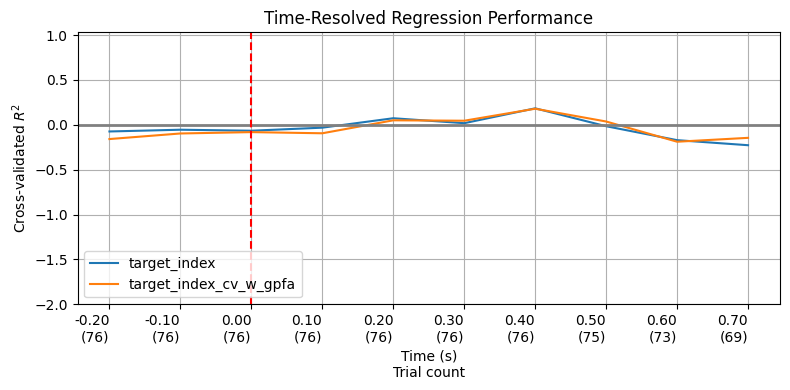

RDz


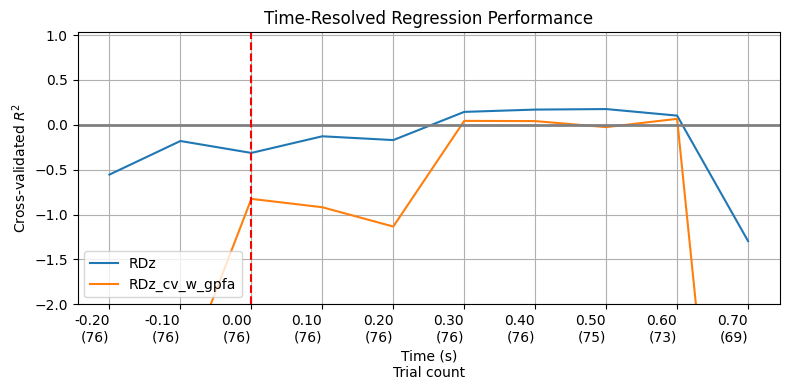

cum_distance


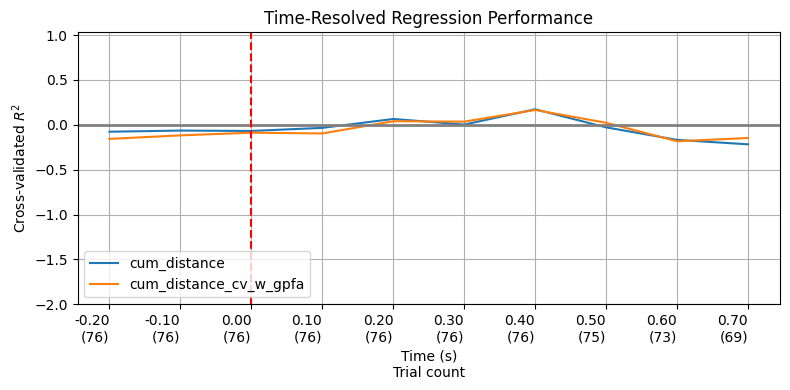

valid_view_point_r


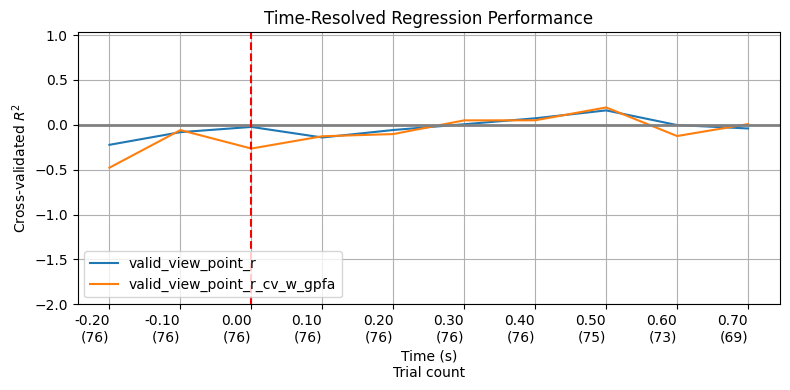

valid_view_point


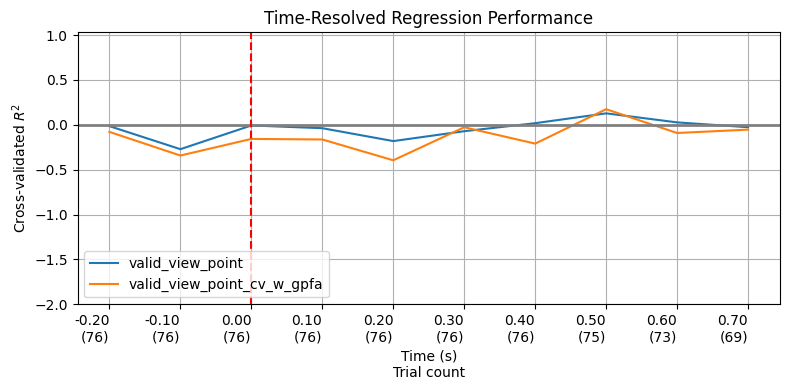

gaze_mky_view_y


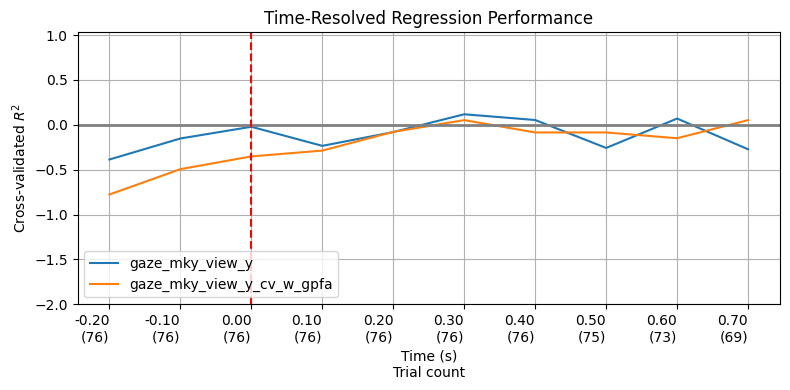

abs_cur_ff_angle


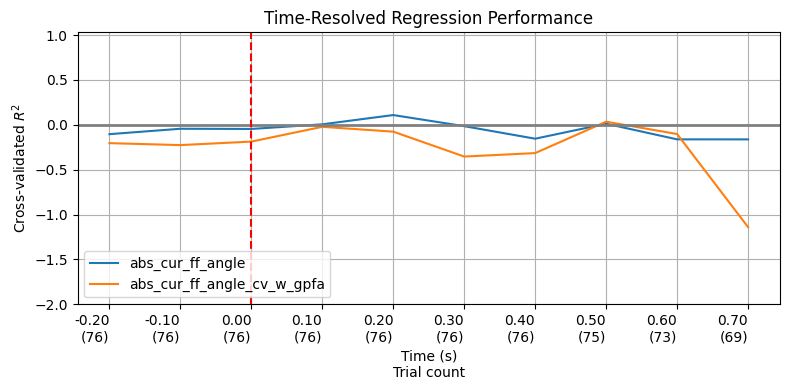

gaze_mky_view_y_l


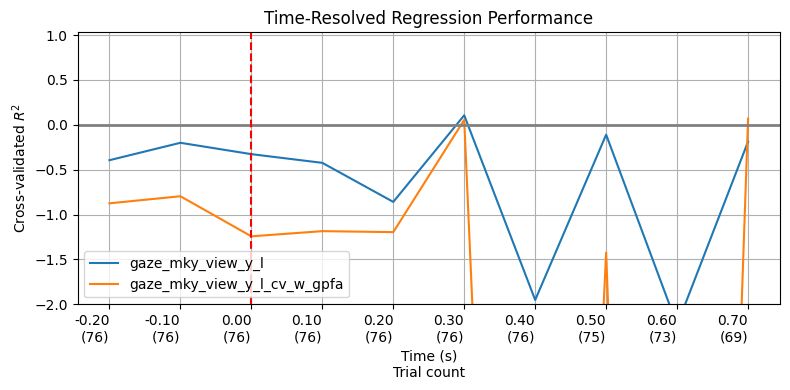

abs_angle_from_cur_ff_to_stop


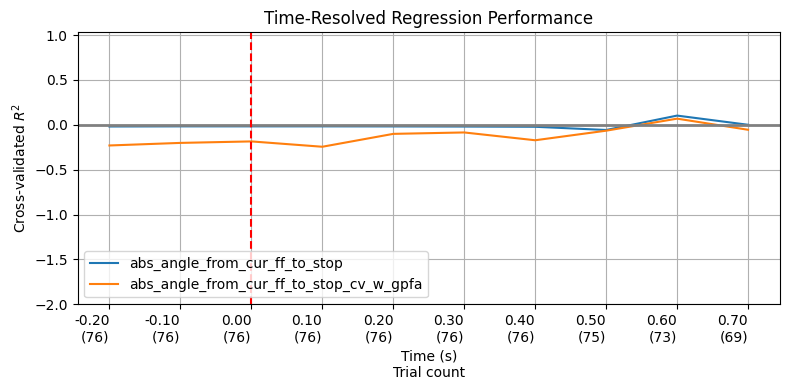

abs_angle_from_m_before_stop_to_cur_ff


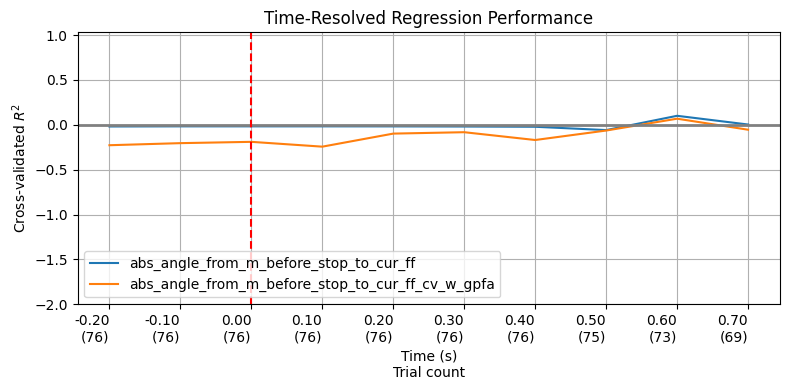

abs_cur_ff_angle_boundary_at_ref


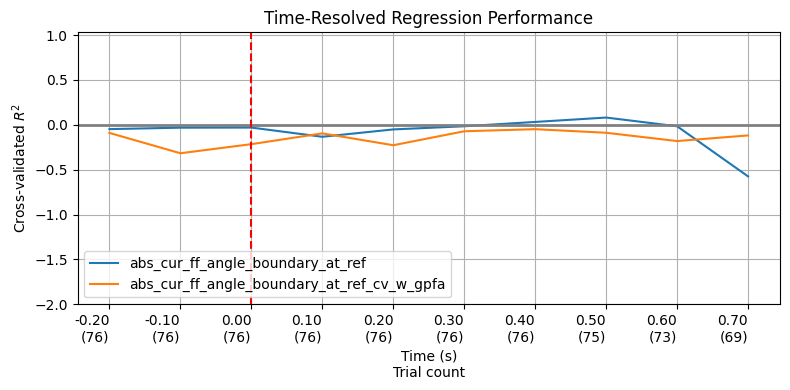

valid_view_point_l


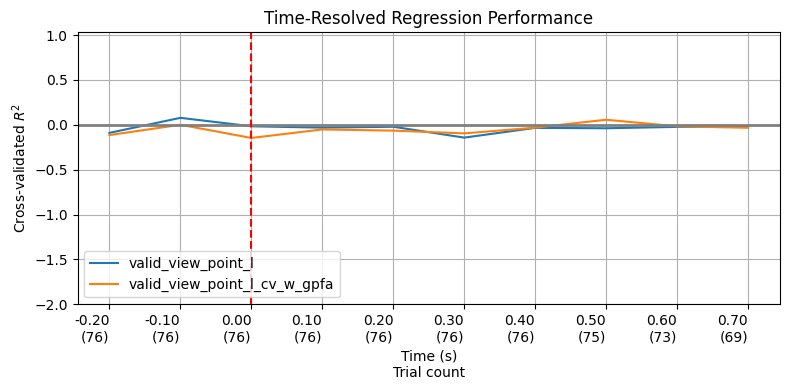

monkey_ddw


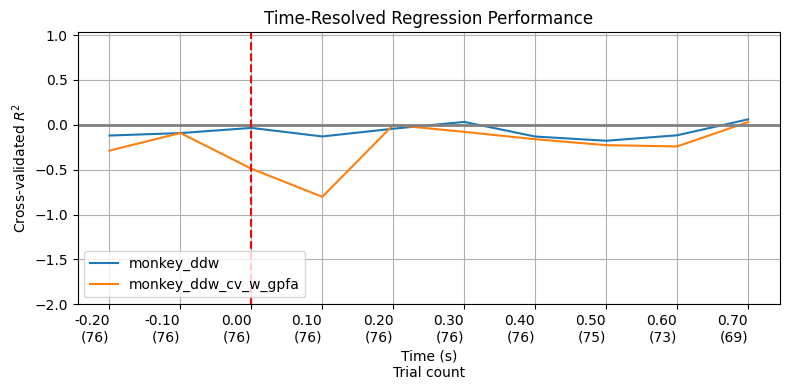

dir_from_cur_ff_to_stop


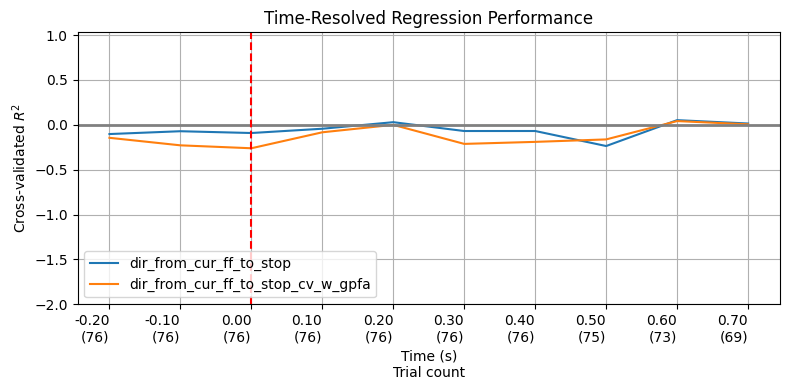

abs_cur_ff_angle_at_ref


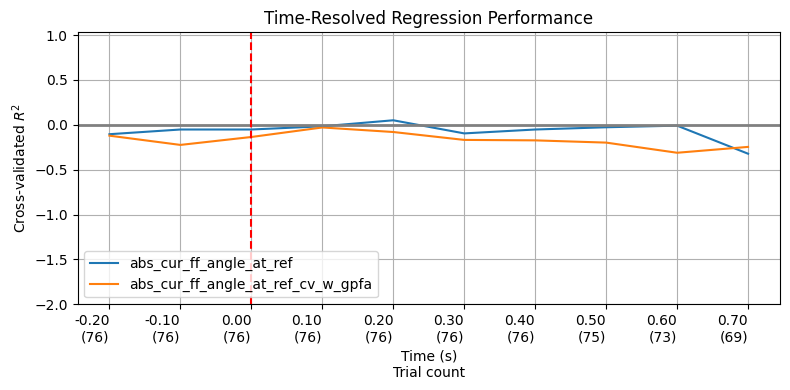

cur_ff_angle_boundary_at_ref


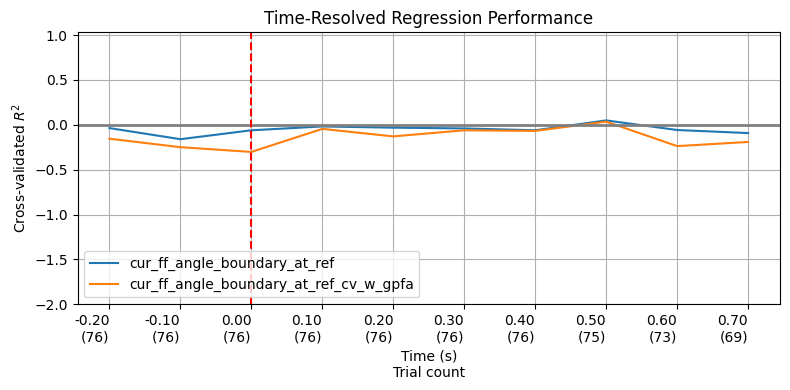

monkey_speed


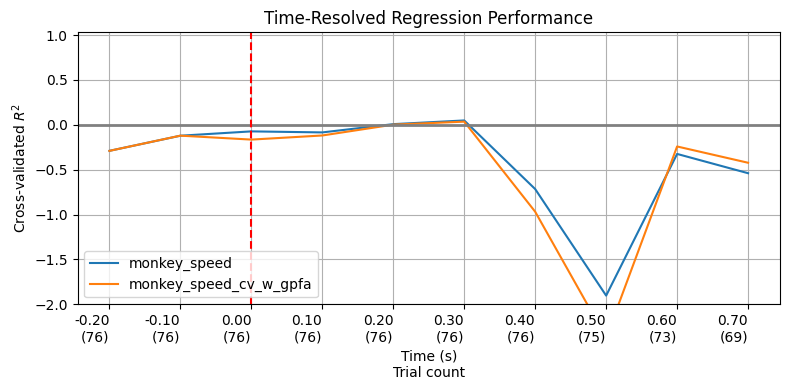

delta_distance


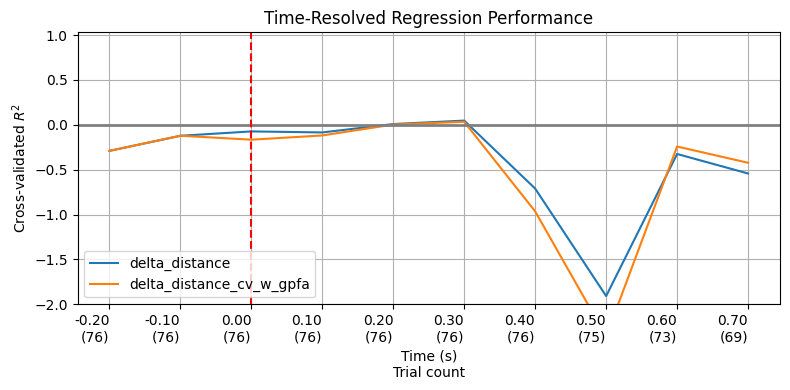

monkey_ddv


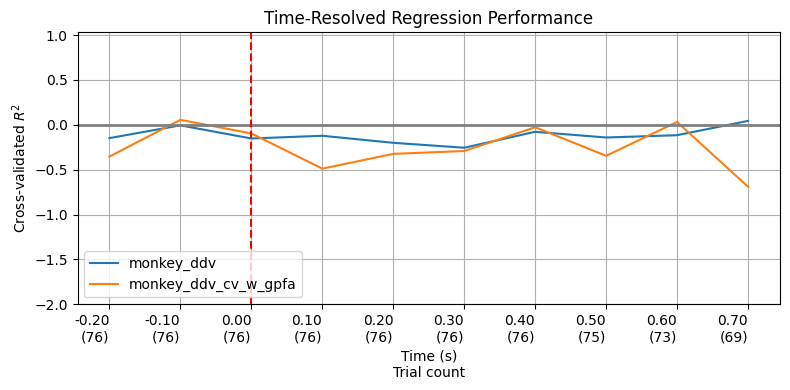

target_opt_arc_dheading


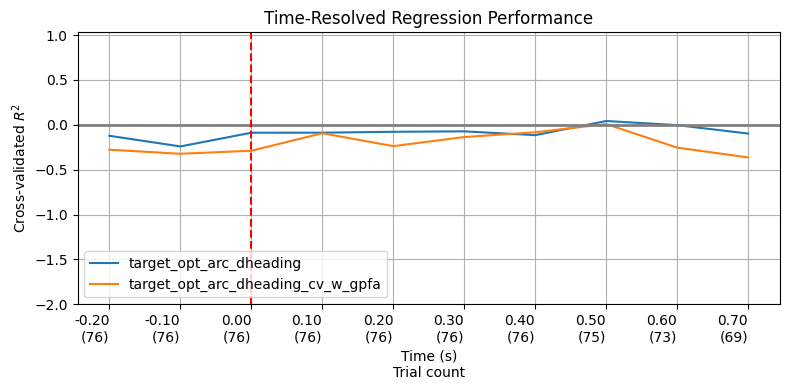

monkey_speeddummy


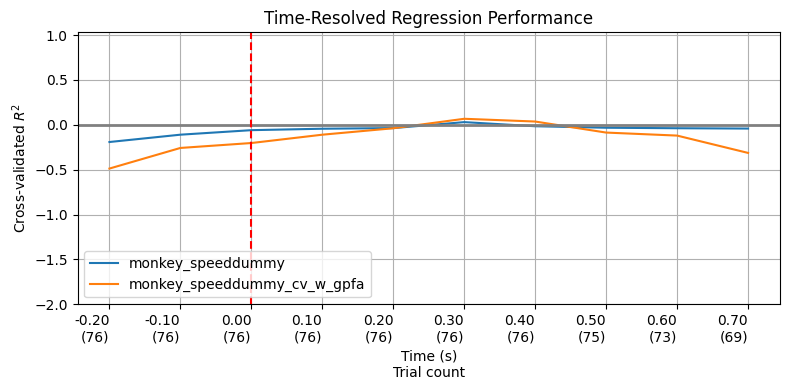

angle_from_m_before_stop_to_cur_ff


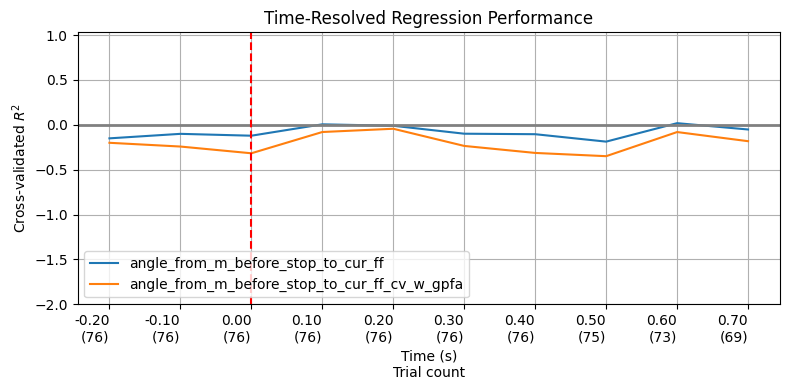

monkey_speed_smr


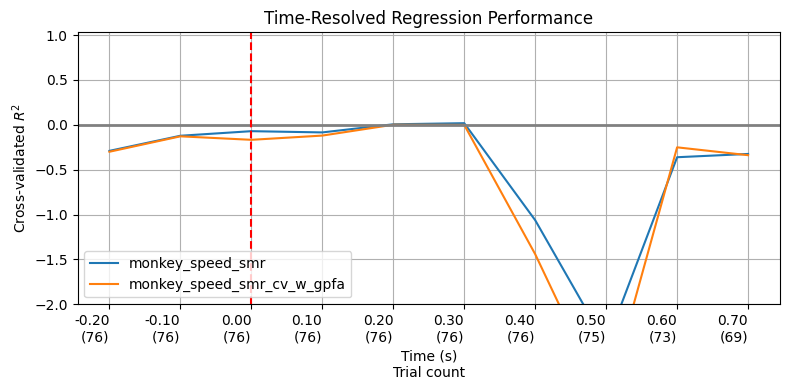

abs_cur_ff_rel_x


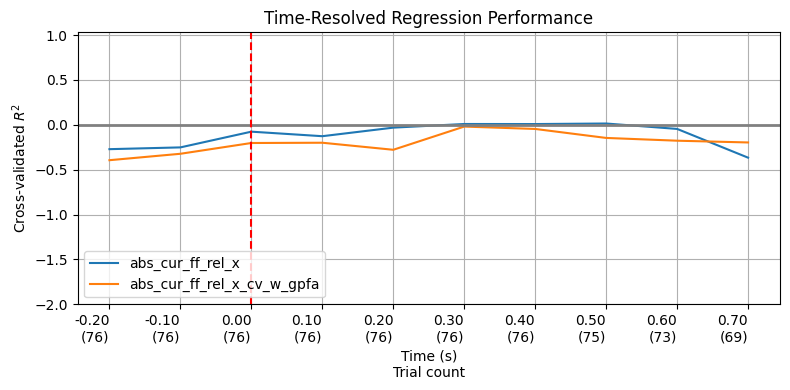

target_angle_to_boundary


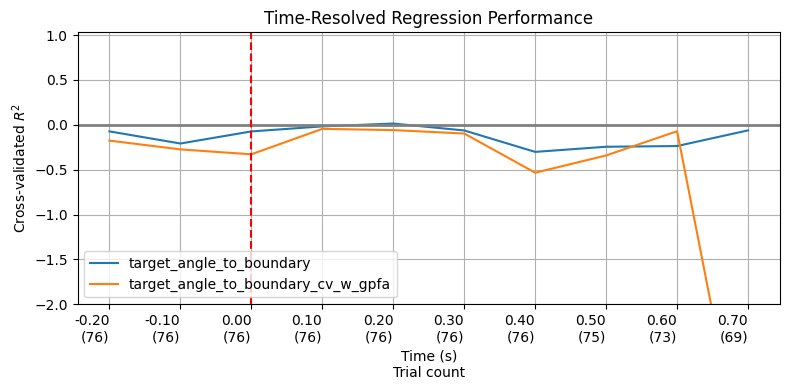

eye_world_speed


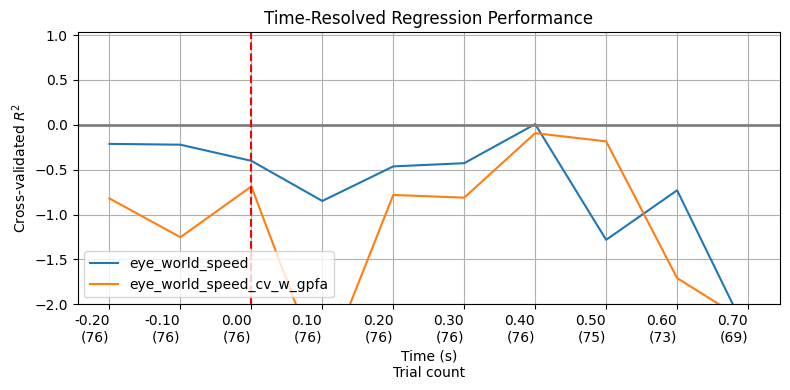

gaze_world_y


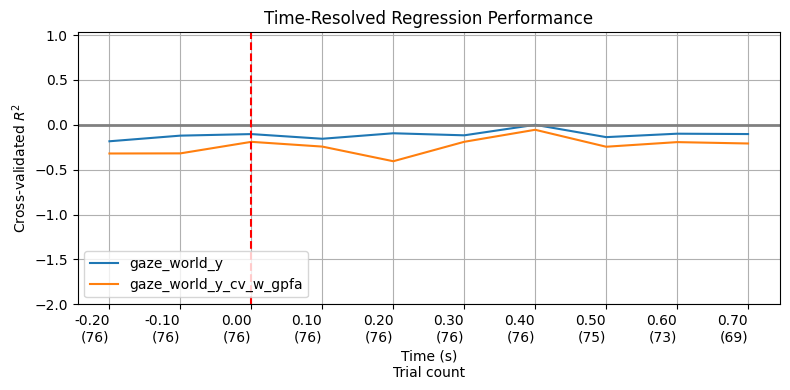

rel_cur_ff_last_seen_time_bbas


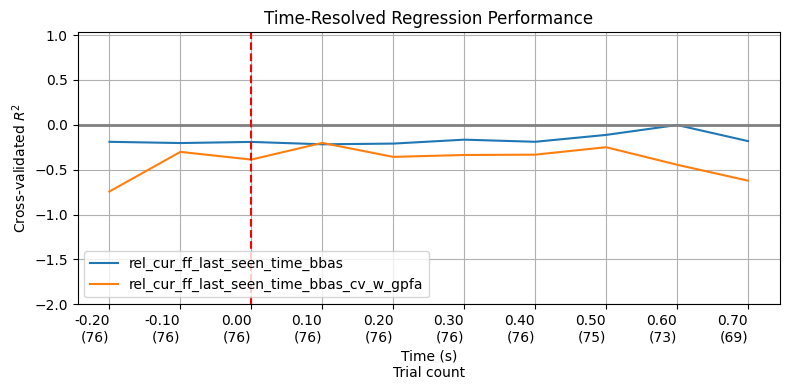

target_rel_x


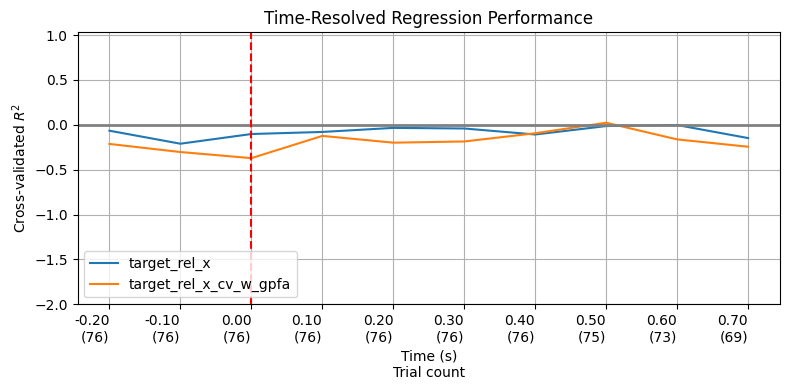

cur_ff_rel_x


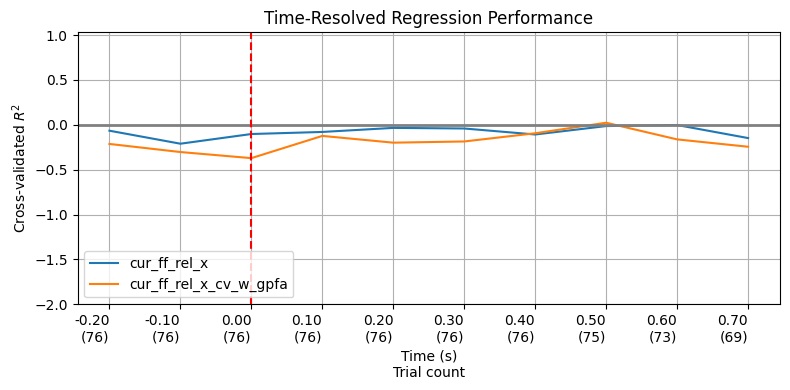

cur_ff_angle_at_ref


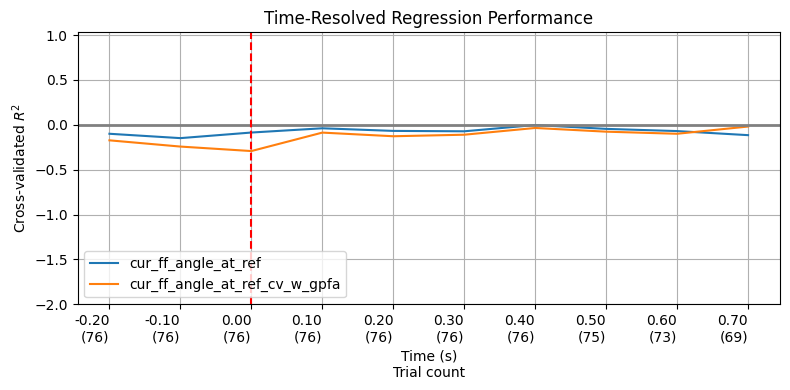

nxt_ff_rel_y


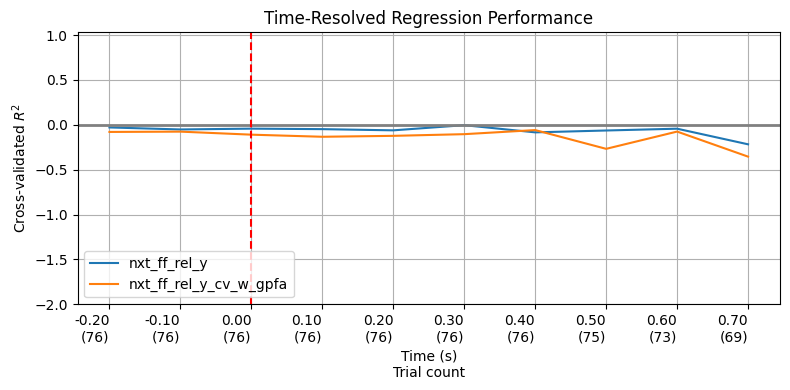

monkey_x_smr


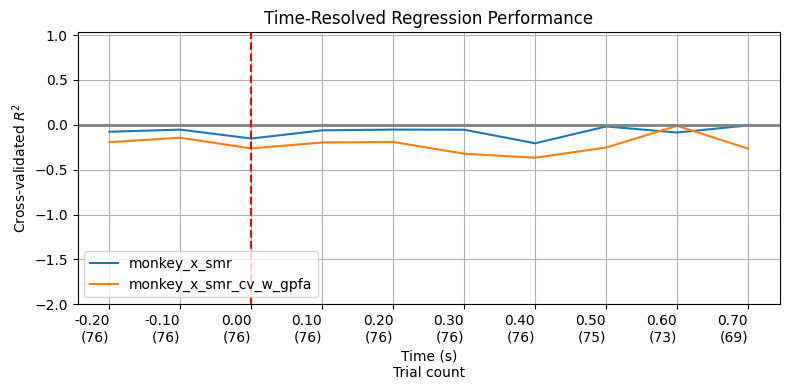

monkey_x


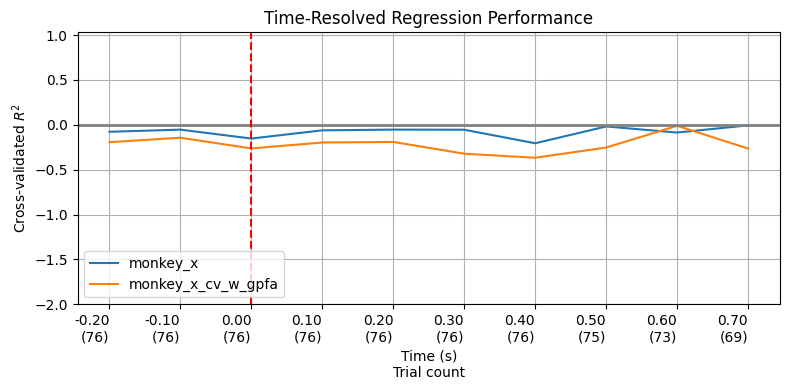

abs_angle_from_cur_ff_to_nxt_ff


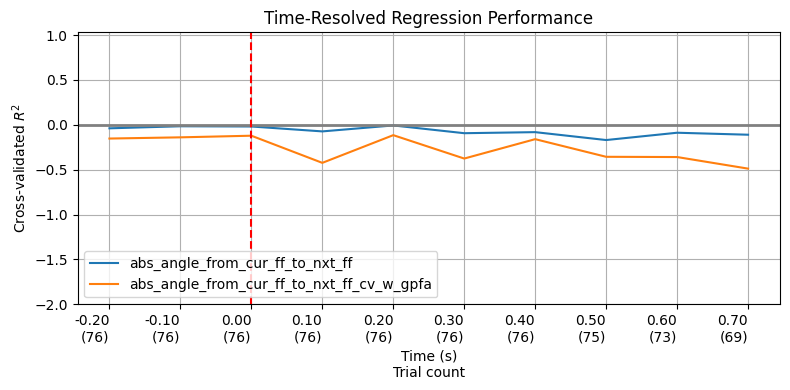

angle_from_cur_ff_to_stop


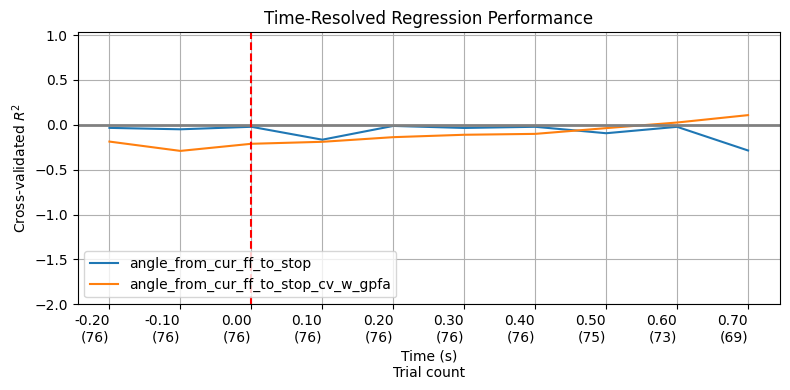

cur_ff_cluster_50_size


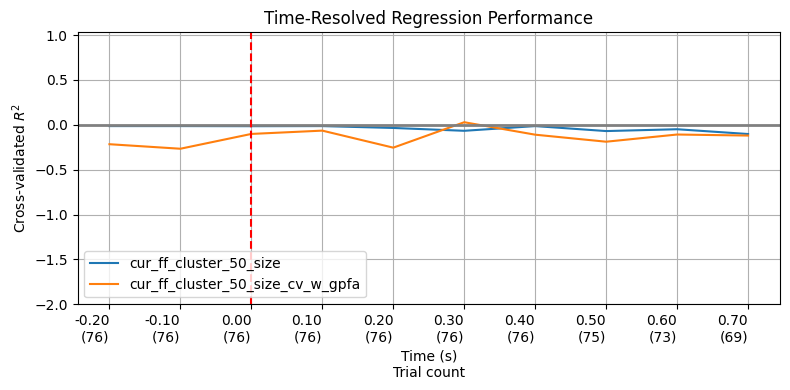

nxt_ff_distance_at_ref


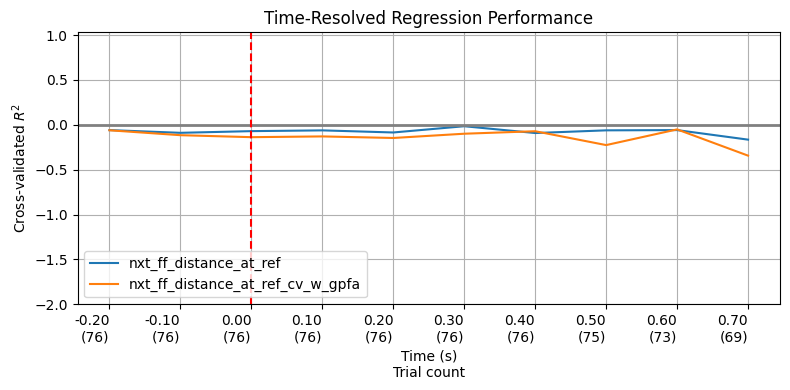

target_x


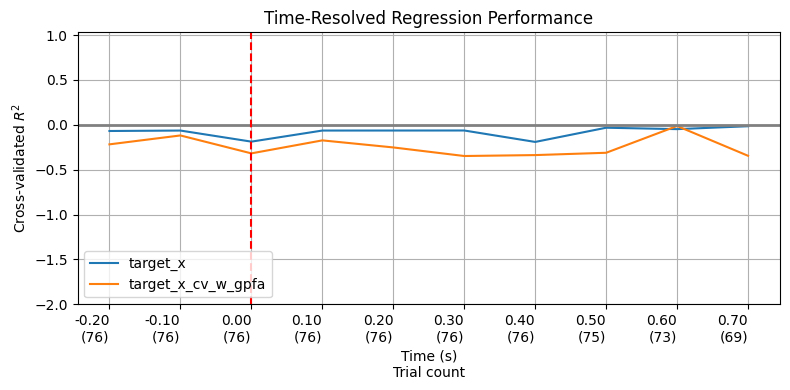

monkey_angle


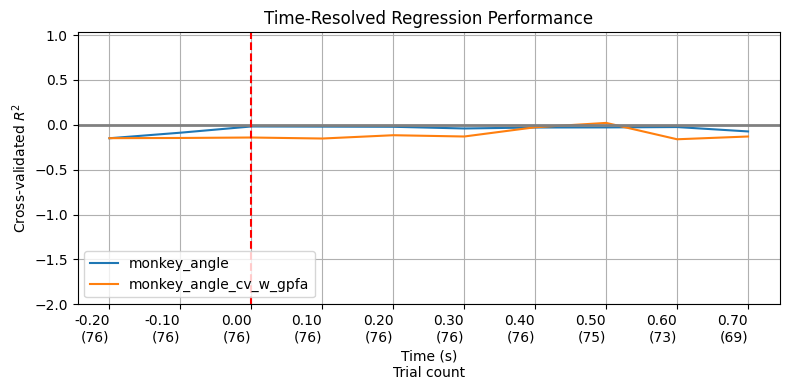

nxt_opt_arc_curv


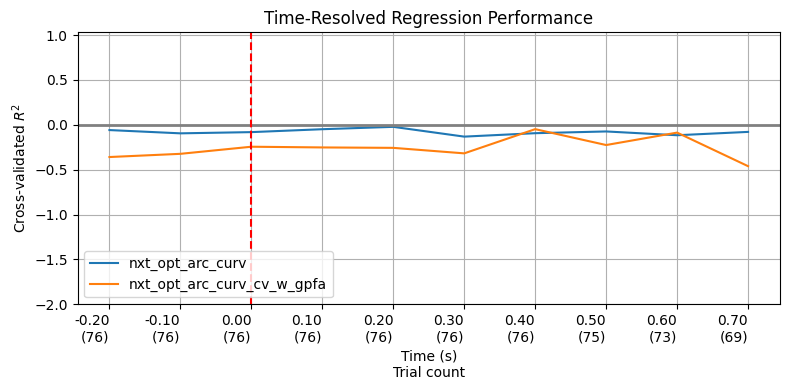

gaze_world_x_l


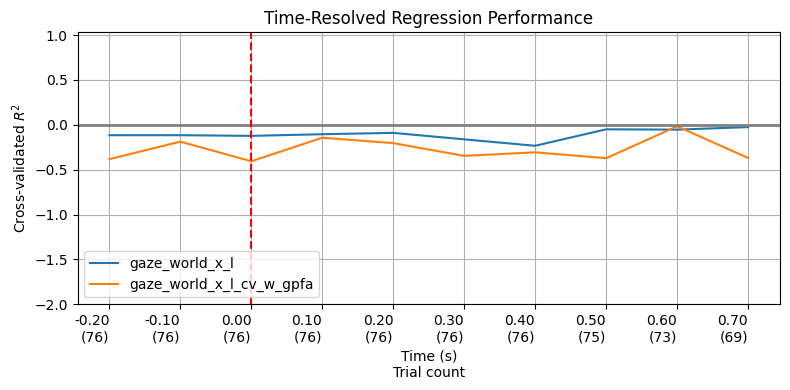

angle_from_m_before_stop_to_nxt_ff


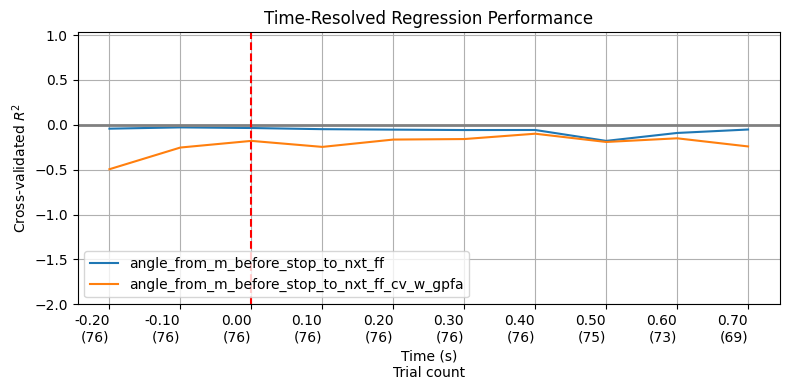

abs_angle_from_m_before_stop_to_nxt_ff


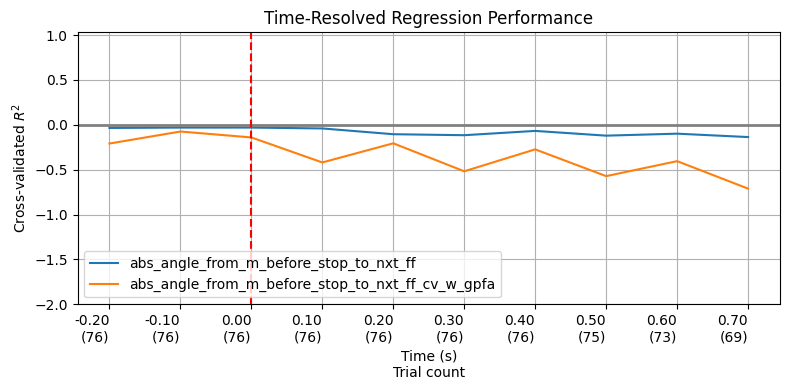

dt


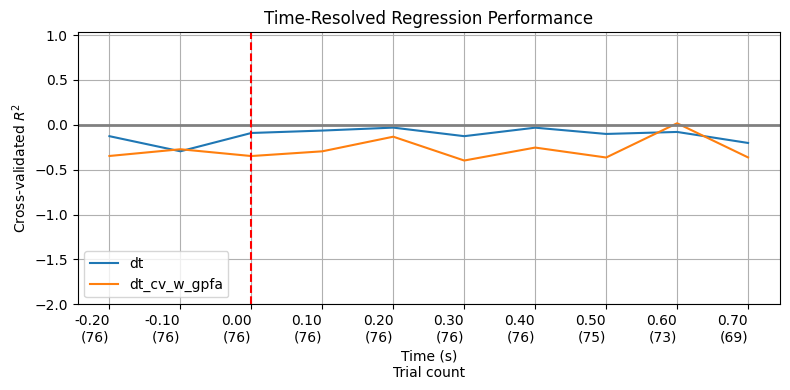

dir_from_cur_ff_to_nxt_ff


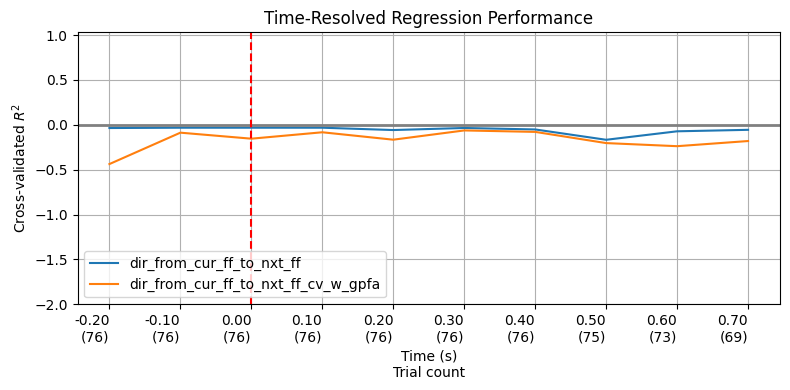

nxt_cntr_arc_curv


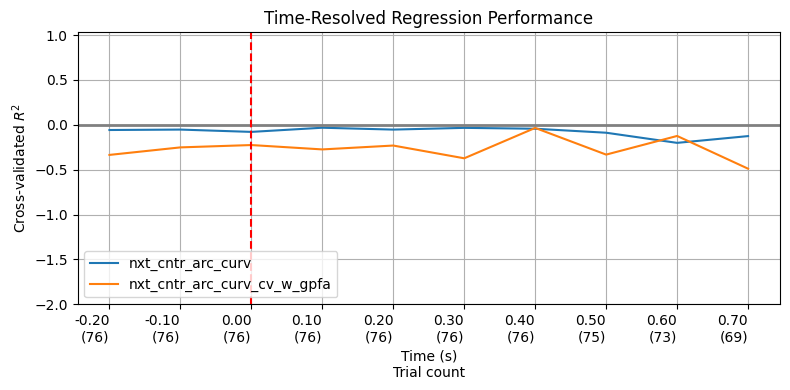

gaze_mky_view_x_l


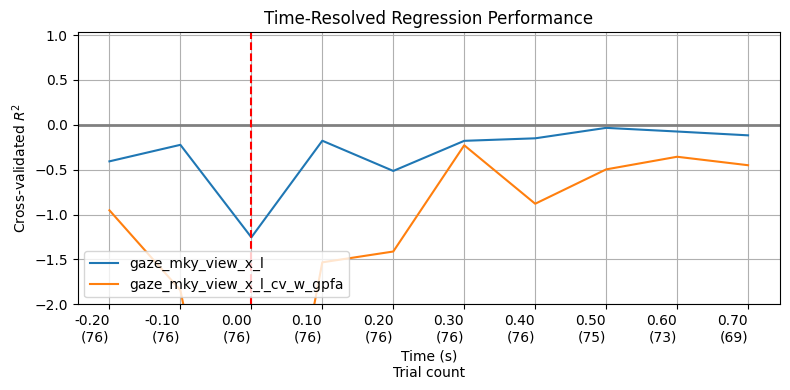

angle_from_cur_ff_to_nxt_ff


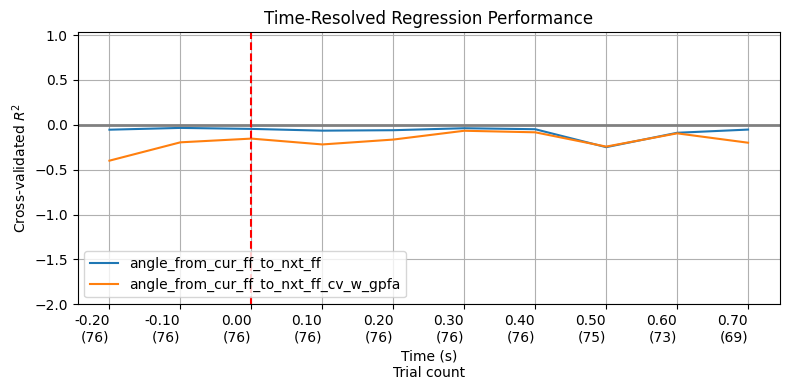

curv_iqr


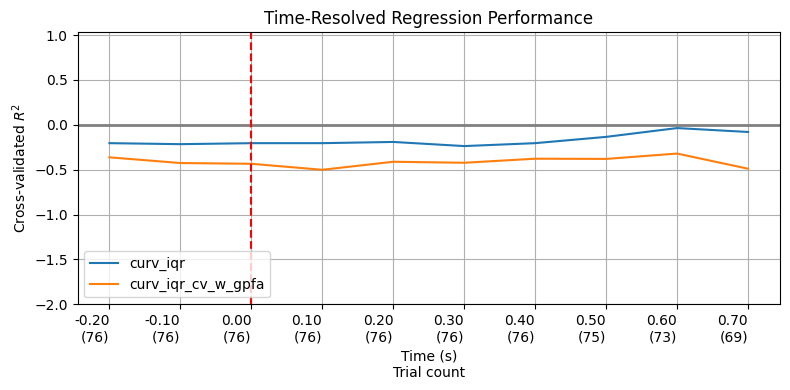

nxt_ff_distance


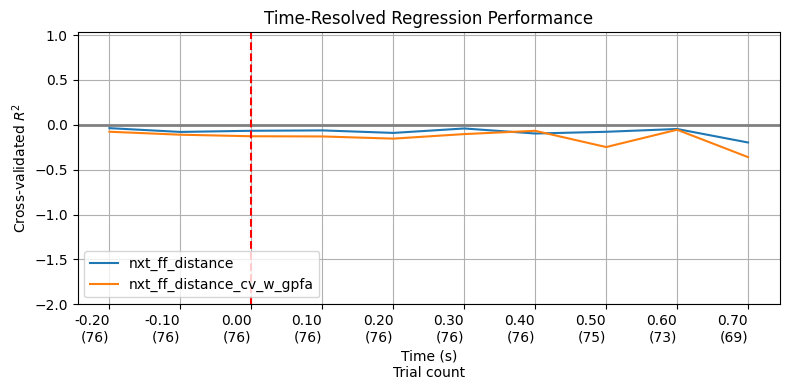

gaze_world_x


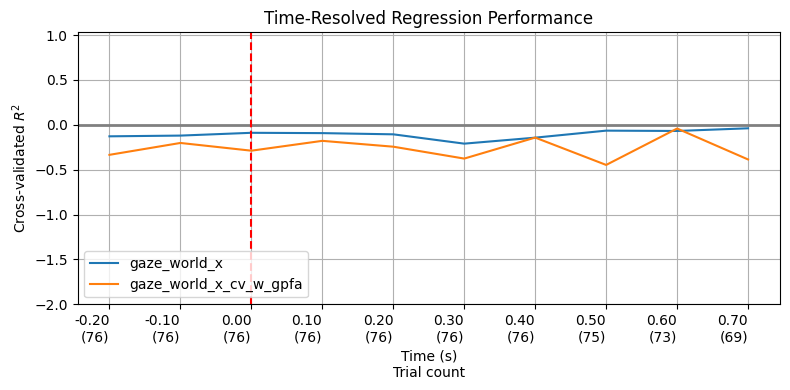

whether_test


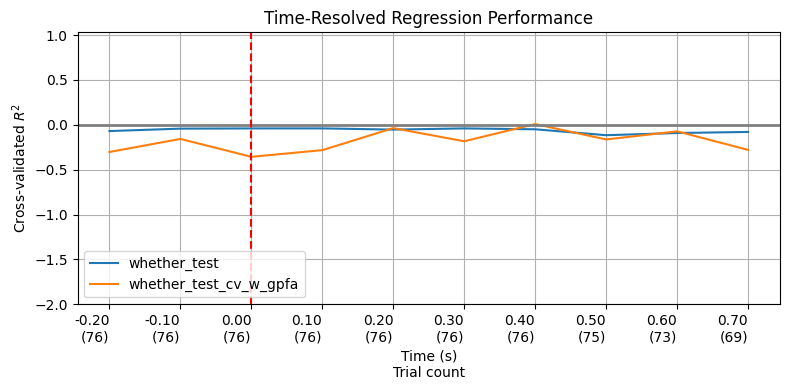

nxt_ff_angle_at_ref


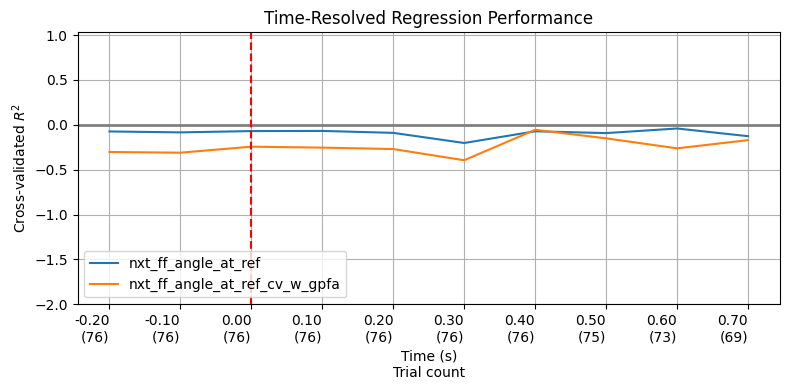

nxt_ff_rel_x


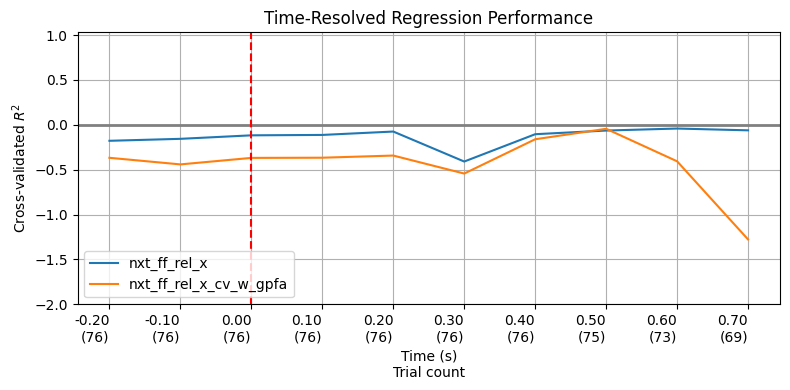

target_y


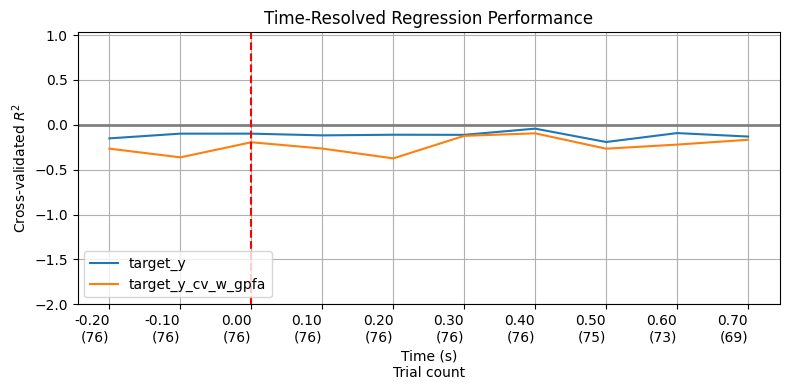

gaze_mky_view_angle_r


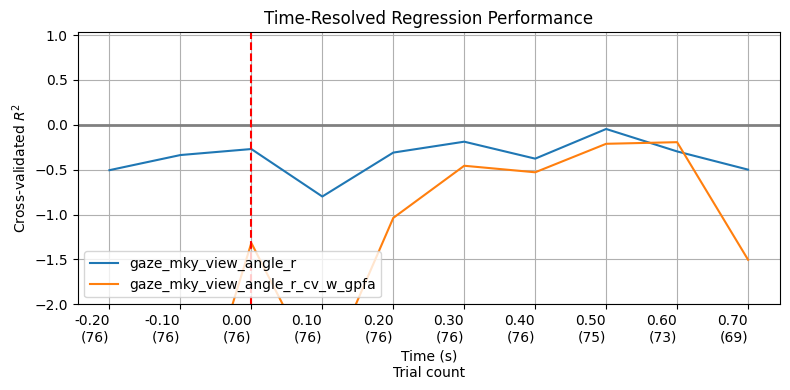

gaze_world_y_l


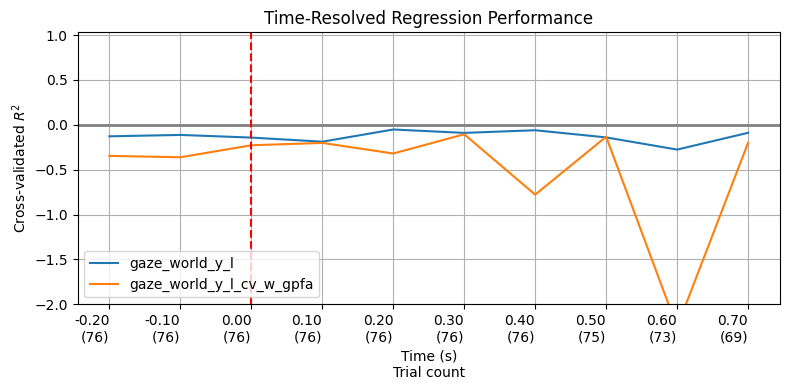

gaze_mky_view_angle


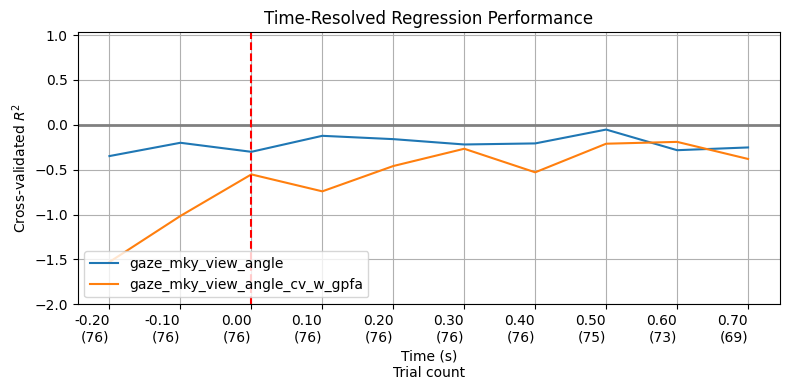

gaze_mky_view_x_r


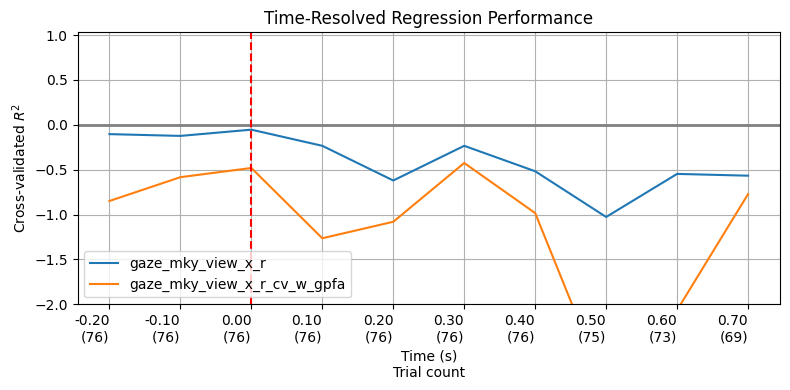

RDy


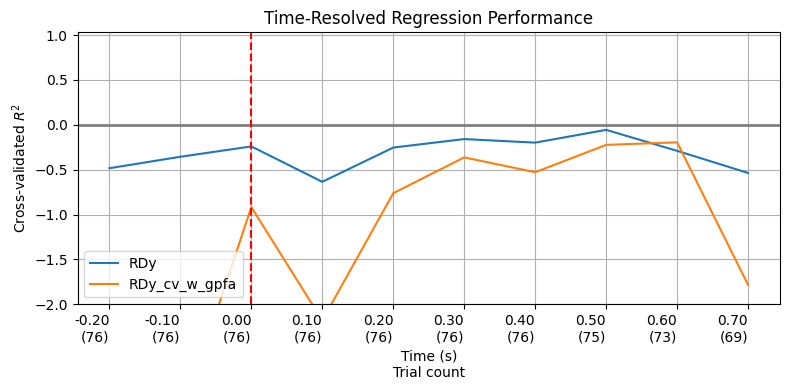

gaze_world_x_r


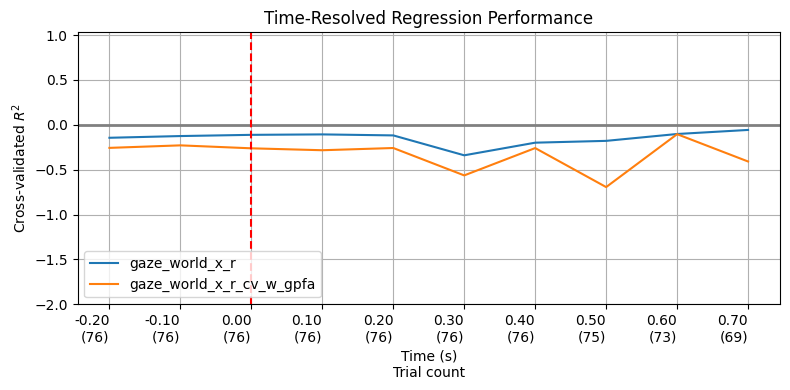

monkey_dw


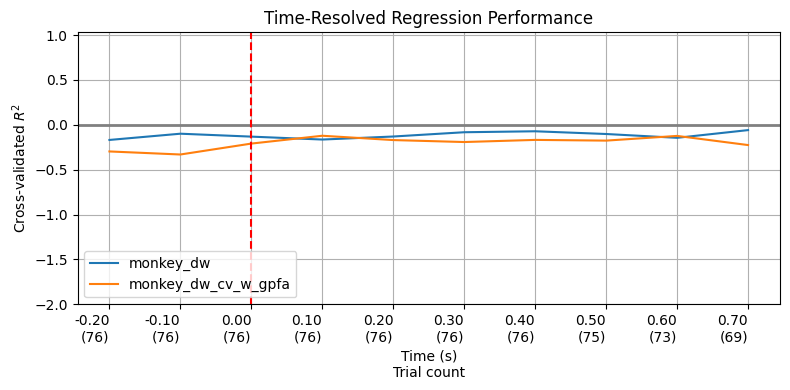

nxt_ff_angle


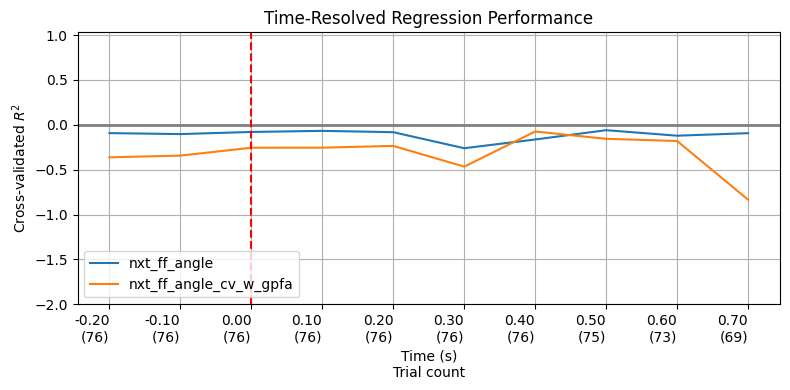

cur_ff_angle


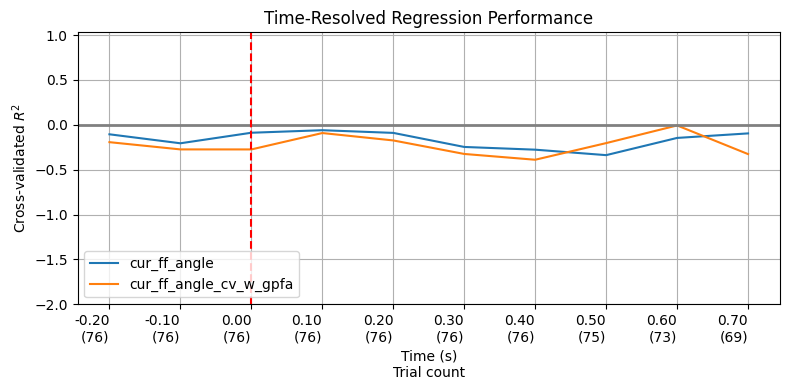

target_angle


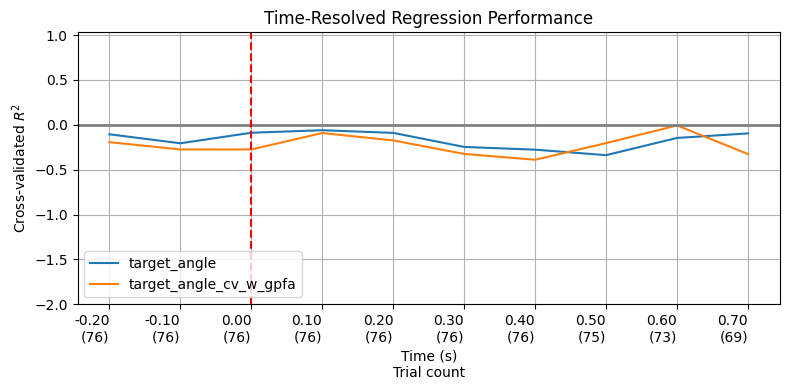

LDy


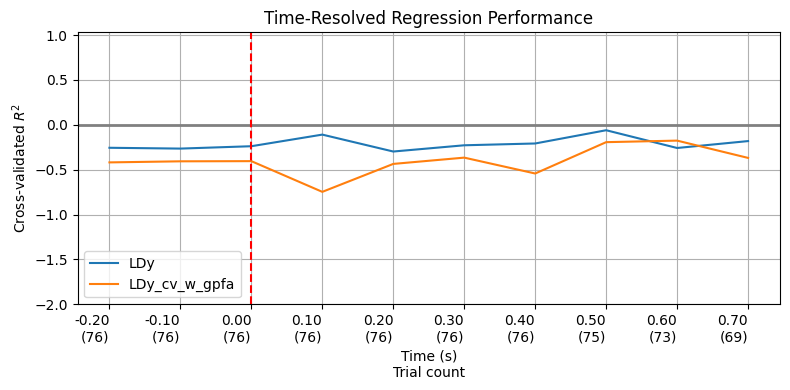

gaze_mky_view_x


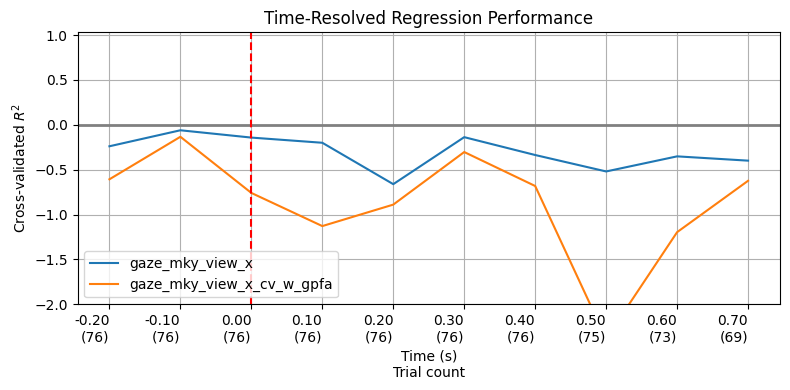

monkey_dw_smr


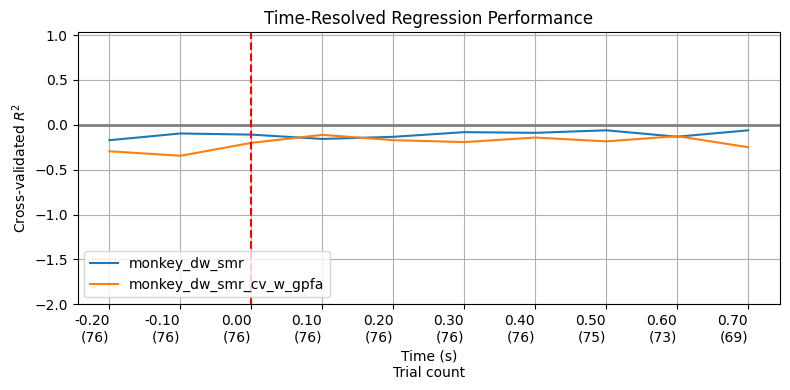

time_since_last_capture


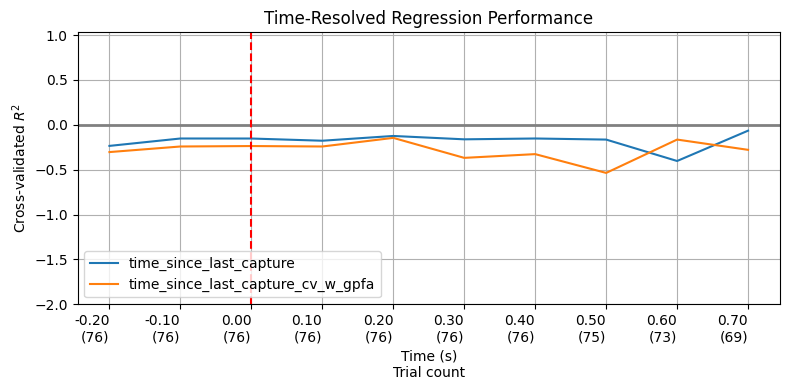

nxt_opt_arc_dheading


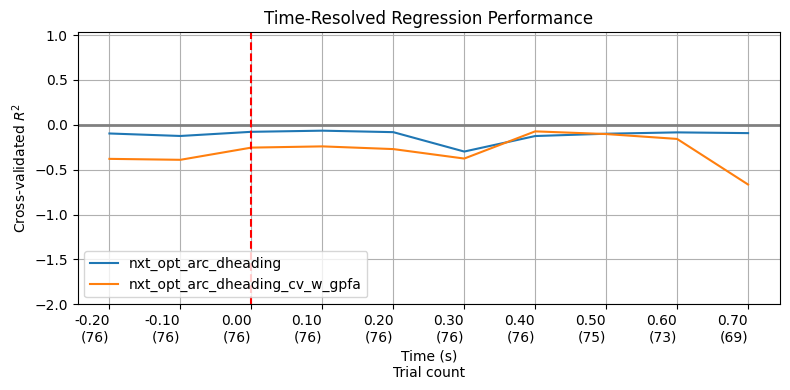

gaze_mky_view_angle_l


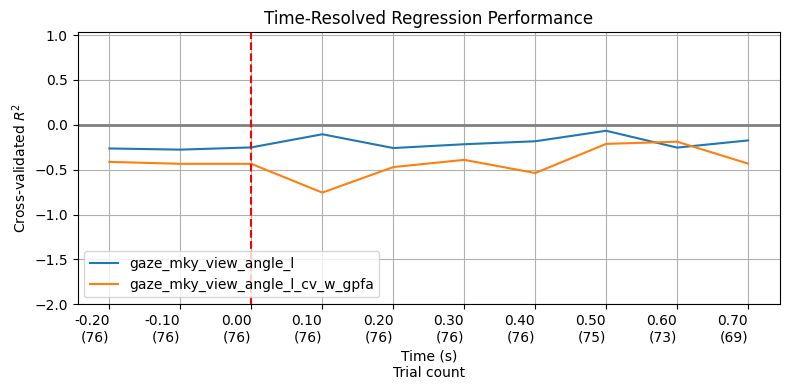

monkey_y


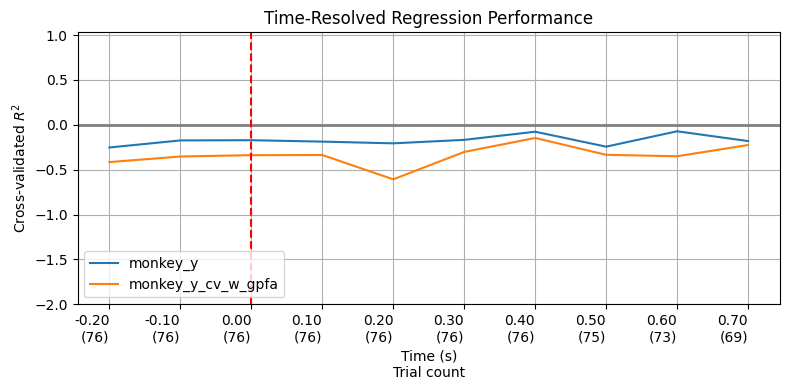

monkey_y_smr


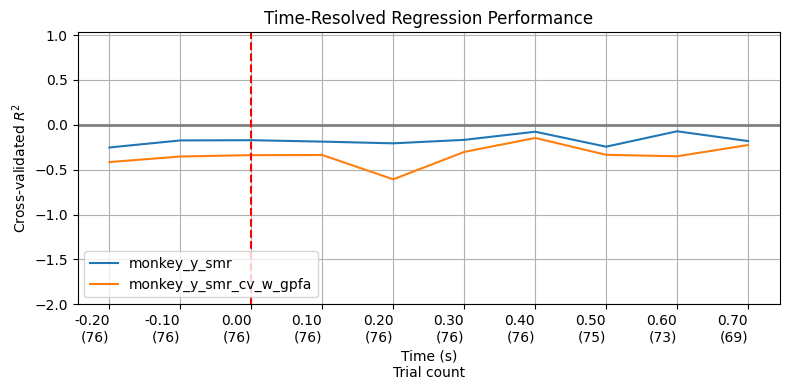

dir_from_cur_ff_same_side


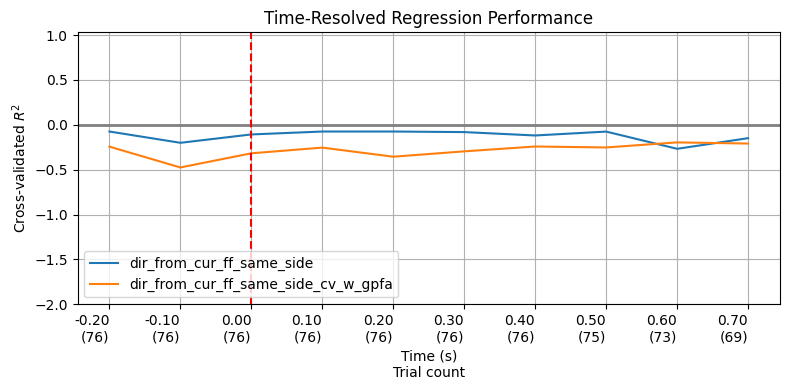

gaze_mky_view_y_r


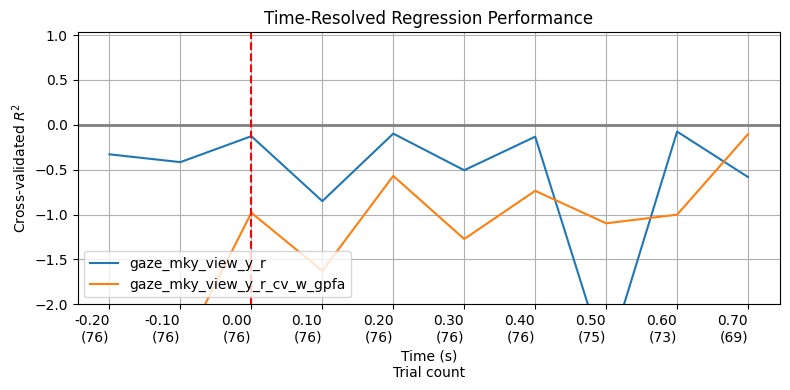

traj_curv


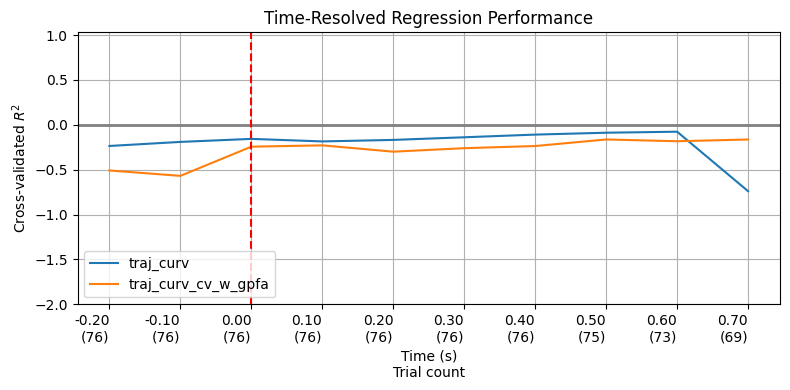

cur_opt_arc_dheading


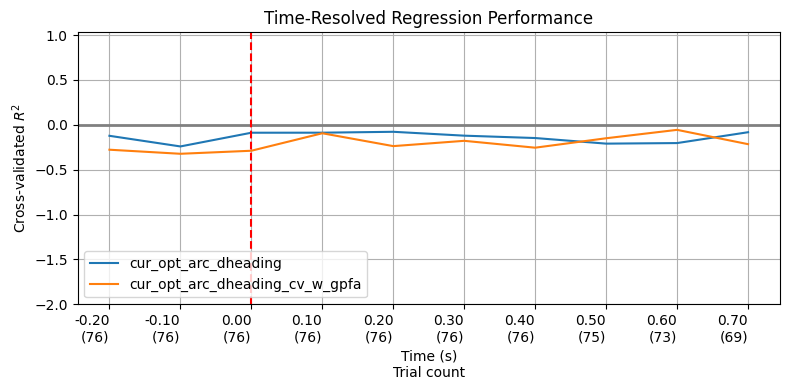

curv_range


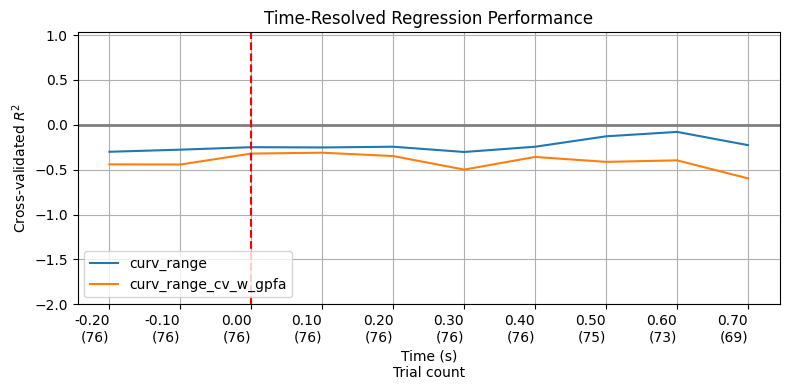

turning_right


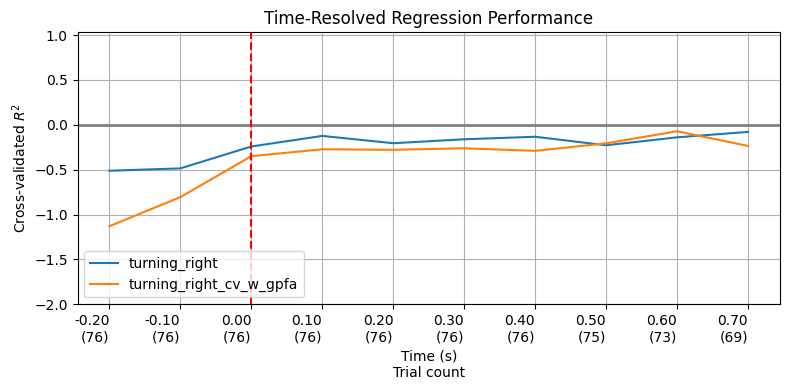

gaze_world_y_r


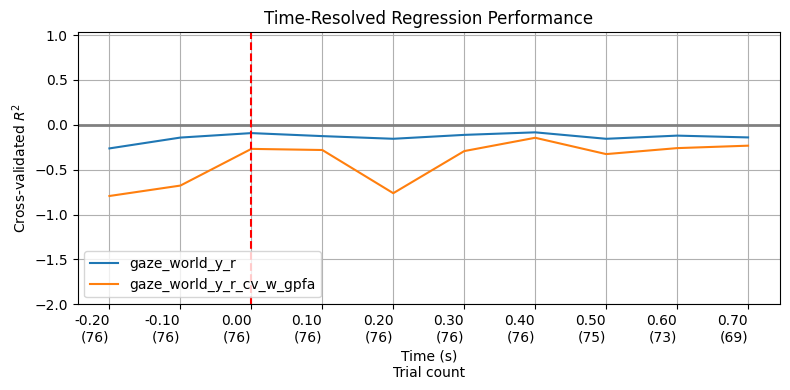

abs_nxt_ff_angle_at_ref


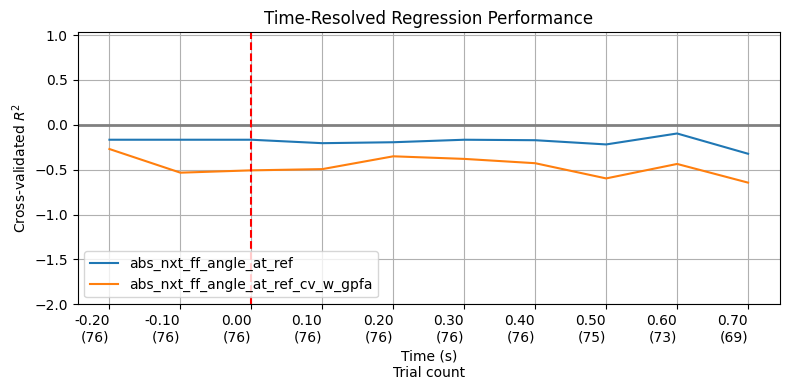

abs_nxt_ff_angle


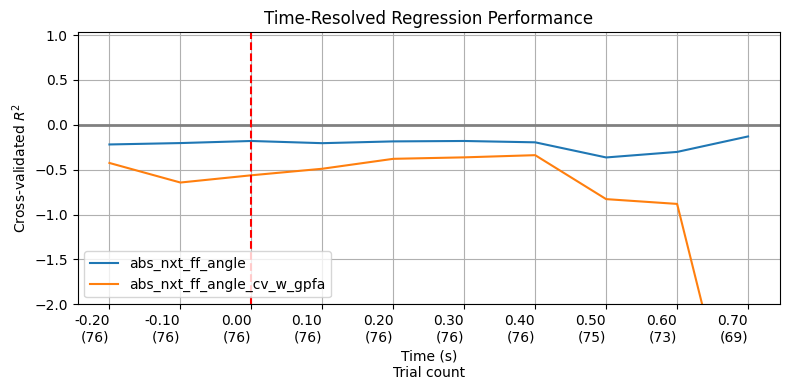

abs_nxt_ff_rel_x


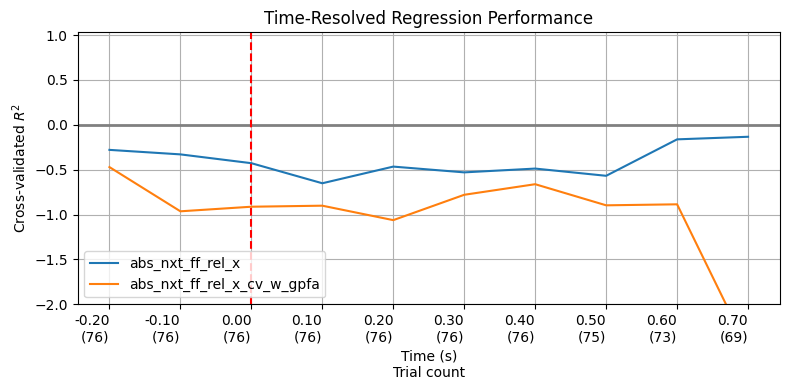

segment_duration


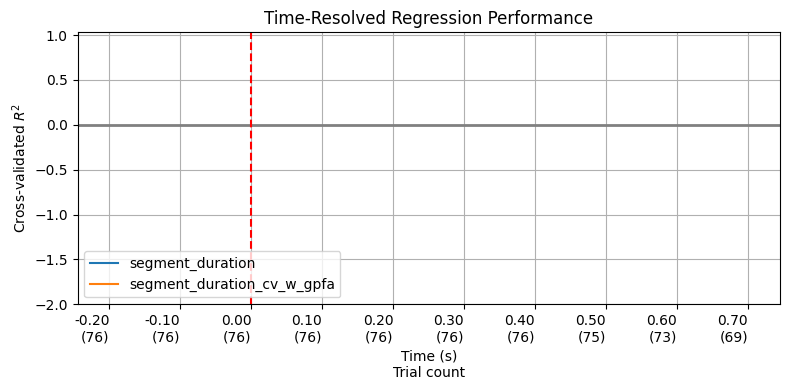

In [18]:
ranked_features = pn.time_resolved_cv_scores.max().sort_values(ascending=False).index.values
features_not_to_plot = ['new_bin', 'new_seg_duration', 'trial_count', 'bin_mid_time']
ranked_features = [feature for feature in ranked_features if feature not in features_not_to_plot]
for feature in ranked_features:
    print(feature)
    print('='*100)
    new_cv_scores = pd.concat([pn.time_resolved_cv_scores[['new_bin', 'bin_mid_time', 'trial_count', feature]], 
                            pn.time_resolved_cv_scores_gpfa[[feature]].rename(columns={feature: f'{feature}_cv_w_gpfa'})], axis=1)
    pn.plot_time_resolved_regression(time_resolved_cv_scores=new_cv_scores, score_threshold_to_plot=None,
                                        rank_by_max_score=False)

## trial count per time point

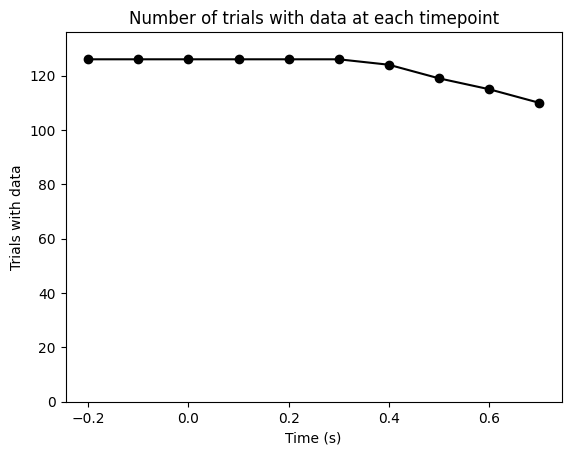

In [ ]:
pn.plot_trial_counts_by_timepoint()

## concat data regression

In [ ]:
pn.get_concat_data_for_regression(use_raw_spike_data_instead=True,
                                    apply_pca_on_raw_spike_data=False,
                                    use_lagged_raw_spike_data=False,) 




No NA values found in DataFrame

No NA values found in DataFrame


In [ ]:
mask = pn.concat_behav_trials['bin_mid_time_rel_to_event'] > 0
pn.concat_behav_trials = pn.concat_behav_trials[mask]
pn.concat_neural_trials = pn.concat_neural_trials[mask]

pn.concat_behav_trials.shape
pn.concat_neural_trials.shape

(846, 88)

In [ ]:
pn.separate_test_and_control_data()
print(pn.concat_neural_trials.shape)
print(pn.concat_behav_trials.shape)

(846, 88)
(846, 100)


## segment split regress CV

In [ ]:
# columns_of_interest = ['whether_test', 'cur_ff_distance', 'cur_ff_angle', 'nxt_ff_distance', 'nxt_ff_rel_y', 'nxt_opt_arc_dheading', 'nxt_ff_rel_x', 'nxt_ff_angle', 'nxt_ff_angle_at_ref']
columns_of_interest = pn.concat_behav_trials.columns

In [ ]:
all_results = []
for test_or_control in ['test', 'control', 'both']:
    x_var, y_var = pn.get_concat_x_and_y_var_for_lr(test_or_control=test_or_control)
    
    results_summary = ml_methods_utils.run_segment_split_regression_cv(
        x_var, 
        y_var, 
        columns_of_interest, 
        num_folds=5, 
    )
    results_summary['test_or_control'] = test_or_control
    all_results.append(results_summary)

all_results = pd.concat(all_results)
all_results.head()

reg_results = all_results[all_results['Model'] == 'Linear Regression']
class_results = all_results[all_results['Model'] == 'Logistic Regression']

test_or_control: test
x_var dimensions: (678, 7)
y_var dimensions: (678, 111)


/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


test_or_control: control
x_var dimensions: (546, 7)
y_var dimensions: (546, 111)


/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/e

test_or_control: both
x_var dimensions: (1224, 7)
y_var dimensions: (1224, 111)


/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


### plot some

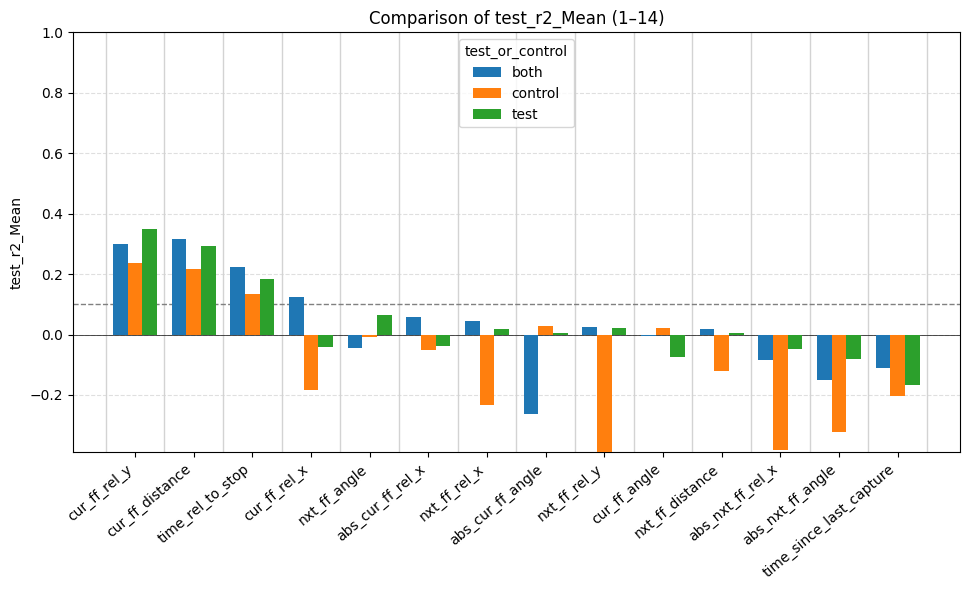

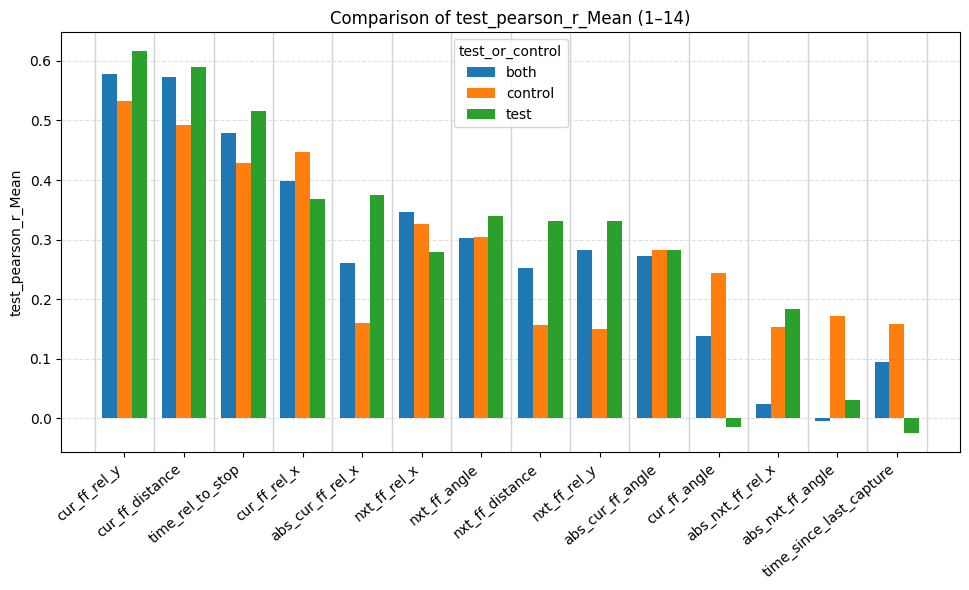

In [ ]:
# regression results
for metric in ['test_r2_Mean', 'test_pearson_r_Mean']:
# for metric in ['train_r2_Mean', 'train_pearson_r_Mean']:
    ml_methods_utils.make_barplot_to_compare_results(
            reg_results, 
            metric=metric, 
            features=['cur_ff_distance', 'cur_ff_angle', 'cur_ff_rel_x', 'cur_ff_rel_y', 'abs_cur_ff_angle', 'abs_cur_ff_rel_x',
                      'nxt_ff_distance', 'nxt_ff_angle', 'nxt_ff_rel_x', 'nxt_ff_rel_y', 'abs_nxt_ff_angle', 'abs_nxt_ff_rel_x',
                      'time_rel_to_stop', 'time_since_last_capture'],
        )
    print('='*100)
    print('='*100)

### plot all

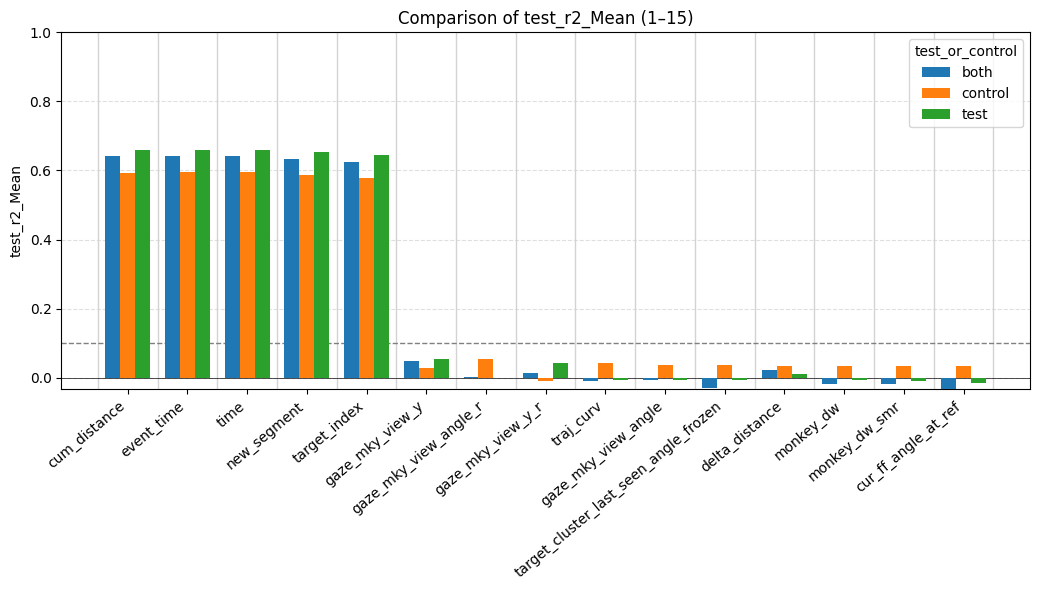

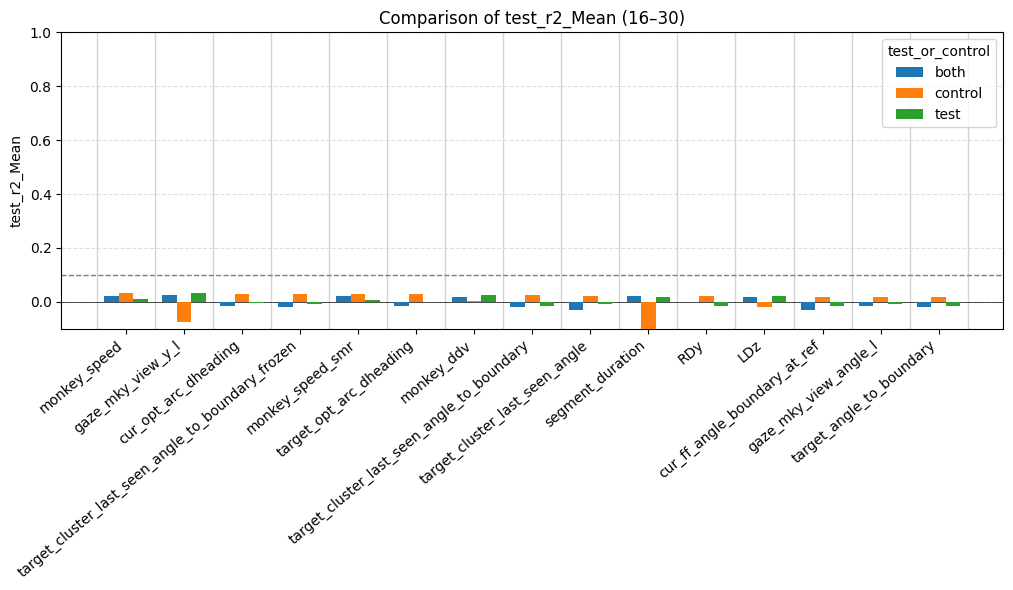

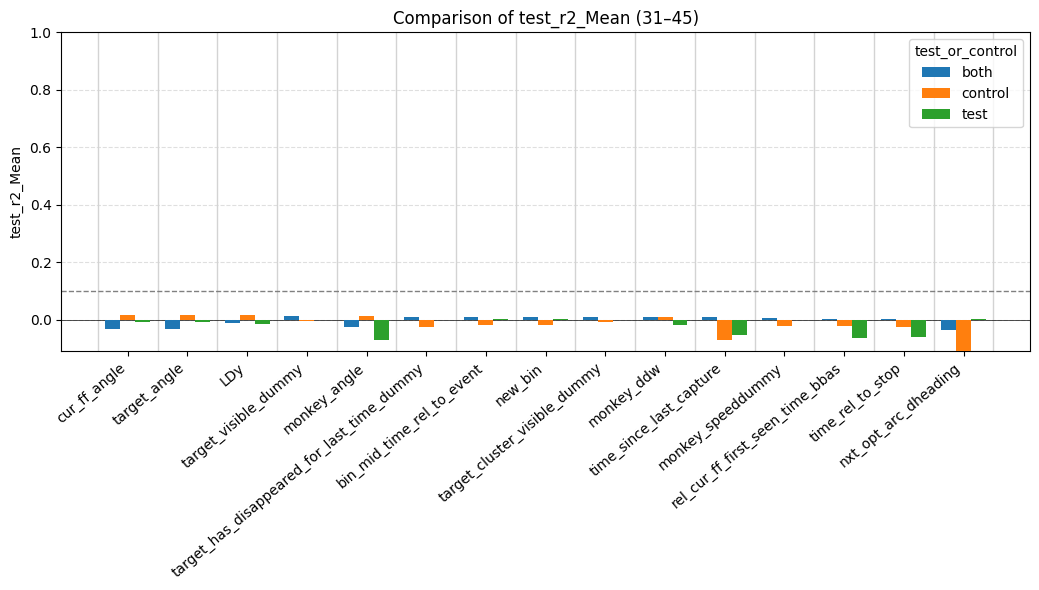

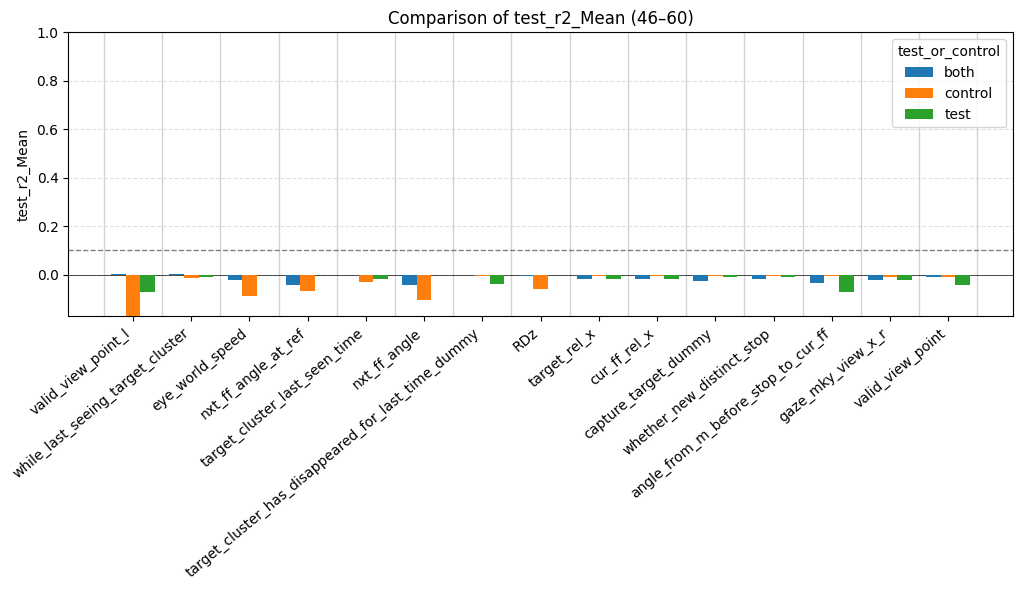

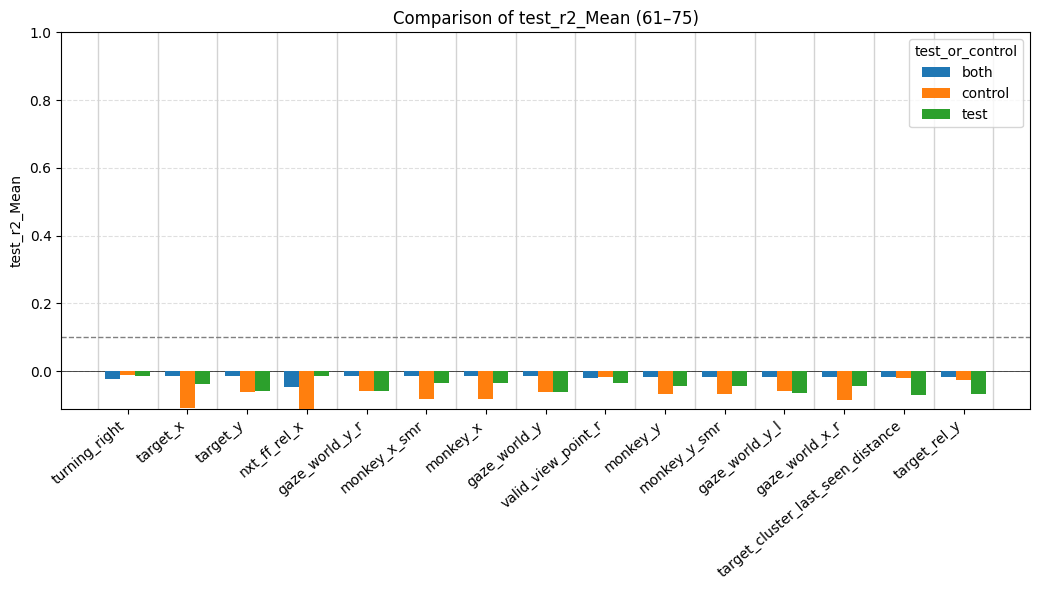

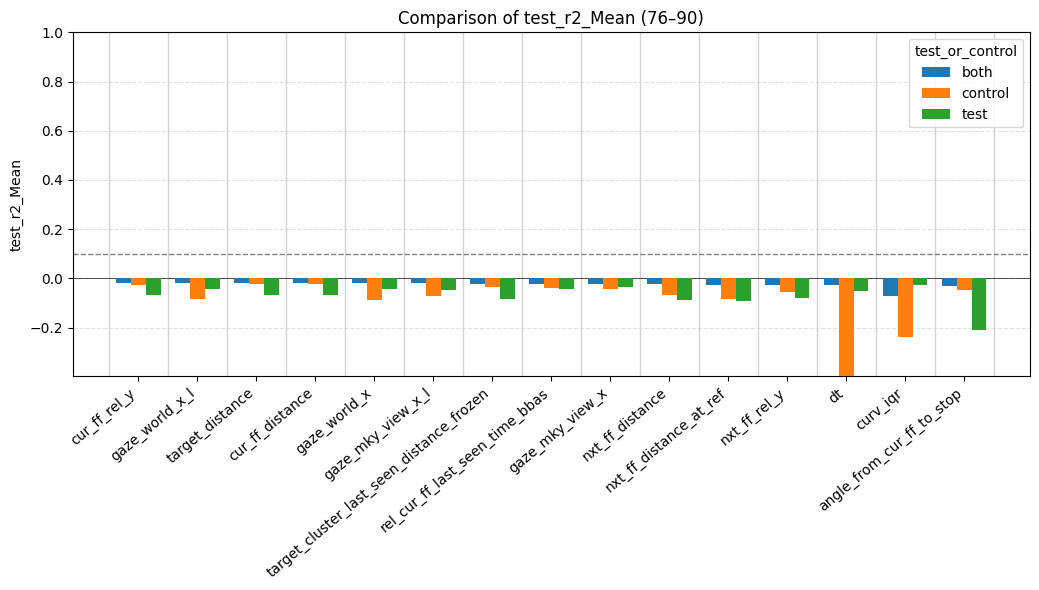

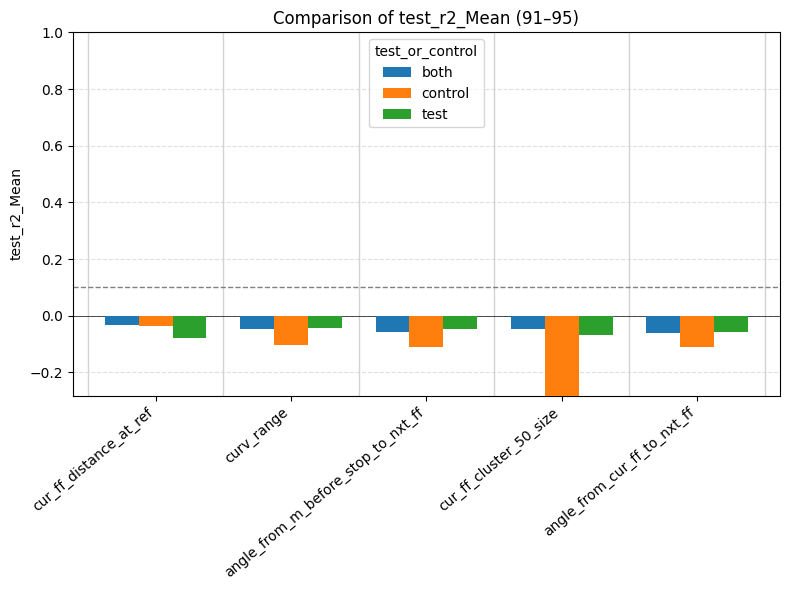

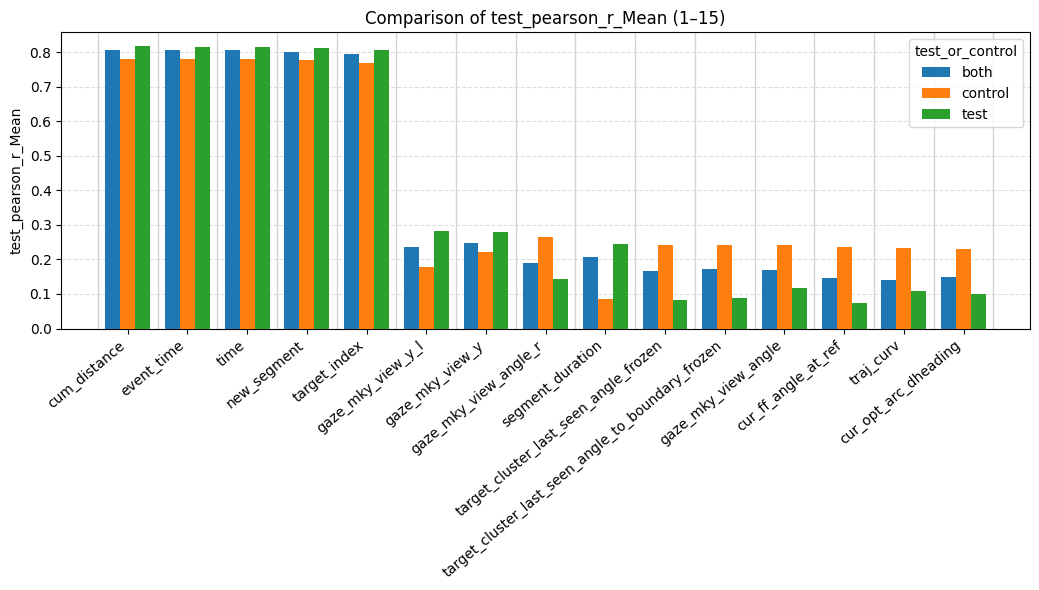

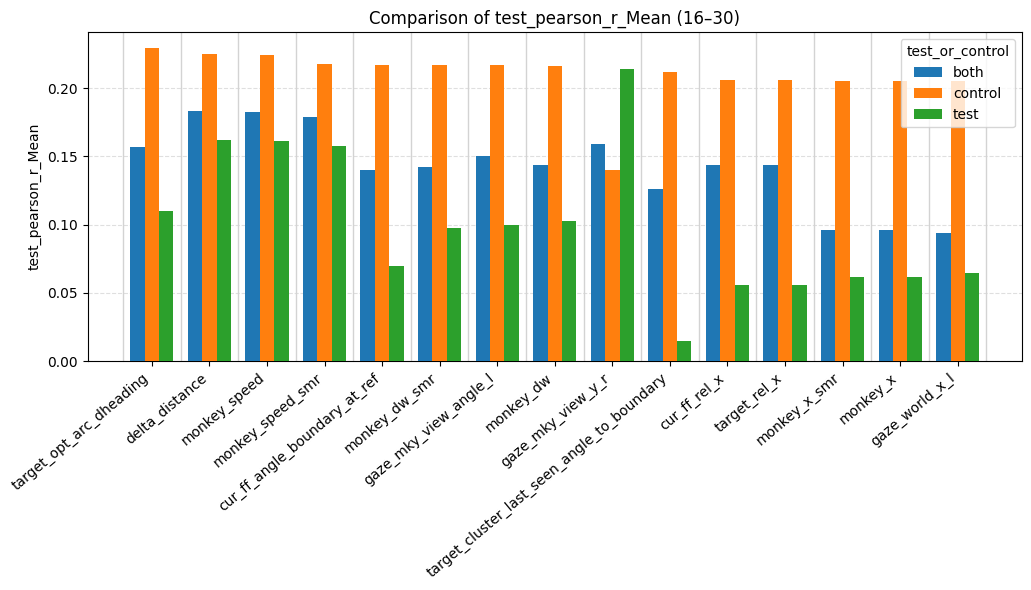

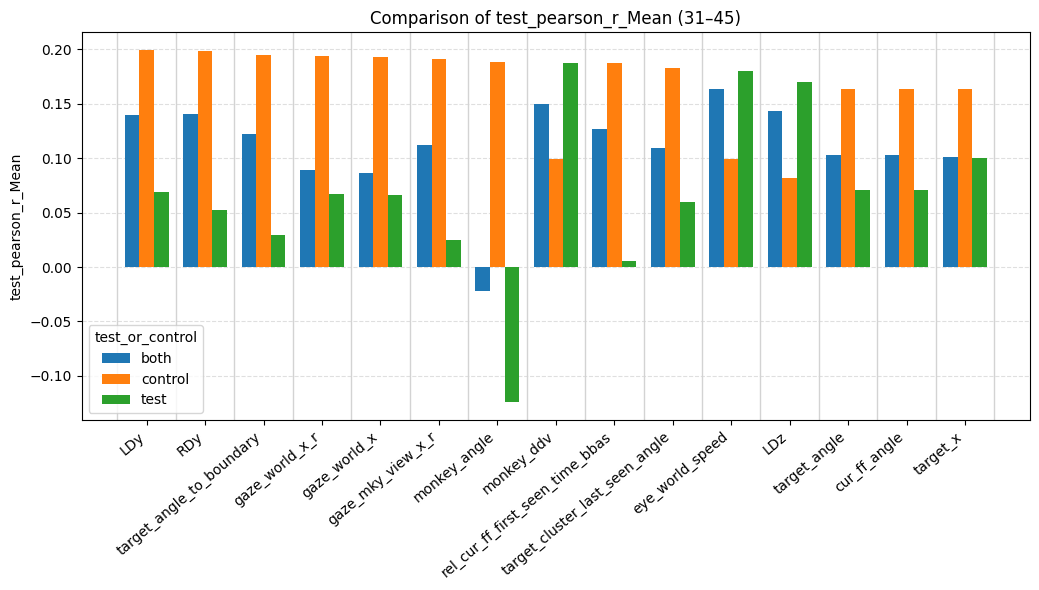

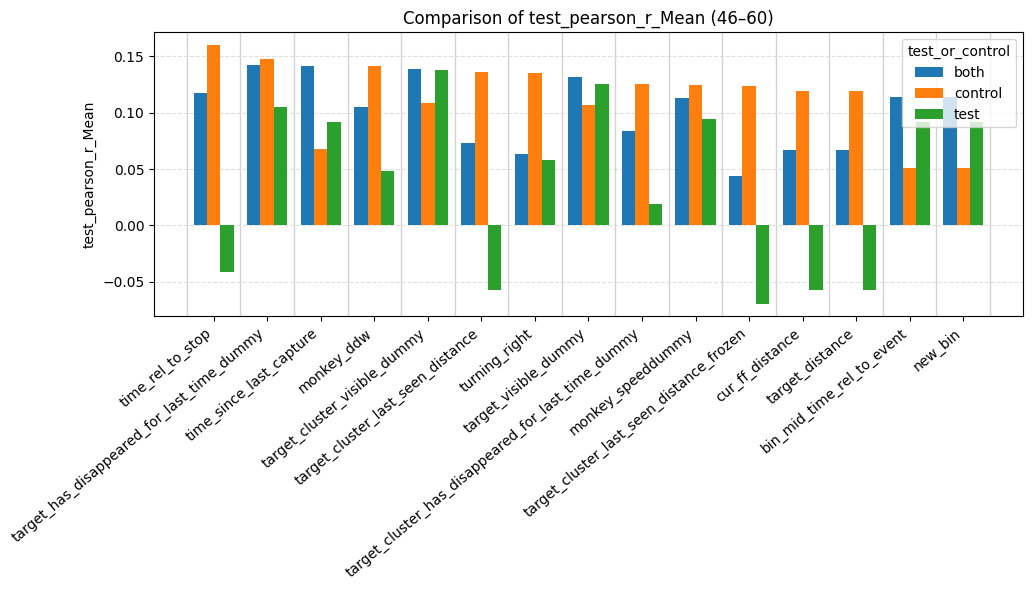

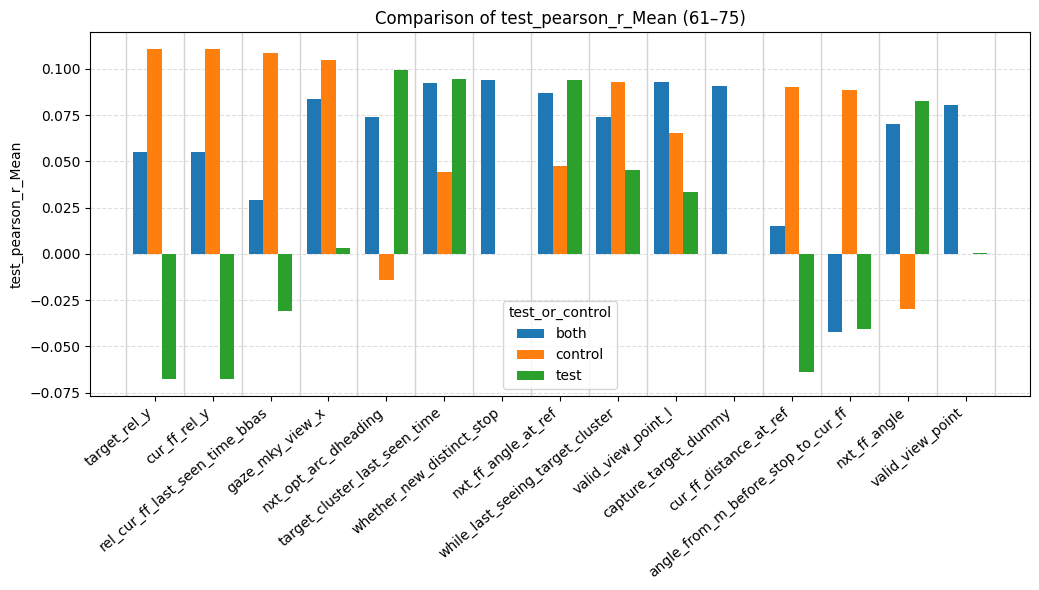

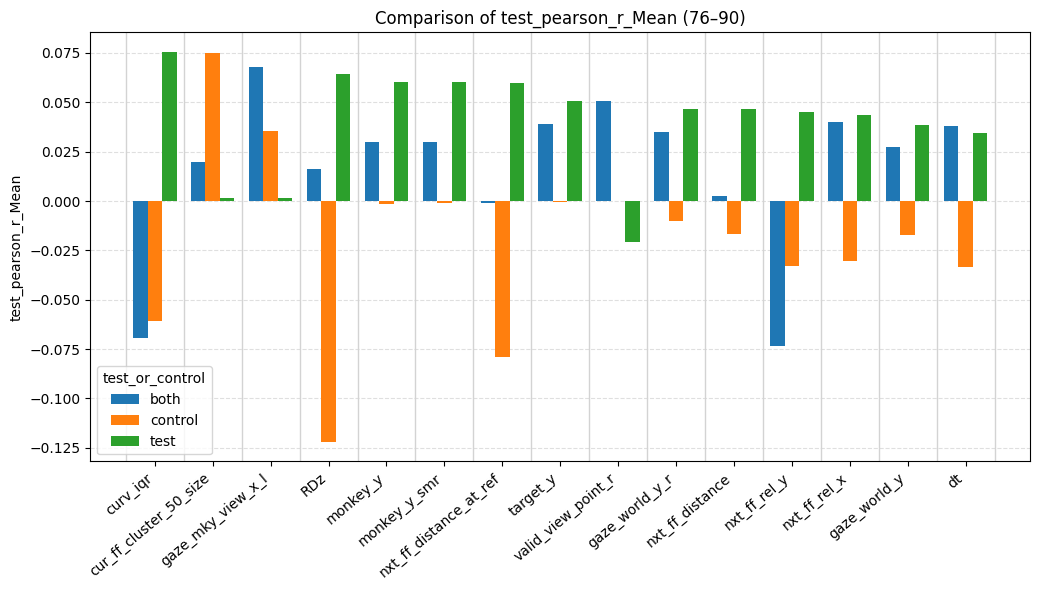

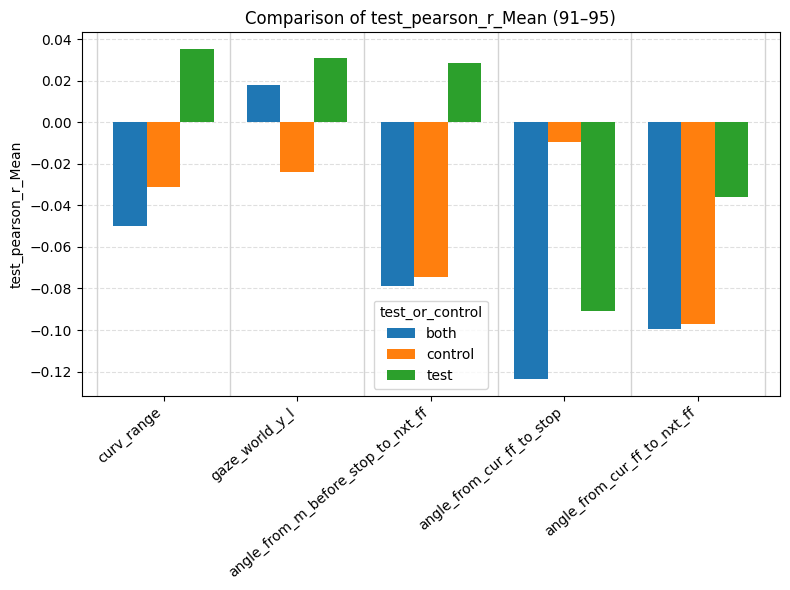

In [ ]:
# regression results
for metric in ['test_r2_Mean', 'test_pearson_r_Mean']:
    ml_methods_utils.make_barplot_to_compare_results(
            reg_results, 
            metric=metric, 
            #features=['bin_mid_time_rel_to_event'],
        )
    print('='*100)
    print('='*100)

In [ ]:
df = reg_results[(reg_results['Metric'] == 'train_r2') & (reg_results['Mean'] > 0) & (reg_results['test_or_control'] == 'both')].sort_values(by='Mean', ascending=False).reset_index(drop=True)

In [ ]:
'time', 'event_time'

('time', 'event_time')

In [ ]:
'cum_distance', 'target_index'

('cum_distance', 'target_index')

In [ ]:
# The following columns will be dropped, since ['time', 'event_time', 'cum_distance', 'target_index', 'new_segment'] are enough, and the rest have high correlation with them
columns_to_drop = ['point_index', 'last_target_caught_time', 
                'new_seg_end_time', 'new_seg_start_time', 'stop_point_index',
                'current_target_caught_time', 'stop_time', 'seg_end_time',
                'seg_start_time', 'cur_ff_index', 'trial',
                'nxt_ff_index', 'segment']


In [ ]:
features = df[df['Mean'] > 0.2].Feature.values
df2 = pn.concat_behav_trials[features]
df2.corr()


event_time    time  cum_distance  new_segment  target_index
event_time       1.00000 1.00000       0.99980      0.99839       0.99939
time             1.00000 1.00000       0.99980      0.99839       0.99939
cum_distance     0.99980 0.99980       1.00000      0.99844       0.99947
new_segment      0.99839 0.99839       0.99844      1.00000       0.99902
target_index     0.99939 0.99939       0.99947      0.99902       1.00000

In [ ]:
df[df['Mean'] > 0.23]

Feature              Model    Metric    Mean     Std test_or_control
0    event_time  Linear Regression  train_r2 0.65556 0.01220            both
1          time  Linear Regression  train_r2 0.65555 0.01220            both
2  cum_distance  Linear Regression  train_r2 0.65549 0.01240            both
3   new_segment  Linear Regression  train_r2 0.64914 0.01188            both
4  target_index  Linear Regression  train_r2 0.63996 0.01264            both

In [ ]:
reg_results[(reg_results['Metric'] == 'test_r2') & (reg_results['Mean'] > 0) & (reg_results['test_or_control'] == 'both')]

Feature              Model   Metric  \
1                                   new_segment  Linear Regression  test_r2   
5                                       new_bin  Linear Regression  test_r2   
25                                 target_index  Linear Regression  test_r2   
29                             time_rel_to_stop  Linear Regression  test_r2   
41                             segment_duration  Linear Regression  test_r2   
45                                         time  Linear Regression  test_r2   
151             rel_cur_ff_first_seen_time_bbas  Linear Regression  test_r2   
173                        target_visible_dummy  Linear Regression  test_r2   
181                            monkey_speed_smr  Linear Regression  test_r2   
205            while_last_seeing_target_cluster  Linear Regression  test_r2   
249                           monkey_speeddummy  Linear Regression  test_r2   
261                                monkey_speed  Linear Regression  test_r2   
281                          valid_view_point_l  Linear Regression  test_r2   
285                           gaze_mky_view_y_r  Linear Regression  test_r2   
301                           gaze_mky_view_y_l  Linear Regression  test_r2   
305                              delta_distance  Linear Regression  test_r2   
313                     time_since_last_capture  Linear Regression  test_r2   
317                       gaze_mky_view_angle_r  Linear Regression  test_r2   
329                target_cluster_visible_dummy  Linear Regression  test_r2   
337                                         LDz  Linear Regression  test_r2   
353                             gaze_mky_view_y  Linear Regression  test_r2   
361  target_has_disappeared_for_last_time_dummy  Linear Regression  test_r2   
393                                  monkey_ddw  Linear Regression  test_r2   
397                                  monkey_ddv  Linear Regression  test_r2   
405                                cum_distance  Linear Regression  test_r2   
413                                  event_time  Linear Regression  test_r2   
417                   bin_mid_time_rel_to_event  Linear Regression  test_r2   

       Mean     Std test_or_control  
1   0.63437 0.05074            both  
5   0.01178 0.00690            both  
25  0.62494 0.05368            both  
29  0.00360 0.01496            both  
41  0.02192 0.02890            both  
45  0.64108 0.05178            both  
151 0.00373 0.01834            both  
173 0.01386 0.01491            both  
181 0.02126 0.01093            both  
205 0.00096 0.01262            both  
249 0.00697 0.00318            both  
261 0.02266 0.01165            both  
281 0.00149 0.01578            both  
285 0.01288 0.01345            both  
301 0.02627 0.04803            both  
305 0.02280 0.01151            both  
313 0.00995 0.04071            both  
317 0.00221 0.02357            both  
329 0.01159 0.02245            both  
337 0.01954 0.02290            both  
353 0.04964 0.02655            both  
361 0.01188 0.00899            both  
393 0.00856 0.01125            both  
397 0.01921 0.01863            both  
405 0.64102 0.05266            both  
413 0.64108 0.05178            both  
417 0.01178 0.00690            both

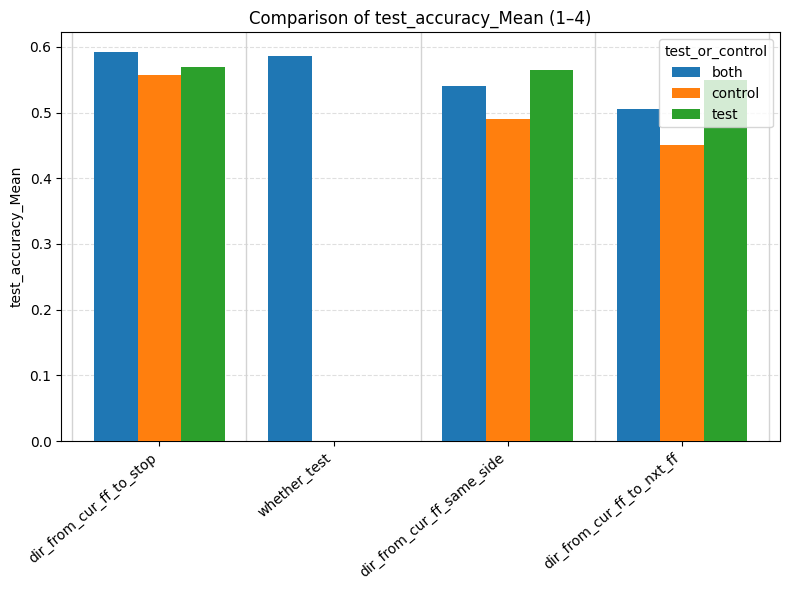

In [ ]:
# classification results
for metric in ['test_accuracy_Mean']:
    ml_methods_utils.make_barplot_to_compare_results(
        class_results, 
        metric=metric, 
    )

## segment split regress train-test
Warning: results can be very unstable due to the stochasticity of train-test split

y_var_column: nxt_ff_rel_y

--- Multiple Linear Regression: nxt_ff_rel_y ---
R-squared (train):        0.0261
Adjusted R-squared:       0.0216
R-squared (test):         -0.0010
Pearson Corr (test):      0.0961
MAE (test):               93.3091
MSE (test):               12528.5561
RMSE (test):              111.9310


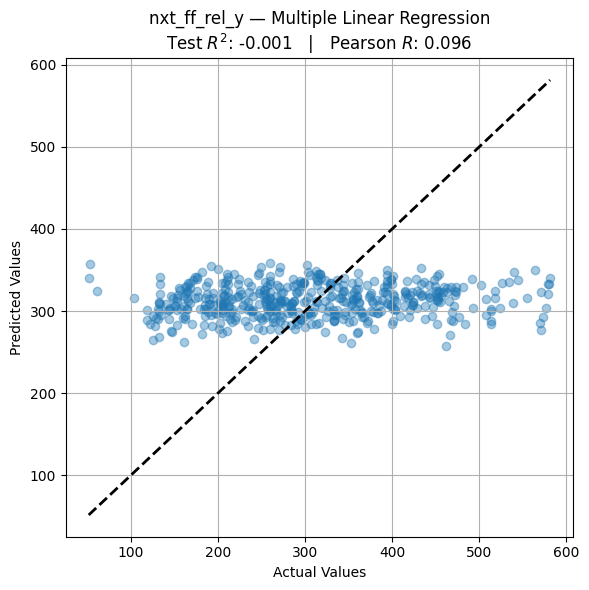

y_var_column: nxt_opt_arc_dheading

--- Multiple Linear Regression: nxt_opt_arc_dheading ---
R-squared (train):        0.0254
Adjusted R-squared:       0.0209
R-squared (test):         -0.0643
Pearson Corr (test):      -0.0232
MAE (test):               0.6936
MSE (test):               0.7506
RMSE (test):              0.8664


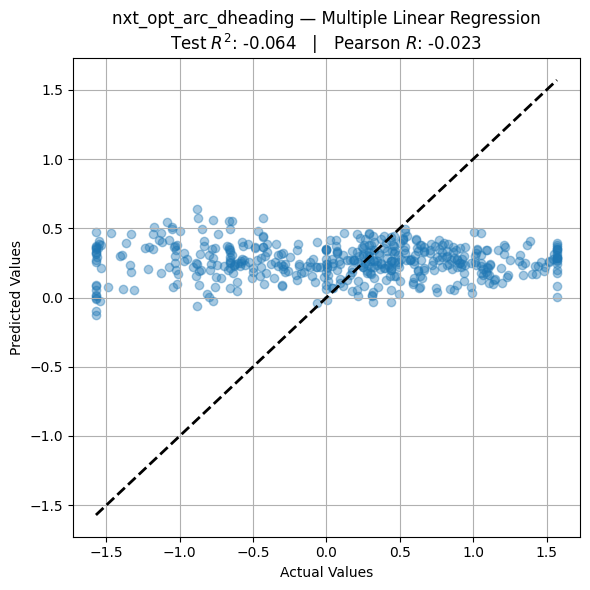

y_var_column: nxt_ff_rel_x

--- Multiple Linear Regression: nxt_ff_rel_x ---
R-squared (train):        0.0232
Adjusted R-squared:       0.0187
R-squared (test):         -0.0448
Pearson Corr (test):      -0.0147
MAE (test):               125.4508
MSE (test):               27435.4022
RMSE (test):              165.6364


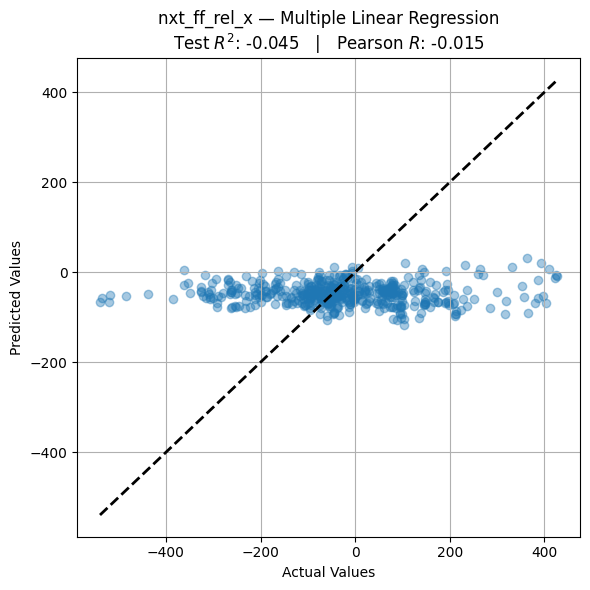

y_var_column: nxt_ff_angle

--- Multiple Linear Regression: nxt_ff_angle ---
R-squared (train):        0.0227
Adjusted R-squared:       0.0181
R-squared (test):         -0.0826
Pearson Corr (test):      -0.0157
MAE (test):               0.3692
MSE (test):               0.2253
RMSE (test):              0.4747


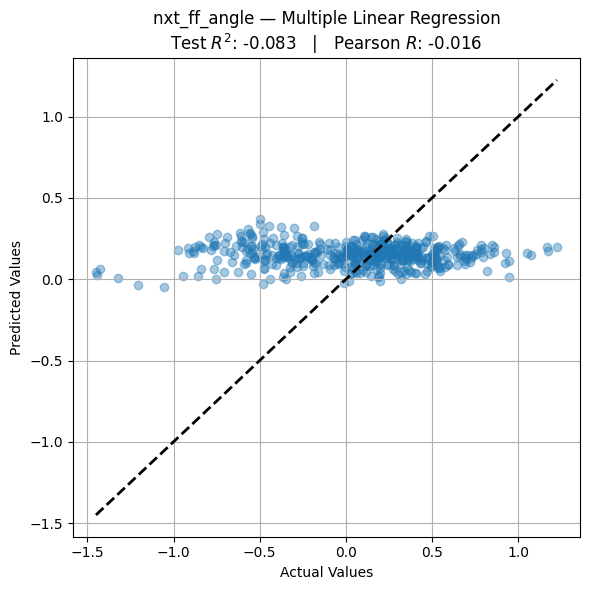

y_var_column: nxt_ff_angle_at_ref

--- Multiple Linear Regression: nxt_ff_angle_at_ref ---
R-squared (train):        0.0229
Adjusted R-squared:       0.0184
R-squared (test):         -0.0415
Pearson Corr (test):      0.0256
MAE (test):               0.4018
MSE (test):               0.2503
RMSE (test):              0.5003


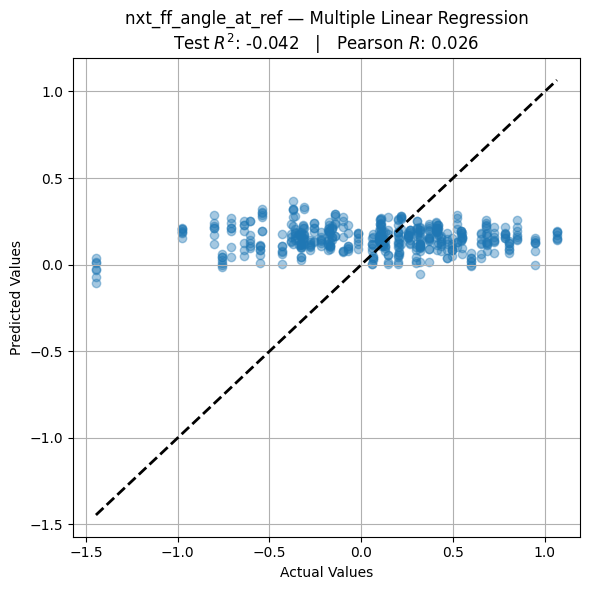

In [ ]:
x_var = pn.concat_neural_trials
y_var = pn.concat_behav_trials

columns_of_interest = ['nxt_ff_rel_y', 'nxt_opt_arc_dheading', 'nxt_ff_rel_x', 'nxt_ff_angle', 'nxt_ff_angle_at_ref']
ml_methods_utils.run_segment_split_regression(x_var, y_var, columns_of_interest)

## plot latent dimensions

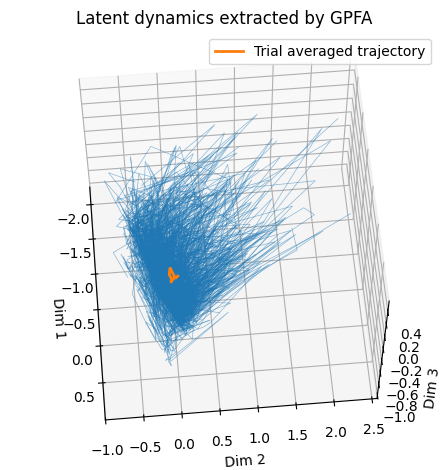

(<Figure size 640x480 with 1 Axes>,
 <Axes3D: title={'center': 'Latent dynamics extracted by GPFA'}, xlabel='Dim 1', ylabel='Dim 2', zlabel='Dim 3'>)

In [ ]:
plot_gpfa_utils.plot_gpfa_traj_3d_uniform_color(pn.trajectories)


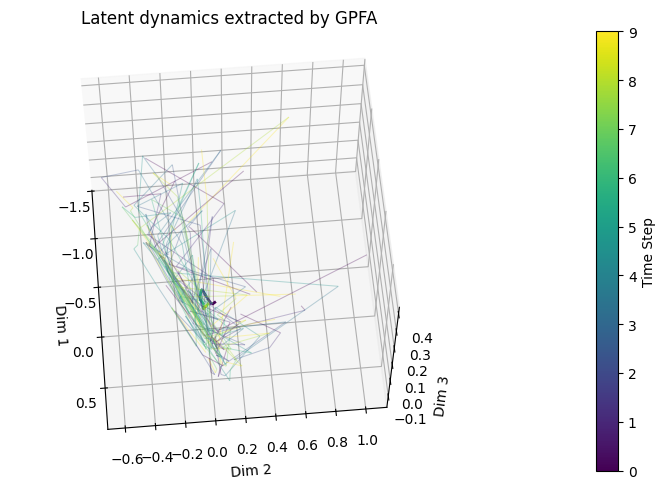

In [ ]:
# First, enable interactive mode in your notebook
%matplotlib inline

# Import required modules
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Create the interactive plot
fig, ax = plot_gpfa_utils.plot_gpfa_traj_3d(
    trajectories=pn.trajectories,
    figsize=(15, 5),
    linewidth_single_trial=0.75,
    alpha_single_trial=0.3,
    linewidth_trial_average=2,
    title='Latent dynamics extracted by GPFA',
    view_azim=-5,
    view_elev=60
)

plt.show()

In [ ]:
# fig = plot_gpfa_utils.plot_gpfa_traj_3d_plotly(trajectories)

In [ ]:
# Find variance explained by each latent dimension
traj_stack = np.stack(pn.trajectories, axis=0)  # shape: (n_trials, 3, T)
var_by_dim = np.var(traj_stack, axis=(0, 2))    # variance across trials and time
var_by_dim /= var_by_dim.sum()               # normalize to get explained variance ratio
print("Variance explained by each latent dimension:", var_by_dim)


Variance explained by each latent dimension: [0.48352 0.22035 0.15538 0.07108 0.03107 0.02377 0.01483]


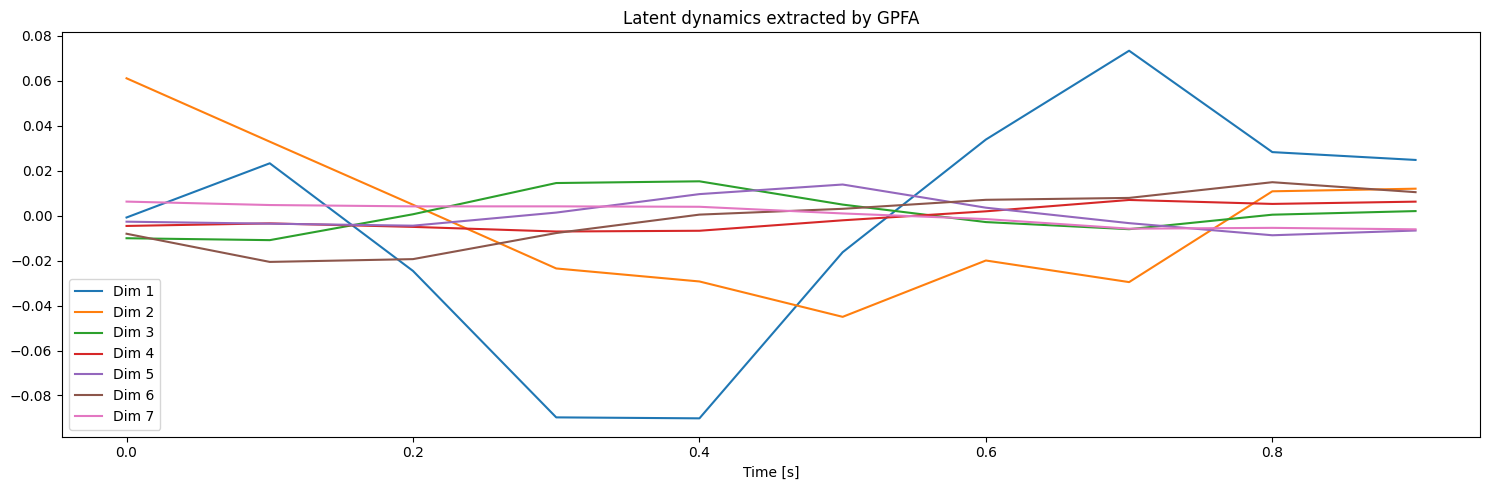

In [ ]:

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(15, 5))

ax.set_title('Latent dynamics extracted by GPFA')
ax.set_xlabel('Time [s]')

average_trajectory = np.mean(pn.trajectories, axis=0)
time = np.arange(len(average_trajectory[0])) * pn.bin_width  # assuming all trajectories have the same length

for i, x in enumerate(average_trajectory):
    ax.plot(time, x, label=f'Dim {i+1}')

ax.legend()

plt.tight_layout()
plt.show()


## check corr between vars

In [ ]:
feature1 = 'new_segment'
feature2 = 'target_index'

from scipy.stats import pearsonr

x = pn.concat_behav_trials[feature1].values
y = pn.concat_behav_trials[feature2].values

r, p = pearsonr(x, y)
print(f"Pearson r: {r:.16f}")

Pearson r: 0.9990212903847162


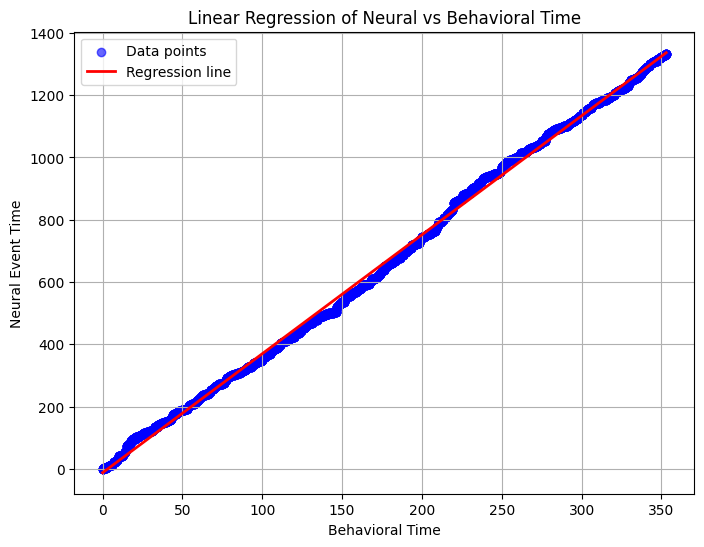

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Extract the data
x = pn.concat_behav_trials[feature1].values.reshape(-1, 1)  # Ensure x is 2D
y = pn.concat_behav_trials[feature2].values          # y can remain 1D

# Fit the linear regression model
model = LinearRegression()
model.fit(x, y)

# Predict y values for the regression line
y_pred = model.predict(x)

# Plot scatter and regression line
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Data points', alpha=0.6)
plt.plot(x, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('Behavioral Time')
plt.ylabel('Neural Event Time')
plt.title('Linear Regression of Neural vs Behavioral Time')
plt.legend()
plt.grid(True)
plt.show()


## why poor performance?

In [ ]:
stop!

SyntaxError: invalid syntax (3319058519.py, line 1)

In [ ]:
import neural_data_analysis.neural_analysis_tools.gpfa_methods.time_resolved_regression as time_resolved_regression

# 1. Print number of trials per timepoint
time_resolved_regression.print_trials_per_timepoint(pn.gpfa_neural_trials)

# 2. Check for NaNs
time_resolved_regression.check_for_nans_in_trials(pn.gpfa_neural_trials, name='latent')
time_resolved_regression.check_for_nans_in_trials(pn.behav_trials, name='behavioral')

# 3. Standardize trials
latent_trials_std = time_resolved_regression.standardize_trials(pn.gpfa_neural_trials)
behav_trials_std = time_resolved_regression.standardize_trials(pn.behav_trials)

# 4. Plot latent and behavioral variables for a few trials
time_resolved_regression.plot_latents_and_behav_trials(latent_trials_std, behav_trials_std, pn.bin_width, n_trials=5)


# why time prediction is good

# Appendix

## see rel_cur_ff_first_seen_time distribution

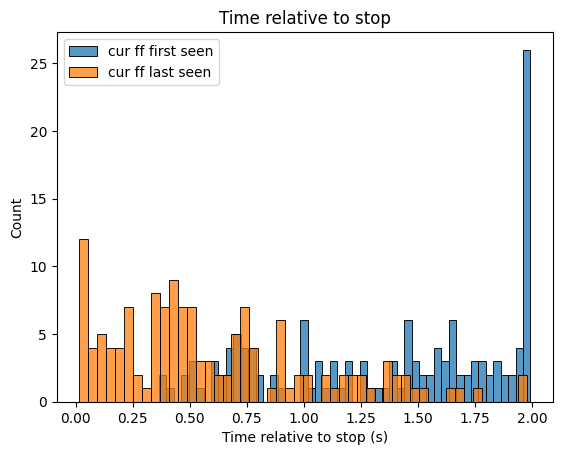

In [ ]:
rel_seen_time_df = pn.planning_data_by_point[['rel_cur_ff_first_seen_time_bbas', 'rel_cur_ff_last_seen_time_bbas']].drop_duplicates().reset_index(drop=True)
sns.histplot(rel_seen_time_df['rel_cur_ff_first_seen_time_bbas'], bins=50, label='cur ff first seen')
sns.histplot(rel_seen_time_df['rel_cur_ff_last_seen_time_bbas'], bins=50, label='cur ff last seen')
plt.xlabel('Time relative to stop (s)')
plt.ylabel('Count')
plt.title('Time relative to stop')
plt.legend()
plt.show()

## debug inconsistent number of new_bins

In [ ]:
# example trajectories
for traj in pn.trajectories[:]:
    print(traj.shape)

(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)


In [ ]:
for traj in pn.behav_trials[:]:
    print(traj.shape)


(10, 48)
(10, 48)
(10, 48)
(10, 48)
(7, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(7, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(6, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(9, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(9, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(8, 48)
(10, 48)
(10, 48)
(10, 48)
(9, 48)
(10, 48)
(9, 48)
(10, 48)
(9, 48)
(10, 48)
(10, 48)
(10, 48)
(8, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(7, 48)
(10, 48)
(10, 48)
(10, 48)
(8, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48)
(6, 48)
(8, 48)
(7, 48)
(10, 48)
(10, 48)
(10, 48)
(10, 48

In [ ]:
segments = pn.rebinned_behav_data.groupby('new_segment').size()[pn.rebinned_behav_data.groupby('new_segment').size() < 10].index

In [ ]:
pn.rebinned_behav_data[pn.rebinned_behav_data['new_segment'].isin(segments)]

new_segment  new_bin  seg_start_time  time_rel_to_stop  \
40              4        0        54.47592           0.65588   
41              4        1        54.47592           0.55626   
42              4        2        54.47592           0.44830   
43              4        3        54.47592           0.34056   
44              4        4        54.47592           0.24086   
...           ...      ...             ...               ...   
1209          124        2      2314.24314           0.43181   
1210          124        3      2314.24314           0.32386   
1211          124        4      2314.24314           0.22430   
1212          124        5      2314.24314           0.12464   
1213          124        6      2314.24314           0.03331   

      segment_duration  nxt_ff_index  point_index       time  \
40             2.50676      12.00000   3401.50000   56.32680   
41             2.50676      12.00000   3407.50000   56.42641   
42             2.50676      12.00000   3414.00000   56.53438   
43             2.50676      12.00000   3420.50000   56.64212   
44             2.50676      12.00000   3426.50000   56.74182   
...                ...           ...          ...        ...   
1209           2.50664     451.00000 139896.00000 2316.31797   
1210           2.50664     451.00000 139902.50000 2316.42592   
1211           2.50664     451.00000 139908.50000 2316.52548   
1212           2.50664     451.00000 139914.50000 2316.62514   
1213           2.50664     451.00000 139920.00000 2316.71647   

      cur_opt_arc_dheading  nxt_ff_angle  ...  curv_iqr  \
40                 0.04627      -0.12836  ...   8.56641   
41                 0.05584      -0.13395  ...   8.56641   
42                 0.07261      -0.14082  ...   8.56641   
43                 0.11433      -0.14115  ...   8.56641   
44                 0.20415      -0.14176  ...   8.56641   
...                    ...           ...  ...       ...   
1209               0.00006      -0.08843  ...  20.38049   
1210               0.00004      -0.08366  ...  20.38049   
1211               0.00002      -0.07975  ...  20.38049   
1212               0.00001      -0.07375  ...  20.38049   
1213               0.00000      -0.06989  ...  20.38049   

      cur_ff_cluster_50_size  rel_cur_ff_last_seen_time_bbas  \
40                   1.00000                         0.16622   
41                   1.00000                         0.16622   
42                   1.00000                         0.16622   
43                   1.00000                         0.16622   
44                   1.00000                         0.16622   
...                      ...                             ...   
1209                 1.00000                         0.14963   
1210                 1.00000                         0.14963   
1211                 1.00000                         0.14963   
1212                 1.00000                         0.14963   
1213                 1.00000                         0.14963   

      rel_cur_ff_first_seen_time_bbas  whether_test  new_seg_start_time  \
40                            0.44830       1.00000            56.28438   
41                            0.44830       1.00000            56.28438   
42                            0.44830       1.00000            56.28438   
43                            0.44830       1.00000            56.28438   
44                            0.44830       1.00000            56.28438   
...                               ...           ...                 ...   
1209                          0.43181       1.00000          2316.06797   
1210                          0.43181       1.00000          2316.06797   
1211                          0.43181       1.00000          2316.06797   
1212                          0.43181       1.00000          2316.06797   
1213                          0.43181       1.00000          2316.06797   

      new_seg_end_time  new_seg_duration  event_time  \
40            57.28438           

## exp: to match (new_segment, new_bin) tuples

In [ ]:
reload(pn_aligned_by_event)
reload(gpfa_helper_class)

<module 'neural_data_analysis.neural_analysis_tools.gpfa_methods.gpfa_helper_class' from '/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/multiff_code/methods/neural_data_analysis/neural_analysis_tools/gpfa_methods/gpfa_helper_class.py'>

In [ ]:
pn.prepare_seg_aligned_data(cur_or_nxt='cur', first_or_last='last', time_limit_to_count_sighting=2,
                              pre_event_window=1, post_event_window=0.75, rebinned_max_x_lag_number=2)

Dropped 26 out of 152 segments because of insufficient duration, which is 17.1% of all segments
new_seg_duration is now 1.7, and post_event_window is now 0.7
Dropped 8 columns due to containing NA in rebinned_y_var via calling drop_na_cols function: ['nxt_opt_arc_curv', 'cur_cntr_arc_curv', 'nxt_cntr_arc_curv', 'cur_opt_arc_curv', 'cur_opt_arc_end_heading', 'cur_cntr_arc_end_heading', 'angle_opt_arc_from_cur_end_to_nxt', 'angle_cntr_arc_from_cur_end_to_nxt']


In [ ]:
pn.rebinned_y_var.columns

Index(['new_segment', 'new_bin', 'seg_start_time', 'time_rel_to_stop',
       'segment_duration', 'nxt_ff_index', 'point_index', 'time',
       'cur_opt_arc_dheading', 'nxt_ff_angle', 'stop_point_index',
       'nxt_ff_distance', 'target_index', 'cur_ff_index', 'cur_ff_angle',
       'cur_ff_distance', 'nxt_opt_arc_dheading', 'stop_time', 'segment',
       'seg_end_time', 'cur_ff_rel_x', 'cur_ff_rel_y', 'nxt_ff_rel_x',
       'nxt_ff_rel_y', 'traj_curv', 'angle_from_m_before_stop_to_cur_ff',
       'angle_from_m_before_stop_to_nxt_ff', 'dir_from_cur_ff_to_stop',
       'dir_from_cur_ff_to_nxt_ff', 'dir_from_cur_ff_same_side',
       'angle_from_cur_ff_to_stop', 'angle_from_cur_ff_to_nxt_ff',
       'nxt_ff_distance_at_ref', 'nxt_ff_angle_at_ref',
       'cur_ff_distance_at_ref', 'cur_ff_angle_at_ref',
       'cur_ff_angle_boundary_at_ref', 'curv_range', 'curv_iqr',
       'cur_ff_cluster_50_size', 'rel_cur_ff_last_seen_time_bbas',
       'rel_cur_ff_first_seen_time_bbas', 'whether_test

In [ ]:
pn.rebinned_y_var['bin_mid_time_rel_to_event'].unique()

array([-0.75, -0.65, -0.55, -0.45, -0.35, -0.25, -0.15, -0.05,  0.05,
        0.15,  0.25,  0.35,  0.45,  0.55,  0.65, -0.85, -0.95, -0.95,
       -0.55, -0.45, -0.05,  0.05, -0.65, -0.35, -0.15,  0.15,  0.35,
        0.45,  0.55,  0.65, -0.85, -0.95, -0.55, -0.45, -0.05,  0.05,
        0.45,  0.55, -0.85, -0.65, -0.35, -0.15,  0.15,  0.35,  0.65,
       -0.95, -0.55, -0.45, -0.05,  0.05,  0.45,  0.55, -0.85, -0.65,
       -0.35, -0.15,  0.15,  0.35,  0.65, -0.95, -0.55, -0.45, -0.05,
        0.05,  0.45,  0.55])

In [ ]:
pn.rebinned_y_var.groupby('new_segment').min()['new_bin'].max()

5

In [ ]:
pn.rebinned_x_var.groupby('new_segment').min()['new_bin'].max()

5

In [ ]:
pn.rebinned_y_var.groupby('new_segment').size()

new_segment
0      15
1      16
2      14
3      12
4      12
       ..
121    17
122    14
123    13
124    12
125    15
Length: 126, dtype: int64

In [ ]:
pn.rebinned_y_var

new_segment  new_bin  seg_start_time  time_rel_to_stop  \
0               0        2        22.50468           2.50657   
1               0        3        22.50468           2.44852   
2               0        4        22.50468           2.34890   
3               0        5        22.50468           2.24926   
4               0        6        22.50468           2.14970   
...           ...      ...             ...               ...   
1835          125       10      2391.23298           0.42307   
1836          125       11      2391.23298           0.32370   
1837          125       12      2391.23298           0.22411   
1838          125       13      2391.23298           0.12450   
1839          125       14      2391.23298           0.03328   

      segment_duration  nxt_ff_index  point_index       time  \
0              2.50657       2.00000   1349.00000   22.50468   
1              2.50657       2.00000   1352.50000   22.56273   
2              2.50657       2.00000   1358.50000   22.66235   
3              2.50657       2.00000   1364.50000   22.76199   
4              2.50657       2.00000   1370.50000   22.86156   
...                ...           ...          ...        ...   
1835           2.50663     465.00000 144552.50000 2393.31653   
1836           2.50663     465.00000 144558.50000 2393.41591   
1837           2.50663     465.00000 144564.50000 2393.51550   
1838           2.50663     465.00000 144570.50000 2393.61511   
1839           2.50663     465.00000 144576.00000 2393.70633   

      cur_opt_arc_dheading  nxt_ff_angle  ...  curv_iqr  \
0                 -0.66822      -0.37850  ...   3.08891   
1                 -0.69286      -0.38621  ...   3.08891   
2                 -0.75727      -0.40761  ...   3.08891   
3                 -0.80914      -0.42051  ...   3.08891   
4                 -0.81872      -0.41389  ...   3.08891   
...                    ...           ...  ...       ...   
1835               0.09087       0.14146  ...  10.09531   
1836               0.09869       0.14126  ...  10.09531   
1837               0.16219       0.11849  ...  10.09531   
1838               1.57080       0.08665  ...  10.09531   
1839               1.57080       0.07795  ...  10.09531   

      cur_ff_cluster_50_size  rel_cur_ff_last_seen_time_bbas  \
0                    1.00000                         1.79291   
1                    1.00000                         1.79291   
2                    1.00000                         1.79291   
3                    1.00000                         1.79291   
4                    1.00000                         1.79291   
...                      ...                             ...   
1835                 1.00000                         0.48126   
1836                 1.00000                         0.48126   
1837                 1.00000                         0.48126   
1838                 1.00000                         0.48126   
1839                 1.00000                         0.48126   

      rel_cur_ff_first_seen_time_bbas  whether_test  new_seg_start_time  \
0                             1.99198       1.00000            22.21834   
1                             1.99198       1.00000            22.21834   
2                             1.99198       1.00000            22.21834   
3                             1.99198       1.00000            22.21834   
4                             1.99198       1.00000            22.21834   
...                               ...           ...                 ...   
1835                          0.76335       0.00000          2392.25835   
1836                          0.76335       0.00000          2392.25835   
1837                          0.76335       0.00000          2392.25835   
1838                          0.76335       0.00000          2392.25835   
1839                          0.76335       0.00000          2392.25835   

      new_seg_end_time  new_seg_duration  event_time  \
0             23.91834           

In [ ]:
# example trajectories
for traj in pn.trajectories[:]:
    print(traj.shape)

(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)
(7, 10)


In [ ]:
pn.gpfa_neural_trials[0].shape

(10, 7)

In [ ]:
pn.get_gpfa_traj(latent_dimensionality=7, exists_ok=False)

RuntimeError: super(): __class__ cell not found

In [ ]:
# for regression later
use_raw_spike_data_instead = False

pn.get_concat_data_for_regression(use_raw_spike_data_instead=False,
                                    use_lagged_raw_spike_data=False,
                                    apply_pca_on_raw_spike_data=False,
                                    num_pca_components=7)


pn.print_data_dimensions()


No NA values found in DataFrame

No NA values found in DataFrame

=== Data Dimensions Summary ===
Total number of trials: 126

Trial-wise Data Shapes (n_timepoints × n_features) — example trial 5:
  gpfa_neural_trials[5]:     (10, 7)
  behav_trials[5]:           (10, 48)

Concatenated Data Shapes (total n_timepoints × n_features):
  concat_neural_trials:     (1224, 9)
  concat_behav_trials:      (1224, 48)


In [ ]:
import pandas as pd
import numpy as np

# Assuming `pn.concat_behav_trials` and `pn.concat_neural_trials` are DataFrames:

# Convert the relevant columns to sets of tuples
behav_set = set(map(tuple, pn.concat_behav_trials[['new_segment', 'new_bin']].values))
neural_set = set(map(tuple, pn.concat_neural_trials[['new_segment', 'new_bin']].values))

# Compute the difference
diff = behav_set - neural_set
diff2 = neural_set - behav_set

In [ ]:
diff2

set()

In [ ]:
df = pn.rebinned_behav_data[['new_segment', 'new_bin']]
df

new_segment  new_bin
0               0        2
1               0        3
2               0        4
3               0        5
4               0        6
...           ...      ...
1918          125       10
1919          125       11
1920          125       12
1921          125       13
1922          125       14

[1923 rows x 2 columns]

In [ ]:
pn.concat_neural_trials

dim_0    dim_1    dim_2    dim_3    dim_4    dim_5    dim_6  \
0    -1.11320  0.62994 -0.45858  0.23534  0.77162 -0.80001  0.08201   
1    -0.14462  0.80682  0.63545  0.96623  0.50833 -0.97540 -0.21114   
2    -0.59936 -0.20144  0.89073  0.81057  0.53480 -0.63251 -0.37367   
3    -0.10179 -0.93591 -0.13901 -0.53548  0.63820 -0.36384 -0.02083   
4     1.26583 -0.44911  0.81737  0.52813  0.70031 -0.30002 -0.19988   
...       ...      ...      ...      ...      ...      ...      ...   
1933  1.71884 -0.39520 -0.77356  1.09128  0.86410  0.82491  0.03926   
1934  4.60110 -0.28252  0.80923  0.51916 -0.02631  0.74957  0.11689   
1935  4.36254 -1.01675  1.41583 -0.09338 -0.23128  0.99190  0.41543   
1936  1.04663 -0.93420  0.70271  0.29135  0.27886  0.80934 -0.18390   
1937  0.07837 -0.32878 -0.58839  0.16678  0.73030  0.46749  0.13186   

      new_segment  new_bin  
0               0        2  
1               0        3  
2               0        4  
3               0        5  
4               0        6  
...           ...      ...  
1933          125       10  
1934          125       11  
1935          125       12  
1936          125       13  
1937          125       14  

[1938 rows x 9 columns]

In [ ]:
pn.concat_behav_trials

new_segment  new_bin  seg_start_time  time_rel_to_stop  \
0               0        2        22.50468           2.50657   
1               0        3        22.50468           2.44852   
2               0        4        22.50468           2.34890   
3               0        5        22.50468           2.24926   
4               0        6        22.50468           2.14970   
...           ...      ...             ...               ...   
1918          125       10      2391.23298           0.42307   
1919          125       11      2391.23298           0.32370   
1920          125       12      2391.23298           0.22411   
1921          125       13      2391.23298           0.12450   
1922          125       14      2391.23298           0.03328   

      segment_duration  nxt_ff_index  point_index       time  \
0              2.50657       2.00000   1349.00000   22.50468   
1              2.50657       2.00000   1352.50000   22.56273   
2              2.50657       2.00000   1358.50000   22.66235   
3              2.50657       2.00000   1364.50000   22.76199   
4              2.50657       2.00000   1370.50000   22.86156   
...                ...           ...          ...        ...   
1918           2.50663     465.00000 144552.50000 2393.31653   
1919           2.50663     465.00000 144558.50000 2393.41591   
1920           2.50663     465.00000 144564.50000 2393.51550   
1921           2.50663     465.00000 144570.50000 2393.61511   
1922           2.50663     465.00000 144576.00000 2393.70633   

      cur_opt_arc_dheading  nxt_ff_angle  ...  curv_iqr  \
0                 -0.66822      -0.37850  ...   3.08891   
1                 -0.69286      -0.38621  ...   3.08891   
2                 -0.75727      -0.40761  ...   3.08891   
3                 -0.80914      -0.42051  ...   3.08891   
4                 -0.81872      -0.41389  ...   3.08891   
...                    ...           ...  ...       ...   
1918               0.09087       0.14146  ...  10.09531   
1919               0.09869       0.14126  ...  10.09531   
1920               0.16219       0.11849  ...  10.09531   
1921               1.57080       0.08665  ...  10.09531   
1922               1.57080       0.07795  ...  10.09531   

      cur_ff_cluster_50_size  rel_cur_ff_last_seen_time_bbas  \
0                    1.00000                         1.79291   
1                    1.00000                         1.79291   
2                    1.00000                         1.79291   
3                    1.00000                         1.79291   
4                    1.00000                         1.79291   
...                      ...                             ...   
1918                 1.00000                         0.48126   
1919                 1.00000                         0.48126   
1920                 1.00000                         0.48126   
1921                 1.00000                         0.48126   
1922                 1.00000                         0.48126   

      rel_cur_ff_first_seen_time_bbas  whether_test  new_seg_start_time  \
0                             1.99198       1.00000            22.21834   
1                             1.99198       1.00000            22.21834   
2                             1.99198       1.00000            22.21834   
3                             1.99198       1.00000            22.21834   
4                             1.99198       1.00000            22.21834   
...                               ...           ...                 ...   
1918                          0.76335       0.00000          2392.25835   
1919                          0.76335       0.00000          2392.25835   
1920                          0.76335       0.00000          2392.25835   
1921                          0.76335       0.00000          2392.25835   
1922                          0.76335       0.00000          2392.25835   

      new_seg_end_time  new_seg_duration  event_time  \
0             23.91834           

In [ ]:
pn.concat_neural_trials[['new_segment', 'new_bin']].drop_duplicates().shape

(1938, 2)

In [ ]:
# example trajectories
for traj in pn.trajectories[:5]:
    print(traj.shape)

(7, 17)
(7, 17)
(7, 17)
(7, 17)
(7, 17)


In [ ]:
for traj in pn.behav_trials[:5]:
    print(traj.shape)


(15, 48)
(16, 48)
(14, 48)
(17, 48)
(12, 48)


In [ ]:
df = pn.rebinned_behav_data[pn.rebinned_behav_data['new_segment'].isin([45])]
df

new_segment  new_bin  seg_start_time  time_rel_to_stop  segment_duration  \
689           45        0       941.85285           1.30305           2.50652   
690           45        1       941.85285           1.20349           2.50652   
691           45        2       941.85285           1.10387           2.50652   
692           45        3       941.85285           1.00425           2.50652   
693           45        4       941.85285           0.90467           2.50652   
694           45        5       941.85285           0.80510           2.50652   
695           45        6       941.85285           0.70547           2.50652   
696           45        7       941.85285           0.60578           2.50652   
697           45        8       941.85285           0.50630           2.50652   
698           45        9       941.85285           0.39839           2.50652   
699           45       10       941.85285           0.29047           2.50652   
700           45       11       941.85285           0.19083           2.50652   
701           45       12       941.85285           0.09110           2.50652   
702           45       13       941.85285           0.01651           2.50652   
703           45       16       944.69152           2.49817           2.50643   

     nxt_ff_index  point_index      time  cur_opt_arc_dheading  nxt_ff_angle  \
689     182.00000  56731.50000 943.05632               0.39452       0.25391   
690     182.00000  56737.50000 943.15588               0.33245       0.21398   
691     182.00000  56743.50000 943.25550               0.28172       0.18046   
692     182.00000  56749.50000 943.35512               0.11743       0.14562   
693     182.00000  56755.50000 943.45471              -0.00012       0.12637   
694     182.00000  56761.50000 943.55428              -0.00011       0.12683   
695     182.00000  56767.50000 943.65390              -0.04864       0.13145   
696     182.00000  56773.50000 943.75360              -0.06325       0.14948   
697     182.00000  56779.50000 943.85307              -0.02782       0.18617   
698     182.00000  56786.00000 943.96099              -0.00004       0.19276   
699     182.00000  56792.50000 944.06890              -0.00002       0.18274   
700     182.00000  56798.50000 944.16854              -0.00000       0.17597   
701     182.00000  56804.50000 944.26827              -1.57080       0.17126   
702     182.00000  56809.00000 944.34286              -1.57080       0.17095   
703     183.00000  56832.50000 944.69977               0.44678       0.02293   

     ...  curv_iqr  cur_ff_cluster_50_size  rel_cur_ff_last_seen_time_bbas  \
689  ...   9.97049                 2.00000                         0.34849   
690  ...   9.97049                 2.00000                         0.34849   
691  ...   9.97049                 2.00000                         0.34849   
692  ...   9.97049                 2.00000                         0.34849   
693  ...   9.97049                 2.00000                         0.34849   
694  ...   9.97049                 2.00000                         0.34849   
695  ...   9.97049                 2.00000                         0.34849   
696  ...   9.97049                 2.00000                         0.34849   
697  ...   9.97049                 2.00000                         0.34849   
698  ...   9.97049                 2.00000                         0.34849   
699  ...   9.97049                 2.00000                         0.34849   
700  ...   9.97049                 2.00000                         0.34849   
701  ...   9.97049                 2.00000                         0.34849   
702  ...   9.97049                 2.00000                         0.34849   
703  ...  22.07769                 1.00000                         1.89245   

     rel_cur_ff_first_seen_time_bbas  whether_test  new_seg_start_time  \
689                          1.01246       1.00000           943.01089   
690                          1

In [ ]:
pn.rebinned_behav_data.loc[700:730]

new_segment  new_bin  seg_start_time  time_rel_to_stop  segment_duration  \
700           45       11       941.85285           0.19083           2.50652   
701           45       12       941.85285           0.09110           2.50652   
702           45       13       941.85285           0.01651           2.50652   
703           45       16       944.69152           2.49817           2.50643   
704           46        0       941.85285           0.02488           2.50652   
705           46        3       944.69152           2.50643           2.50643   
706           46        4       944.69152           2.44842           2.50643   
707           46        5       944.69152           2.34882           2.50643   
708           46        6       944.69152           2.24922           2.50643   
709           46        7       944.69152           2.14958           2.50643   
710           46        8       944.69152           2.05008           2.50643   
711           46        9       944.69152           1.94221           2.50643   
712           46       10       944.69152           1.83427           2.50643   
713           46       11       944.69152           1.73469           2.50643   
714           46       12       944.69152           1.63508           2.50643   
715           46       13       944.69152           1.53548           2.50643   
716           46       14       944.69152           1.43590           2.50643   
717           46       15       944.69152           1.33627           2.50643   
718           46       16       944.69152           1.23668           2.50643   
719           47        0       990.17485           1.35291           2.50664   
720           47        1       990.17485           1.25326           2.50664   
721           47        2       990.17485           1.15370           2.50664   
722           47        3       990.17485           1.05412           2.50664   
723           47        4       990.17485           0.95451           2.50664   
724           47        5       990.17485           0.85493           2.50664   
725           47        6       990.17485           0.75527           2.50664   
726           47        7       990.17485           0.65569           2.50664   
727           47        8       990.17485           0.55613           2.50664   
728           47        9       990.17485           0.44826           2.50664   
729           47       10       990.17485           0.34027           2.50664   
730           47       11       990.17485           0.24071           2.50664   

     nxt_ff_index  point_index      time  cur_opt_arc_dheading  nxt_ff_angle  \
700     182.00000  56798.50000 944.16854              -0.00000       0.17597   
701     182.00000  56804.50000 944.26827              -1.57080       0.17126   
702     182.00000  56809.00000 944.34286              -1.57080       0.17095   
703     183.00000  56832.50000 944.69977               0.44678       0.02293   
704     182.00000  56808.50000 944.33450              -1.57080       0.17095   
705     183.00000  56832.00000 944.69152               0.44738       0.02323   
706     183.00000  56835.50000 944.74953               0.43941       0.01914   
707     183.00000  56841.50000 944.84912               0.43941       0.01914   
708     183.00000  56847.50000 944.94873               0.43941       0.01914   
709     183.00000  56853.50000 945.04836               0.43953       0.01914   
710     183.00000  56859.50000 945.14786               0.44271       0.01762   
711     183.00000  56866.00000 945.25574               0.40197      -0.01374   
712     183.00000  56872.50000 945.36367               0.32359      -0.06900   
713     183.00000  56878.50000 945.46325               0.23651      -0.12640   
714     183.00000  56884.50000 945.56286               0.06616      -0.13743   
715     183.00000  56890.50000 945.66246               0.00016      -0.12725   
716     183.00000  56896.50000 945.76204            

## point-wise regression on one var

In [ ]:
from contextlib import contextmanager
import joblib
from tqdm import tqdm
from joblib import Parallel, delayed
import sys
from data_wrangling import process_monkey_information, specific_utils, further_processing_class, specific_utils, general_utils
from neural_data_analysis.neural_analysis_tools.model_neural_data import transform_vars, neural_data_modeling, drop_high_corr_vars, drop_high_vif_vars
from pattern_discovery import pattern_by_trials, pattern_by_points, make_ff_dataframe, ff_dataframe_utils, pattern_by_trials, pattern_by_points, cluster_analysis, organize_patterns_and_features, category_class
from neural_data_analysis.topic_based_neural_analysis.neural_vs_behavioral import prep_monkey_data, prep_target_data, neural_vs_behavioral_class
from neural_data_analysis.neural_analysis_tools.get_neural_data import neural_data_processing
from null_behaviors import curvature_utils, curv_of_traj_utils
import warnings
import os
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sns
import colorcet
import logging
from matplotlib import rc
from os.path import exists
from statsmodels.stats.outliers_influence import variance_inflation_factor
from elephant.gpfa import GPFA

import numpy as np
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler



In [ ]:
# x_cols = [col for col in pn.concat_neural_trials.columns if col.startswith('dim_')]
# x_df = pn.concat_neural_trials[x_cols].copy()

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

for new_bin in pn.concat_neural_trials['new_bin'].unique():
    x_df2 = pn.concat_neural_trials[pn.concat_neural_trials['new_bin'] == new_bin]
    x_df2 = x_df2[[col for col in x_df2.columns if col.startswith('dim_')]]

    # Add intercept
    x_df2 = sm.add_constant(x_df2)

    y_df2 = pn.concat_behav_trials[pn.concat_behav_trials['new_bin'] == new_bin][['segment']].copy()

    # Train-test split
    x_train, x_test, y_train, y_test = train_test_split(
        x_df2, y_df2, test_size=0.2, random_state=42
    )

    # Fit OLS
    model = sm.OLS(y_train, x_train)
    results = model.fit()

    print(results.summary())

    # Evaluate on test set
    y_pred = results.predict(x_test)
    y_test_flat = y_test.squeeze()
    r2_test = 1 - ((y_test_flat - y_pred) ** 2).sum() / ((y_test_flat - y_test_flat.mean()) ** 2).sum()
    print(f"Test R² score: {r2_test:.4f}")
    
    # Create a comparison DataFrame
    comparison_df = pd.DataFrame({
        'y_test': y_test.squeeze().values,  # Ground truth
        'y_pred': y_pred                    # Model predictions
    })

    print(comparison_df.head(10))  # Show the first 10 rows

    break


                            OLS Regression Results                            
Dep. Variable:                segment   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     32.86
Date:                Tue, 22 Jul 2025   Prob (F-statistic):           1.13e-32
Time:                        10:51:43   Log-Likelihood:                -1684.3
No. Observations:                 272   AIC:                             3385.
Df Residuals:                     264   BIC:                             3414.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        292.6019      7.400     39.543      0.0

In [ ]:
import numpy as np
from scipy.stats import pearsonr

# Ensure both arrays are 1D
y_test_flat = y_test.squeeze().values
y_pred_flat = y_pred

# Manually compute R² (already done, for reference)
r2_test = 1 - ((y_test_flat - y_pred_flat) ** 2).sum() / ((y_test_flat - y_test_flat.mean()) ** 2).sum()

# Compute Pearson correlation coefficient (R)
if len(np.unique(y_test_flat)) > 1:
    r_test = np.corrcoef(y_test_flat, y_pred_flat)[0, 1]
    # Or alternatively: r_test, _ = pearsonr(y_test_flat, y_pred_flat)
else:
    r_test = np.nan  # Correlation is undefined when y is constant

print(f"Test R² score: {r2_test:.4f}")
print(f"Test R (Pearson correlation): {r_test:.4f}")


Test R² score: -0.1033
Test R (Pearson correlation): 0.1212


In [ ]:
alphas = np.logspace(-6, 6, 13)
kf = KFold(n_splits=cv_folds, shuffle=True, random_state=42)


from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score

model = RidgeCV(alphas=alphas, fit_intercept=True)
try:
    score = cross_val_score(
        model, x_df2, y_df2.values.ravel(), cv=kf, scoring='r2', n_jobs=1)
    print(score.mean())
except Exception:
    pass


-0.058438781383374036


## LR no CV

In [ ]:
# Multivariate linear regression
pn.y_var_lr_df = neural_data_modeling.get_y_var_lr_df(
                pn.concat_neural_trials, pn.concat_behav_trials)

In [ ]:
pn.y_var_lr_df.head(5)

feature       r  r_squared  p_values  significant
0                new_segment 1.00000    1.00000   0.00000         True
1                    new_bin 1.00000    1.00000   0.00000         True
2           new_seg_duration 1.00000    1.00000   1.00000        False
3  bin_mid_time_rel_to_event 1.00000    1.00000   0.00000         True
4               target_index 0.99905    0.99809   0.00000         True

## LR on ind var

test_or_control: both
x_var dimensions: (2425, 16)
y_var dimensions: (2425, 100)

--- Multiple Linear Regression: time_rel_to_stop ---
R-squared (train):        0.0512
Adjusted R-squared:       0.0433
R-squared (test):         0.0541
Pearson Corr (test):      0.2343
MAE (test):               0.3920
MSE (test):               0.2254
RMSE (test):              0.4748


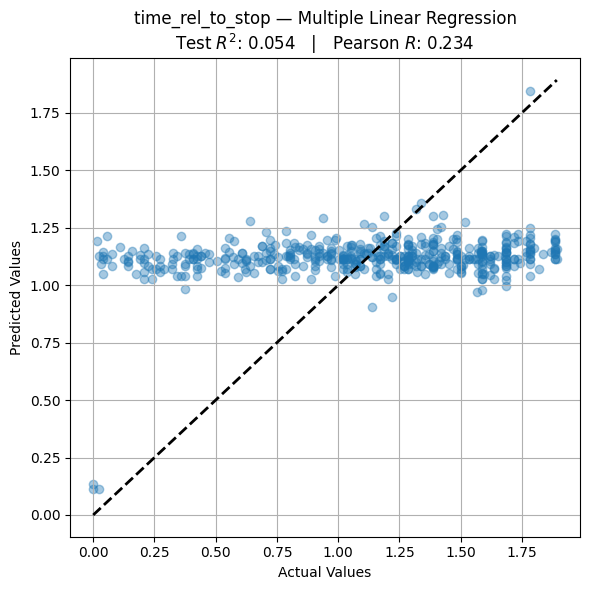

            Coefficient  Std Err        t  p_value  abs_coeff  significant  \
const           1.11566  0.01836 60.76993  0.00000    1.11566         True   
cluster_6      -1.00345  0.13758 -7.29368  0.00000    1.00345         True   
cluster_5       0.61781  0.16261  3.79925  0.00015    0.61781         True   
cluster_11     -0.32269  0.26396 -1.22248  0.22167    0.32269        False   
cluster_15      0.05039  0.03424  1.47174  0.14125    0.05039        False   
cluster_10      0.04420  0.02542  1.73888  0.08222    0.04420        False   
cluster_1      -0.04349  0.02144 -2.02833  0.04266    0.04349         True   
cluster_14      0.03741  0.03324  1.12530  0.26060    0.03741        False   
cluster_0       0.03739  0.02302  1.62409  0.10452    0.03739        False   
cluster_7      -0.03410  0.01124 -3.03392  0.00245    0.03410         True   
cluster_12      0.02259  0.02000  1.12996  0.25863    0.02259        False   
cluster_3       0.02122  0.01512  1.40409  0.16045    0.02122   

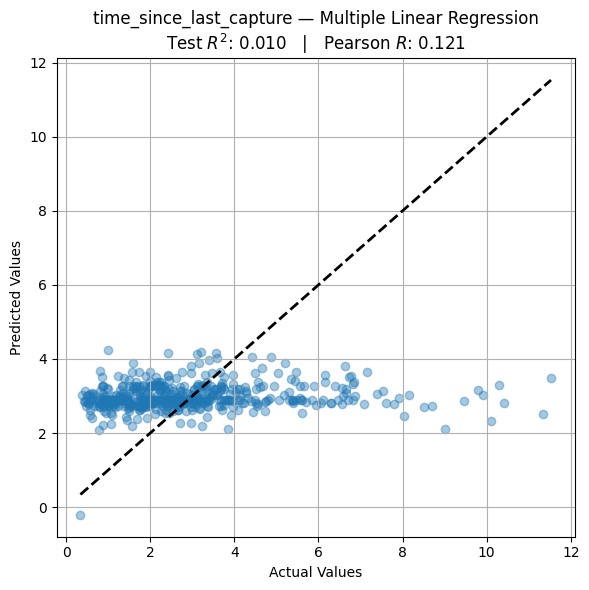

            Coefficient  Std Err        t  p_value  abs_coeff  significant  \
const           2.87864  0.08386 34.32665  0.00000    2.87864         True   
cluster_11      2.87233  1.20573  2.38224  0.01730    2.87233         True   
cluster_5      -2.71274  0.74279 -3.65209  0.00027    2.71274         True   
cluster_6       1.17590  0.62843  1.87116  0.06147    1.17590        False   
cluster_1       0.38139  0.09794  3.89428  0.00010    0.38139         True   
cluster_8       0.34364  0.18439  1.86365  0.06252    0.34364        False   
cluster_3       0.24969  0.06905  3.61602  0.00031    0.24969         True   
cluster_10     -0.20225  0.11612 -1.74175  0.08171    0.20225        False   
cluster_2       0.13605  0.07138  1.90602  0.05680    0.13605        False   
cluster_14     -0.13388  0.15185 -0.88166  0.37807    0.13388        False   
cluster_13     -0.11281  0.85334 -0.13220  0.89484    0.11281        False   
cluster_9      -0.11198  0.08658 -1.29336  0.19604    0.11198   

In [ ]:
for test_or_control in ['both']:
    x_var, y_var = pn.get_concat_x_and_y_var_for_lr(test_or_control=test_or_control)
    y_var = y_var[['time_rel_to_stop', 'time_since_last_capture']].copy()
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(x_var, y_var, test_size=0.2, random_state=42)
    # use linear regression
    for y_var_column in y_var.columns:
        summary_df, y_pred, results, r2_test = regression_utils.use_linear_regression(
            X_train, X_test, y_train[y_var_column], y_test[y_var_column], show_plot=True, y_var_name=y_var_column)
        print(summary_df)
        print(y_pred)
        print(results)
        print(r2_test)
    

## manually save scores_by_time_full_cv

In [ ]:
latent_dimensionality = 7
cv_folds = 5
bin_width_str = f"{pn.bin_width:.4f}".rstrip(
    '0').rstrip('.').replace('.', 'p')
file_name = f'scores_bin{bin_width_str}_{pn.cur_or_nxt}_{pn.first_or_last}_d{latent_dimensionality}_cv{cv_folds}.csv'


time_resolved_cv_scores_gpfa_folder_path = os.path.join(
                    pn.gpfa_data_folder_path, "time_resolved_cv_scores_gpfa")
os.makedirs(time_resolved_cv_scores_gpfa_folder_path, exist_ok=True)
time_resolved_cv_scores_path = os.path.join(
            time_resolved_cv_scores_gpfa_folder_path, file_name)

time_resolved_cv_scores_gpfa.to_csv(time_resolved_cv_scores_path)

In [ ]:
time_resolved_cv_scores_path

'all_monkey_data/planning_and_neural/monkey_Bruno/data_0330/event_aligned/scores_by_time_full_cv/scores_bin0p1_cur_first_d7_cv5.csv'

In [ ]:
time_resolved_cv_scores_gpfa = time_resolved_cv_scores

In [ ]:
file_name

'scores_by_time_cv_bin0p1_cur_first_d7.pkl'